# Loading Data

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset/housing2019_translated.csv')
print(df.shape)
#'ID' is the  unique attribute in the dataset , so drop duplicates by 'ID' can remove all duplicates.
df = df.drop_duplicates(subset='ID')
# look up which attribute has missing values 


(41440, 51)


In [11]:
df.head()

ID    area rentType houseType houseFloor  totalFloor houseToward  \
0  100309852   68.06  Unknown  2Br1Lv1B        Low        16.0         NaN   
1  100307942  125.55  Unknown  3Br2Lv2B        Mid        14.0         NaN   
2  100307764  132.00  Unknown  3Br2Lv2B        Low        32.0         NaN   
3  100306518   57.00  Unknown  1Br1Lv1B        Mid        17.0         NaN   
4  100305262  129.00  Unknown  3Br2Lv3B        Low         2.0         NaN   

  houseDecoration communityName city  ... landTotalPrice landMeanPrice  \
0           Other       XQ00051   SH  ...            0.0        0.0000   
1          Simple       XQ00130   SH  ...            0.0        0.0000   
2           Other       XQ00179   SH  ...            0.0        0.0000   
3            Fine       XQ00313   SH  ...    332760000.0     3080.0331   
4     Undecorated       XQ01257   SH  ...            0.0        0.0000   

   totalWorkers  newWorkers  residentPopulation      pv     uv  lookNum  \
0       28248.0       614.0            111546.0  1124.0  284.0      0.0   
1       14823.0       148.0            157552.0   701.0   22.0      1.0   
2       77645.0       520.0            131744.0    57.0   20.0      1.0   
3        8750.0      1665.0            253337.0   888.0  279.0      9.0   
4         800.0       117.0            125309.0  2038.0  480.0      0.0   

    tradeTime  tradeMoney  
0  2018/11/28      2000.0  
1  2018/12/16      2000.0  
2  2018/12/22     16000.0  
3  2018/12/21      1600.0  
4  2018/11/18      2900.0  

[5 rows x 51 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41439 entries, 0 to 41438
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  41439 non-null  int64  
 1   area                41439 non-null  float64
 2   rentType            41434 non-null  object 
 3   houseType           41439 non-null  object 
 4   houseFloor          41439 non-null  object 
 5   totalFloor          41439 non-null  float64
 6   houseToward         40477 non-null  object 
 7   houseDecoration     41439 non-null  object 
 8   communityName       41439 non-null  object 
 9   city                41439 non-null  object 
 10  region              41439 non-null  object 
 11  plate               41439 non-null  object 
 12  buildYear           38631 non-null  float64
 13  saleSecHouseNum     41439 non-null  float64
 14  subwayStationNum    41439 non-null  float64
 15  busStationNum       41439 non-null  float64
 16  inte

# Data Preprocessing

## Missing Values

In [8]:
print(df.isnull().sum().sort_values(ascending=False))

buildYear             2809
houseToward            963
pv                      18
uv                      18
rentType                 6
region                   1
area                     1
houseDecoration          1
communityName            1
houseFloor               1
houseType                1
busStationNum            1
plate                    1
saleSecHouseNum          1
subwayStationNum         1
schoolNum                1
interSchoolNum           1
city                     1
totalFloor               1
tradeNewNum              1
privateSchoolNum         1
hospitalNum              1
drugStoreNum             1
shopNum                  1
parkNum                  1
gymNum                   1
bankNum                  1
totalTradeMoney          1
totalTradeArea           1
tradeMeanPrice           1
tradeSecNum              1
totalNewTradeMoney       1
totalNewTradeArea        1
mallNum                  1
superMarketNum           1
landMeanPrice            1
tradeNewMeanPrice        1
r

We can easily see all attributes has 1 missing values at least except for "ID"
So we choose "plate" which only has 1 missing values to see when "plate" has a nan value

In [2]:
df.loc[df['plate'].isnull(),:]

ID  area rentType houseType houseFloor  totalFloor houseToward  \
41439  100000041   NaN      NaN       NaN        NaN         NaN         NaN   

      houseDecoration communityName city  ... landTotalPrice landMeanPrice  \
41439             NaN           NaN  NaN  ...            NaN           NaN   

       totalWorkers  newWorkers  residentPopulation      pv     uv  lookNum  \
41439           NaN         NaN                 NaN  2556.0  717.0      NaN   

       tradeTime  tradeMoney  
41439        NaN         NaN  

[1 rows x 51 columns]

Delete rows where all values are NaN. Based on the dataset analysis, whenever the plate attribute is NaN, all other attributes, except for ID, are also NaN. Therefore, rows with excessive missing values are removed by focusing on the ID and plate attributes

In [9]:
Remain = df[['ID','plate']].dropna(axis=0,how='any')
df = df.merge(Remain,on=['ID','plate'],how = 'right')
# look up which attribute has missing values 
print(df.isnull().sum().sort_values(ascending=False))


buildYear             2808
houseToward            962
pv                      18
uv                      18
rentType                 5
area                     0
ID                       0
houseDecoration          0
communityName            0
houseFloor               0
houseType                0
region                   0
plate                    0
saleSecHouseNum          0
subwayStationNum         0
busStationNum            0
interSchoolNum           0
city                     0
totalFloor               0
privateSchoolNum         0
schoolNum                0
hospitalNum              0
drugStoreNum             0
shopNum                  0
parkNum                  0
gymNum                   0
bankNum                  0
totalTradeMoney          0
totalTradeArea           0
tradeMeanPrice           0
tradeSecNum              0
totalNewTradeMoney       0
totalNewTradeArea        0
mallNum                  0
superMarketNum           0
tradeNewNum              0
tradeNewMeanPrice        0
r

In [3]:
# there are 5 missing values in "rentType" ,we can look up the value distribution in "rentType"
import collections
print(collections.Counter(list(df['rentType'])))
# Based on there are too many "Unknown" values in "rentType",so we decided to fill nan value with "Unknown" 
df['rentType'] = df['rentType'].fillna("Unknown")
# look up which attribute has missing values  
print(df.isnull().sum().sort_values(ascending=False))

Counter({'Unknown': 30758, 'Whole': 5472, 'Shared': 5204, nan: 6})
buildYear             2809
houseToward            963
pv                      18
uv                      18
plate                    1
region                   1
houseType                1
houseDecoration          1
communityName            1
houseFloor               1
totalFloor               1
busStationNum            1
interSchoolNum           1
saleSecHouseNum          1
subwayStationNum         1
schoolNum                1
privateSchoolNum         1
city                     1
area                     1
tradeNewNum              1
tradeNewMeanPrice        1
hospitalNum              1
drugStoreNum             1
shopNum                  1
parkNum                  1
gymNum                   1
bankNum                  1
totalTradeMoney          1
totalTradeArea           1
tradeMeanPrice           1
tradeSecNum              1
totalNewTradeMoney       1
totalNewTradeArea        1
mallNum                  1
superMarketNum 

`In the dataset, we have encountered 962 missing values in the "houseToward" (house direction/orientation) column.`
`Understanding and potentially filling these missing values requires analysis of patterns within different geographical groupings.`

Analysis Approach:
We're examining the house direction distribution across two different categorical variables:
1. Plate (区域/板块) - Broader geographical areas
2. Community Name (小区名) - Specific residential communities

Code Explanation:
The code performs three main analyses:
1. Overall Distribution: Shows the total count of each house direction in the dataset.
2. Plate-wise Distribution: Groups the data by plate to see if certain areas have consistent patterns.
3. Community-wise Distribution: Examines patterns within specific communities.

Why This Analysis is Important:
House direction is an important feature in Chinese real estate as it can affect:
- Natural lighting
- Ventilation
- Property value

Understanding the distribution patterns can help in:
- Identifying if missing values follow any geographical patterns.
- Making informed decisions about how to handle these missing values.
- Potentially imputing missing values based on the dominant direction in the same plate or community.
"""

In [7]:
# Display value counts for houseToward
print("Overall houseToward distribution:")
print(df['houseToward'].value_counts(dropna=False))
print("\n")

# Group by plate and show houseToward distribution
print("HouseToward distribution by plate:")
print(df.groupby('plate')['houseToward'].value_counts(dropna=False).unstack(fill_value=0))
print("\n")

# Group by communityName and show houseToward distribution
print("HouseToward distribution by communityName:")
print(df.groupby('communityName')['houseToward'].value_counts(dropna=False).unstack(fill_value=0))

Overall houseToward distribution:
houseToward
S      34377
SN      2254
N       2043
NaN      962
SE       655
E        552
W        264
SW       250
NW        58
EW        24
Name: count, dtype: int64


HouseToward distribution by plate:
houseToward   E  EW   N  NW    S  SE  SN  SW  W  NaN
plate                                               
BK00001       0   0   0   0    1   0   0   0  0    0
BK00002       7   0  17   0  309   5   8   1  7    3
BK00003       4   0  32   1  419   5  56   0  1    5
BK00004       3   0  10   0  159   2   6   0  0    9
BK00005       6   0  14   0  506   6  10   1  5    1
...          ..  ..  ..  ..  ...  ..  ..  .. ..  ...
BK00062       4   0  35   0  518  16  28   7  3    7
BK00063       6   1   6   0  205  26   4  15  0   18
BK00064      17   0  14   0  526  14   9   3  2    5
BK00065       1   0  12   0  323   2   6   0  0    4
BK00066       1   0   0   0  193  11  11   2  0    1

[66 rows x 10 columns]


HouseToward distribution by communityName:
hou

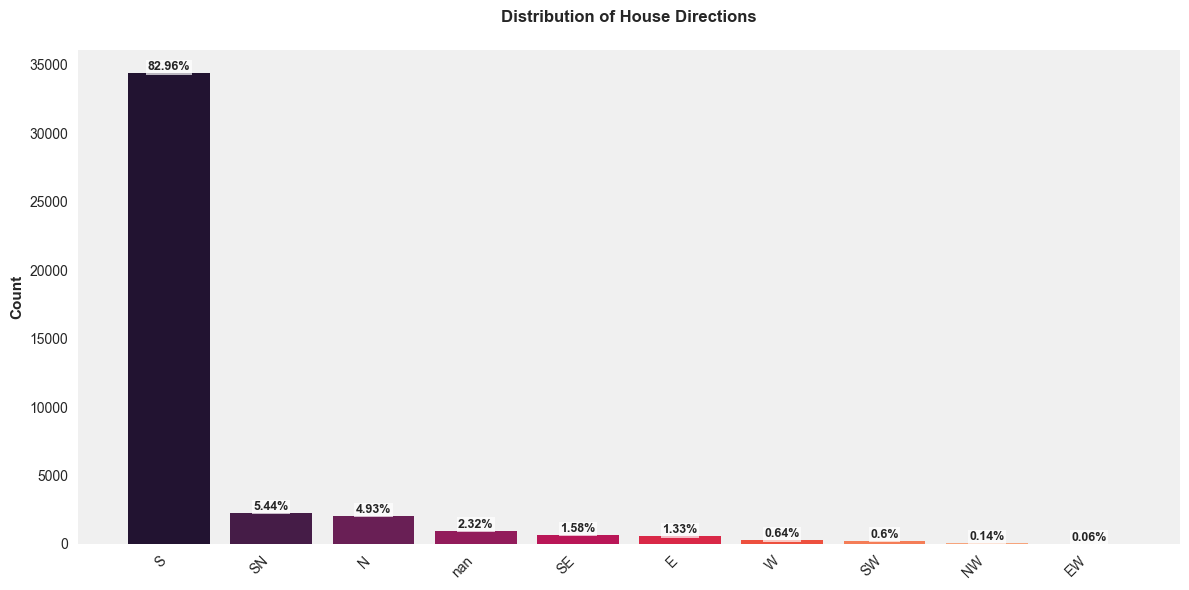

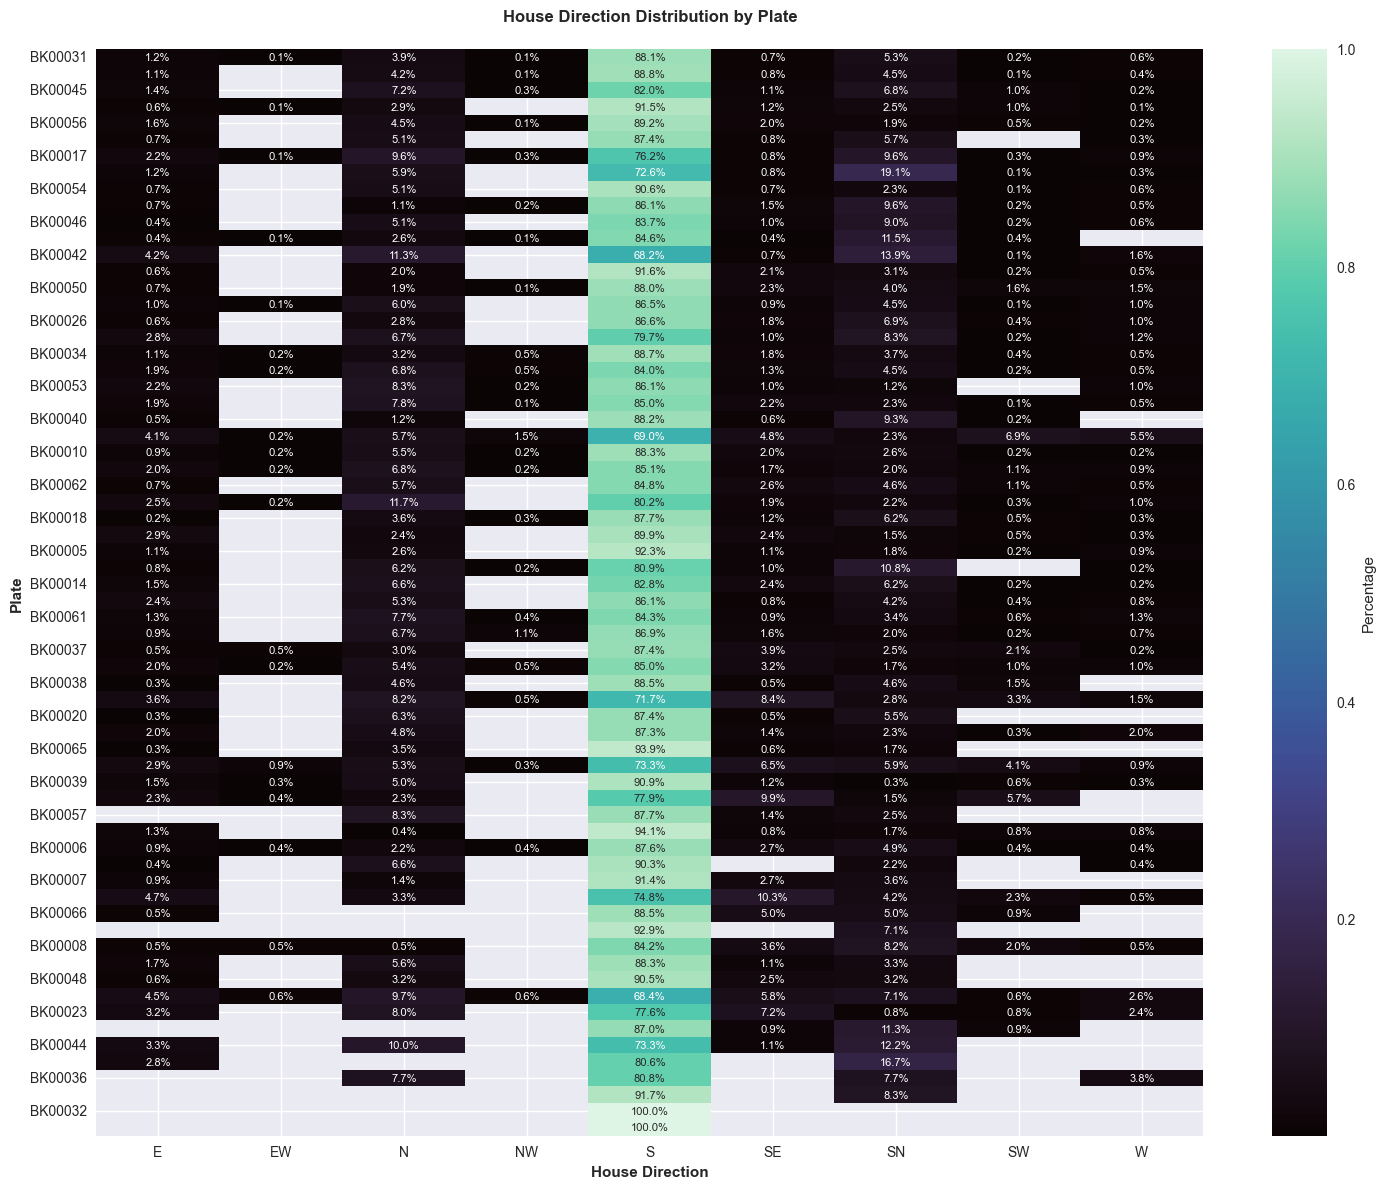

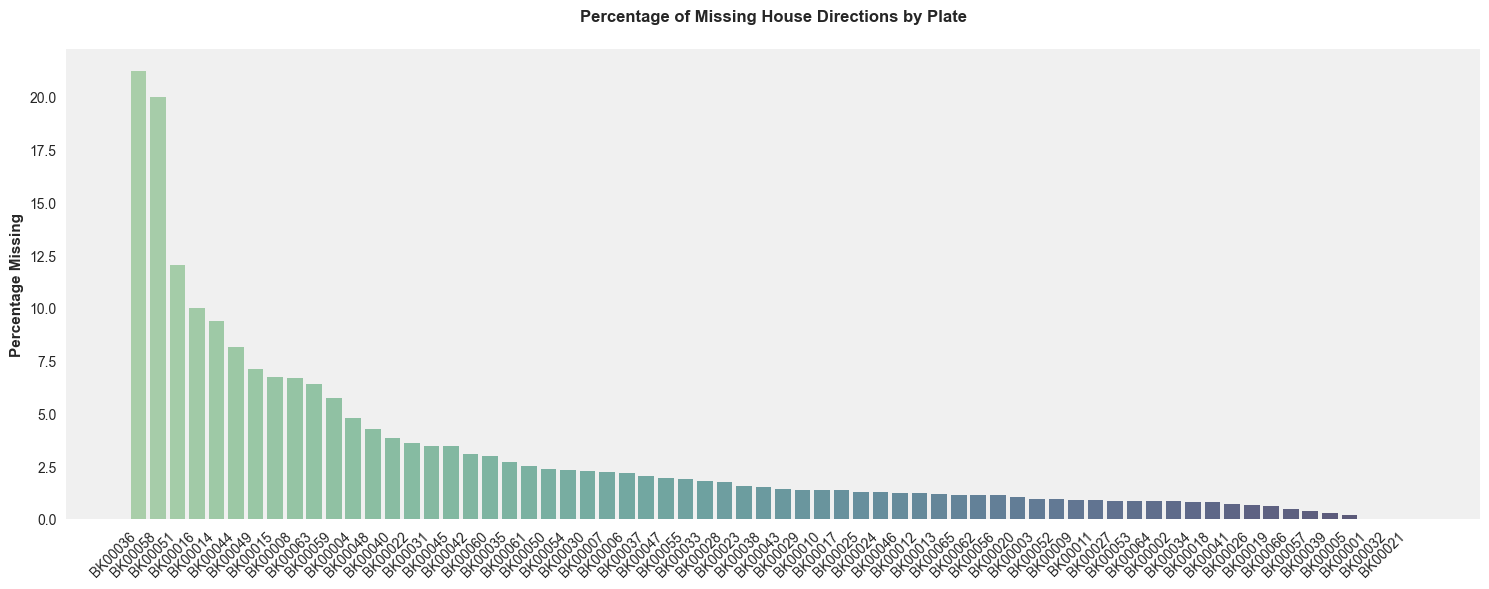

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set global style parameters
plt.style.use('seaborn-v0_8')
plt.rcParams['font.size'] = 10

def create_house_direction_visualizations(df):
    # 1. Overall Distribution with stunning gradient
    fig, ax = plt.subplots(figsize=(12, 6))
    total = len(df)
    value_counts = df['houseToward'].value_counts(dropna=False)
    percentages = (value_counts / total * 100).round(2)
    
    # Create a stunning color gradient using a mix of blues and purples
    colors = sns.color_palette("rocket", n_colors=len(value_counts))
    
    bars = ax.bar(range(len(value_counts)), value_counts, color=colors)
    ax.set_facecolor('#f0f0f0')  # Light gray background
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Add percentage labels with enhanced style
    for i, (count, percentage) in enumerate(zip(value_counts, percentages)):
        ax.text(i, count, f'{percentage}%', 
                ha='center', va='bottom',
                fontweight='bold', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
    
    plt.title('Distribution of House Directions', pad=20, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    ax.grid(False)
    plt.tight_layout()
    plt.show()

    # 2. Enhanced Heatmap with dramatic colormap
    plt.figure(figsize=(15, 12))
    direction_by_plate = df.groupby('plate')['houseToward'].value_counts(normalize=True).unstack()
    
    plate_counts = df.groupby('plate').size().sort_values(ascending=False)
    direction_by_plate = direction_by_plate.loc[plate_counts.index]
    
    # Custom diverging colormap for dramatic effect
    sns.heatmap(direction_by_plate, 
                cmap='mako',  # One of the most beautiful Seaborn colormaps
                annot=True, 
                fmt='.1%',
                cbar_kws={'label': 'Percentage'},
                mask=direction_by_plate.isna(),
                annot_kws={'size': 8})
    
    plt.title('House Direction Distribution by Plate', pad=20, fontsize=12, fontweight='bold')
    plt.xlabel('House Direction', fontweight='bold')
    plt.ylabel('Plate', fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 3. Missing Values Analysis with vibrant gradient
    fig, ax = plt.subplots(figsize=(15, 6))
    missing_by_plate = df.groupby('plate')['houseToward'].apply(lambda x: x.isna().mean() * 100)
    missing_by_plate = missing_by_plate.sort_values(ascending=False)
    
    # Create a stunning gradient effect
    colors = sns.cubehelix_palette(n_colors=len(missing_by_plate), 
                                 start=.5, rot=-.75, 
                                 light=.7, dark=.2)
    
    bars = plt.bar(range(len(missing_by_plate)), missing_by_plate, color=colors)
    ax.set_facecolor('#f0f0f0')  # Light gray background
    plt.xticks(range(len(missing_by_plate)), missing_by_plate.index, rotation=45, ha='right')
    
    plt.title('Percentage of Missing House Directions by Plate', 
             pad=20, fontsize=12, fontweight='bold')
    plt.ylabel('Percentage Missing', fontweight='bold')
    plt.grid(False)
    
    # Add a subtle shadow effect to the bars
    for bar in bars:
        bar.set_alpha(0.8)
    
    plt.tight_layout()
    plt.show()

# Call the function
create_house_direction_visualizations(df)

## Statistical Evidence Supporting Simple Imputation for House Directions

In [18]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

def cramers_v(x, y):
    """Calculate Cramer's V statistic between two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

def analyze_direction_patterns_statistically(df):
    print("Statistical Analysis of House Direction Patterns\n")
    
    # 1. Chi-Square Test of Independence
    print("1. Chi-Square Test of Independence")
    print("----------------------------------")
    
    # For Plates
    contingency_plate = pd.crosstab(df['plate'], df['houseToward'])
    chi2_plate, p_value_plate, dof_plate, expected_plate = chi2_contingency(contingency_plate)
    
    print(f"Plate vs Direction:")
    print(f"Chi-square statistic: {chi2_plate:.2f}")
    print(f"p-value: {p_value_plate:.10f}")
    
    # For Communities
    contingency_comm = pd.crosstab(df['communityName'], df['houseToward'])
    chi2_comm, p_value_comm, dof_comm, expected_comm = chi2_contingency(contingency_comm)
    
    print(f"\nCommunity vs Direction:")
    print(f"Chi-square statistic: {chi2_comm:.2f}")
    print(f"p-value: {p_value_comm:.10f}")
    
    # 2. Cramer's V Test
    print("\n2. Cramer's V Test")
    print("------------------")
    
    # For Plates
    cramer_v_plate = cramers_v(df['plate'], df['houseToward'])
    print(f"Plate vs Direction Cramer's V: {cramer_v_plate:.4f}")
    
    # For Communities
    cramer_v_comm = cramers_v(df['communityName'], df['houseToward'])
    print(f"Community vs Direction Cramer's V: {cramer_v_comm:.4f}")
    
    # 3. Entropy Analysis
    print("\n3. Entropy Analysis")
    print("-----------------")
    
    def calculate_conditional_entropy(x, y):
        # Calculate conditional entropy H(Y|X)
        joint_prob = pd.crosstab(x, y, normalize='all')
        x_prob = pd.Series(x.value_counts(normalize=True))
        conditional_entropy = 0
        
        for i in joint_prob.index:
            for j in joint_prob.columns:
                if joint_prob.loc[i,j] > 0:
                    conditional_entropy -= joint_prob.loc[i,j] * np.log2(joint_prob.loc[i,j]/x_prob[i])
        return conditional_entropy
    
    # Calculate entropy for plates and communities
    entropy_plate = calculate_conditional_entropy(df['plate'], df['houseToward'])
    entropy_comm = calculate_conditional_entropy(df['communityName'], df['houseToward'])
    
    print(f"Conditional Entropy (Plate|Direction): {entropy_plate:.4f}")
    print(f"Conditional Entropy (Community|Direction): {entropy_comm:.4f}")
    
    # 4. Missing Value Pattern Analysis
    print("\n4. Missing Value Pattern Analysis")
    print("--------------------------------")
    
    # Missing value proportions by plate and community
    missing_by_plate = df.groupby('plate')['houseToward'].apply(lambda x: x.isna().mean())
    missing_by_comm = df.groupby('communityName')['houseToward'].apply(lambda x: x.isna().mean())
    
    # Test for normality in missing value distribution
    _, p_value_missing_plate = stats.normaltest(missing_by_plate)
    _, p_value_missing_comm = stats.normaltest(missing_by_comm)
    
    print(f"Normality test for missing values distribution (Plate):")
    print(f"p-value: {p_value_missing_plate:.4f}")
    print(f"\nNormality test for missing values distribution (Community):")
    print(f"p-value: {p_value_missing_comm:.4f}")
    
    # Additional statistics for missing values
    print(f"\nMissing value statistics by plate:")
    print(f"Mean: {missing_by_plate.mean():.4f}")
    print(f"Std: {missing_by_plate.std():.4f}")
    print(f"CV: {missing_by_plate.std() / missing_by_plate.mean():.4f}")

# Run the analysis
analyze_direction_patterns_statistically(df)

Statistical Analysis of House Direction Patterns

1. Chi-Square Test of Independence
----------------------------------
Plate vs Direction:
Chi-square statistic: 4233.40
p-value: 0.0000000000

Community vs Direction:
Chi-square statistic: 57366.52
p-value: 0.0000000000

2. Cramer's V Test
------------------
Plate vs Direction Cramer's V: 0.1143
Community vs Direction Cramer's V: 0.4209

3. Entropy Analysis
-----------------
Conditional Entropy (Plate|Direction): 0.8838
Conditional Entropy (Community|Direction): 0.5832

4. Missing Value Pattern Analysis
--------------------------------
Normality test for missing values distribution (Plate):
p-value: 0.0000

Normality test for missing values distribution (Community):
p-value: 0.0000

Missing value statistics by plate:
Mean: 0.0303
Std: 0.0404
CV: 1.3322


The statistical analysis strongly supports using `simple imputation methods` for missing house directions. At the plate level, `Cramer's V` shows **a very weak association (0.1143)**, indicating negligible patterns between locations and directions. This is reinforced by **the high entropy value (0.8838)**, suggesting **near-random distribution**. While `community-level` analysis shows **moderate association (V = 0.4209)**, it's **insufficient for reliable prediction**. The missing value analysis reveals a low overall rate (3.03%) but high variability (CV = 1.3322), indicating **inconsistent patterns**. These metrics collectively demonstrate that `complex imputation methods` would likely introduce **unnecessary complexity** without meaningful improvements. The combination of weak associations, high randomness, and inconsistent missing patterns makes simple `fillna()` **the most practical approach**.

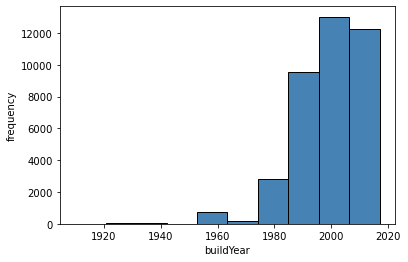

In [7]:
# there are 2808 missing values in "buildYear" ,we can look up the value distribution in "buildYear"
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#the value distribution of "buildYear" in whole dataset
plt.hist(x = df.buildYear,
         color = 'steelblue',
         edgecolor = 'black' 
         )
plt.xlabel('buildYear')
plt.ylabel('frequency')
plt.show()




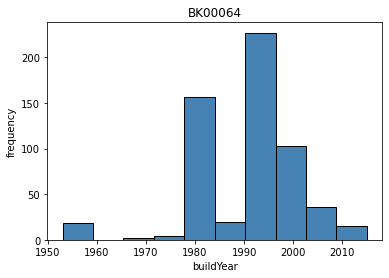

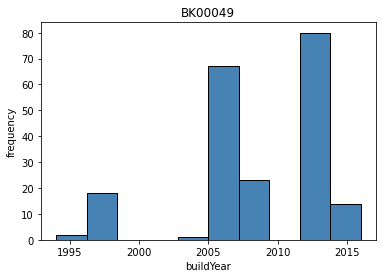

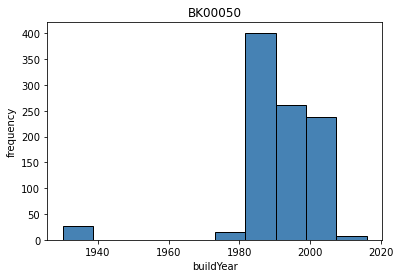

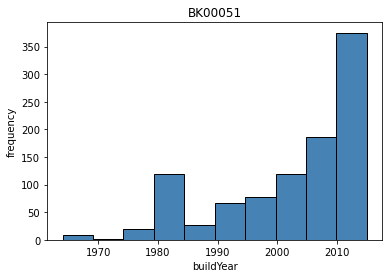

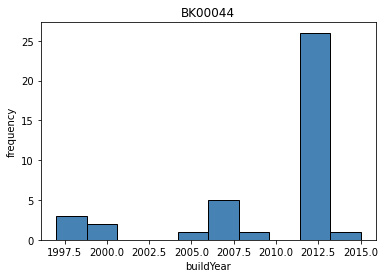

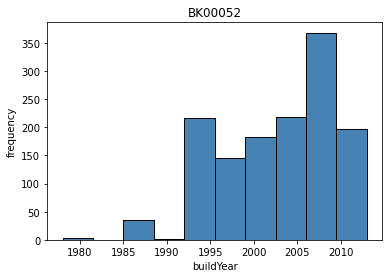

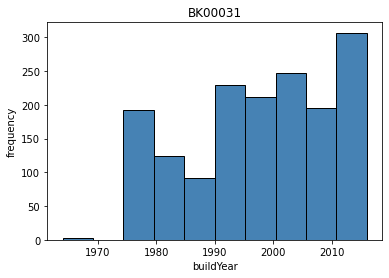

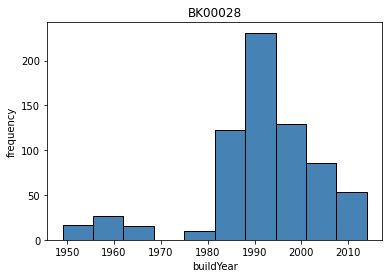

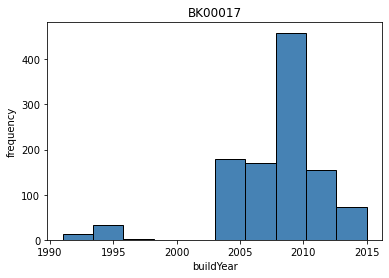

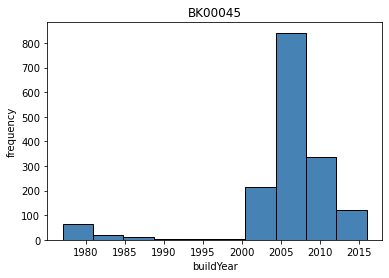

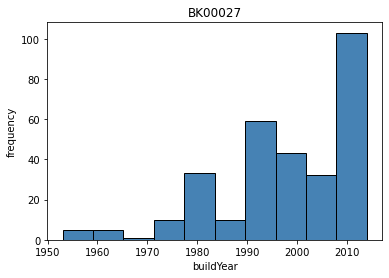

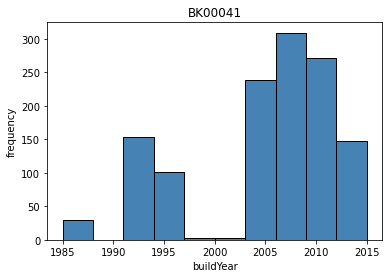

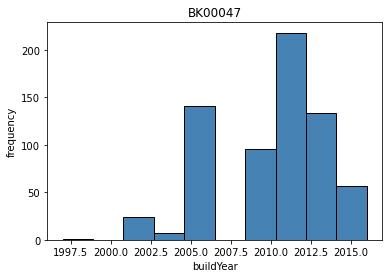

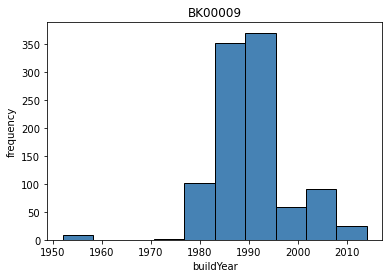

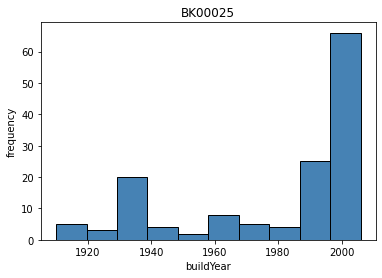

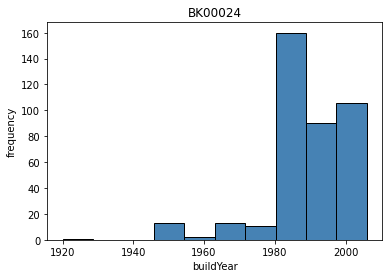

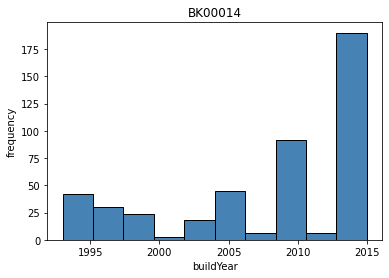

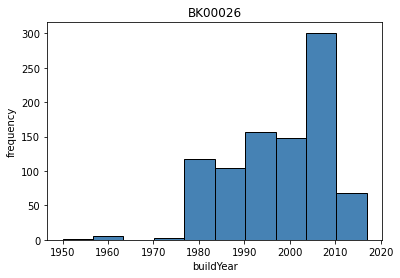

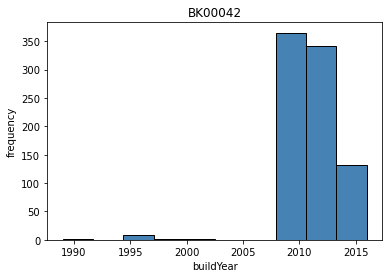

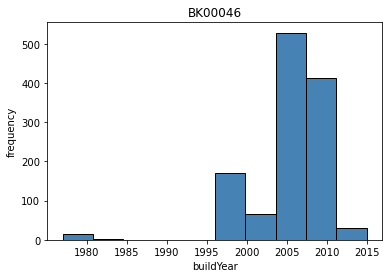

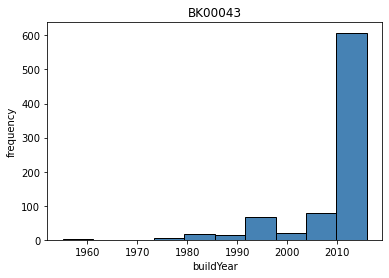

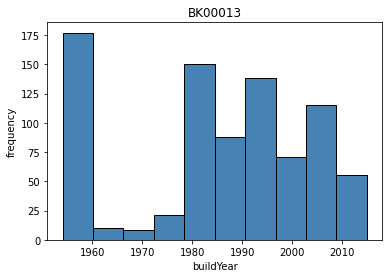

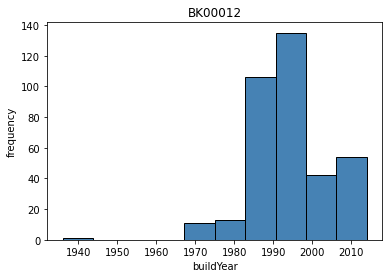

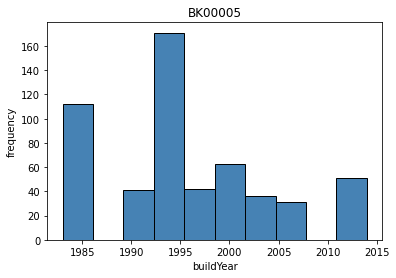

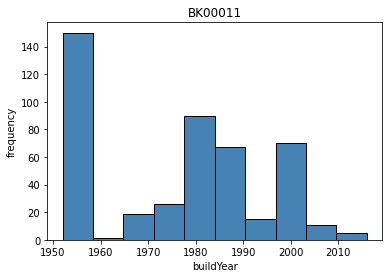

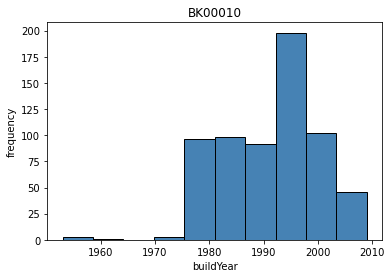

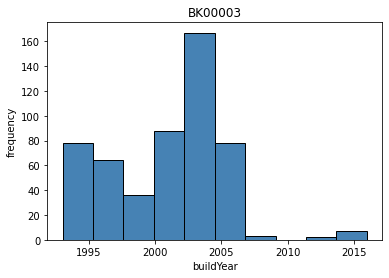

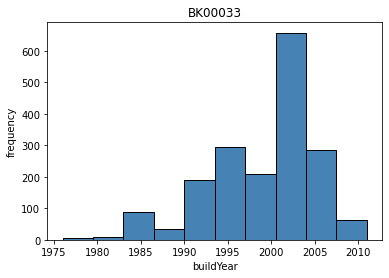

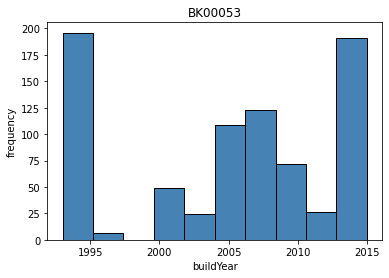

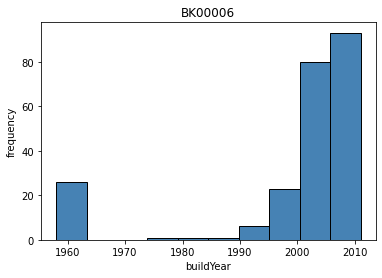

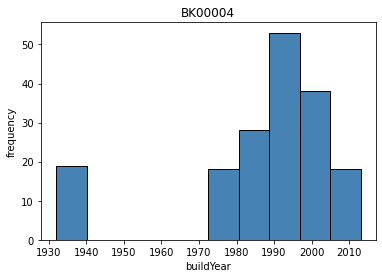

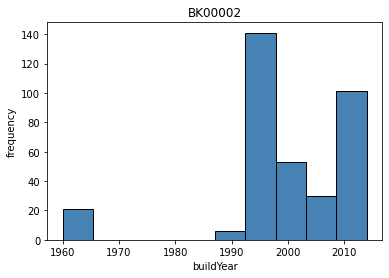

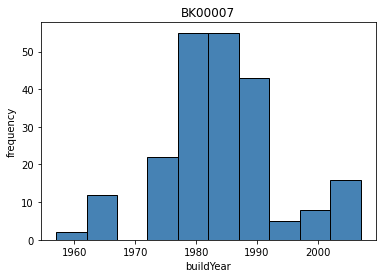

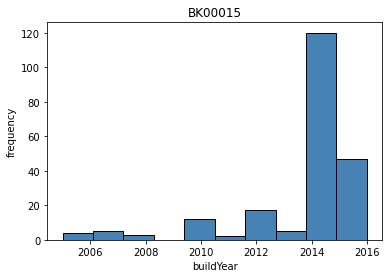

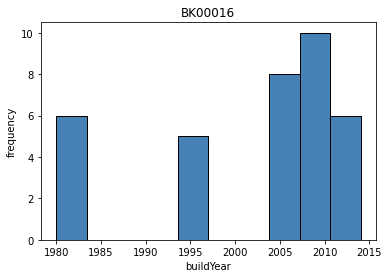

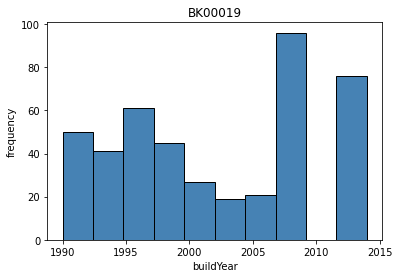

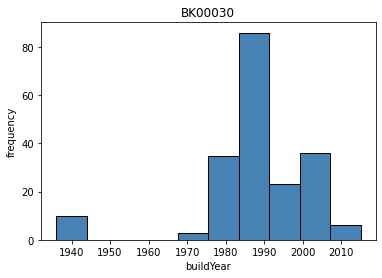

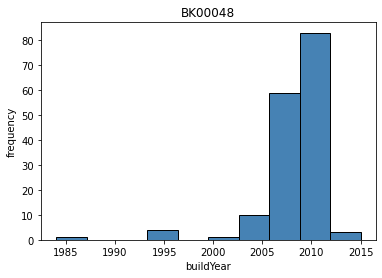

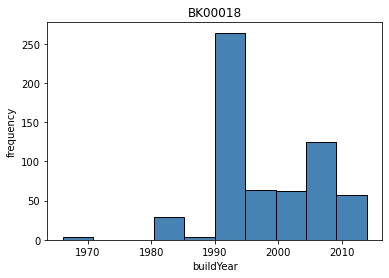

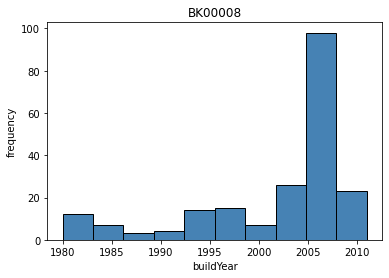

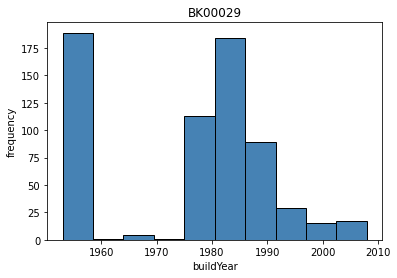

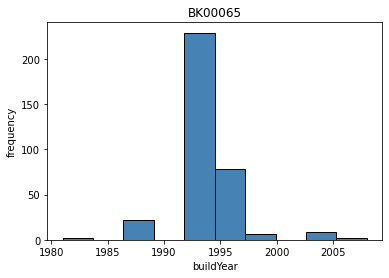

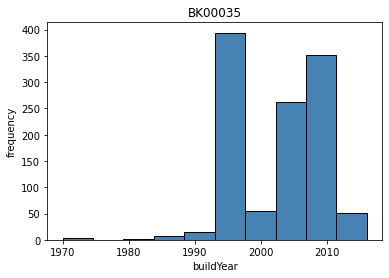

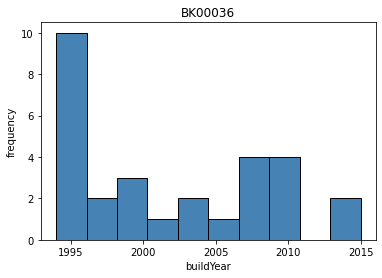

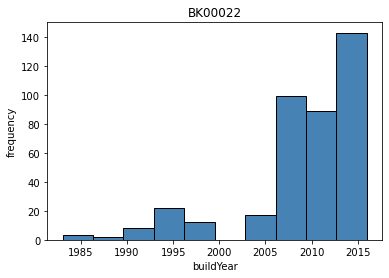

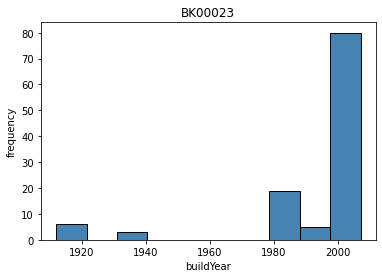

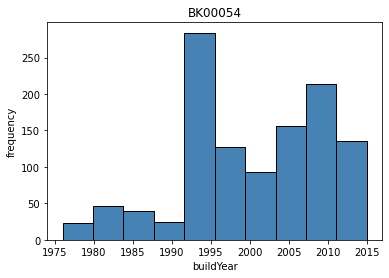

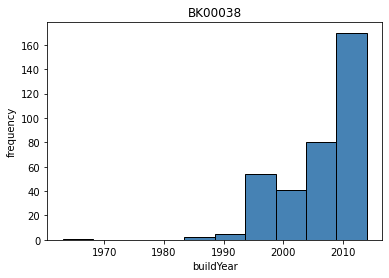

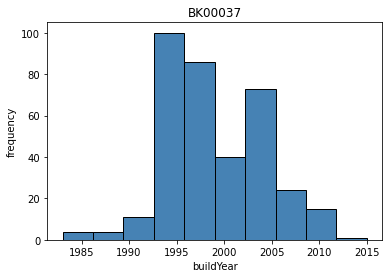

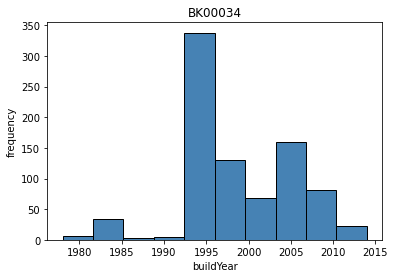

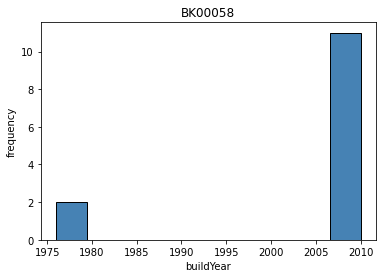

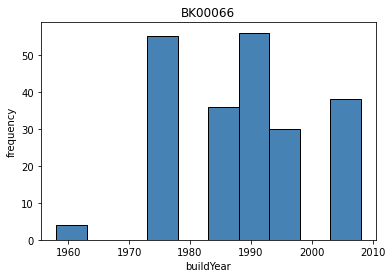

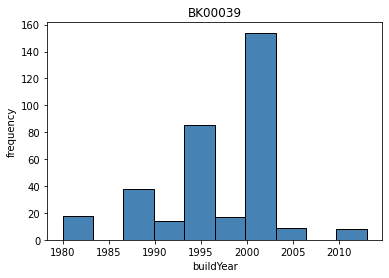

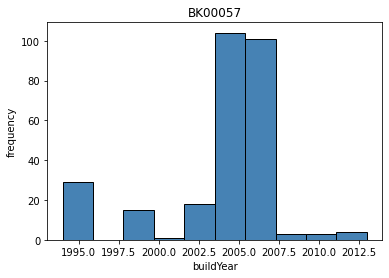

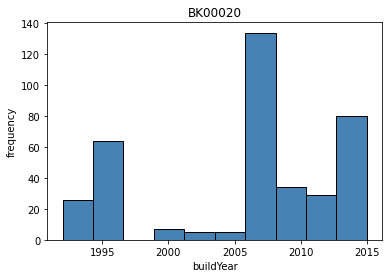

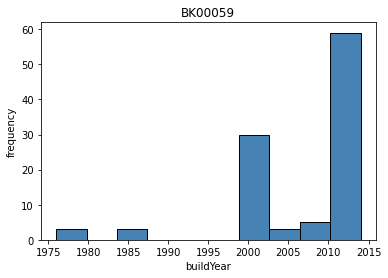

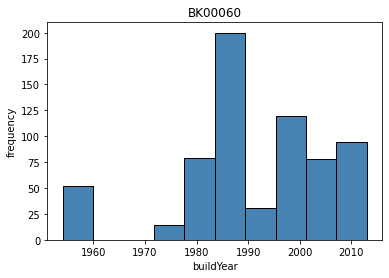

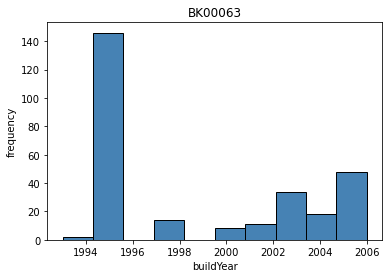

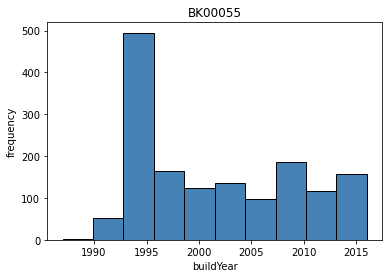

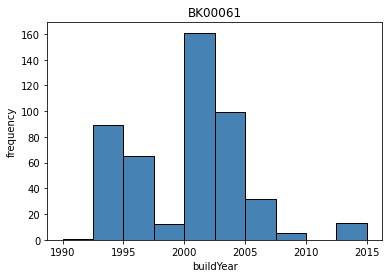

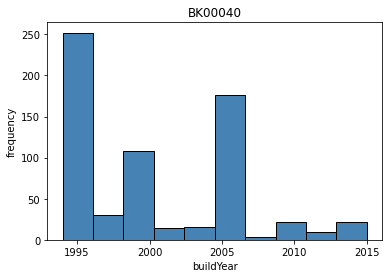

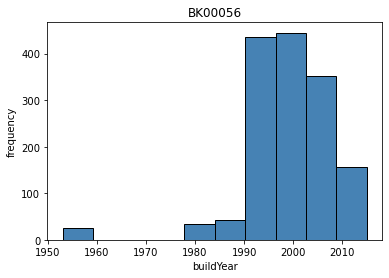

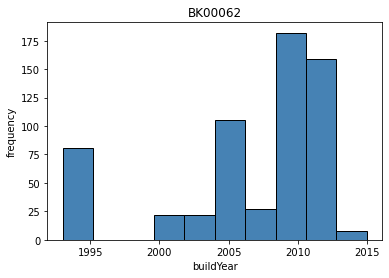

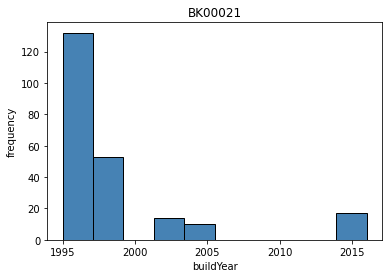

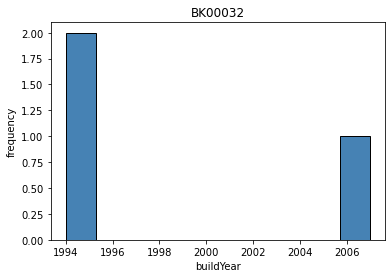

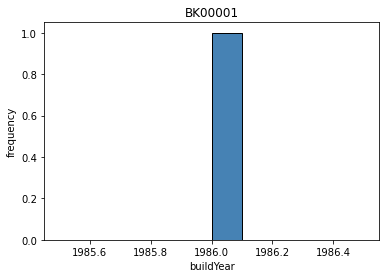

In [8]:
#the value distribution of "buildYear" group by "plate"
for i in df['plate'].unique():
    temp_plate = df[df['plate']==i]
    plt.hist(x = temp_plate.buildYear,
         color = 'steelblue',
         edgecolor = 'black' 
         )
    
    plt.xlabel('buildYear')
    plt.ylabel('frequency')
    plt.title(i)
    plt.show()

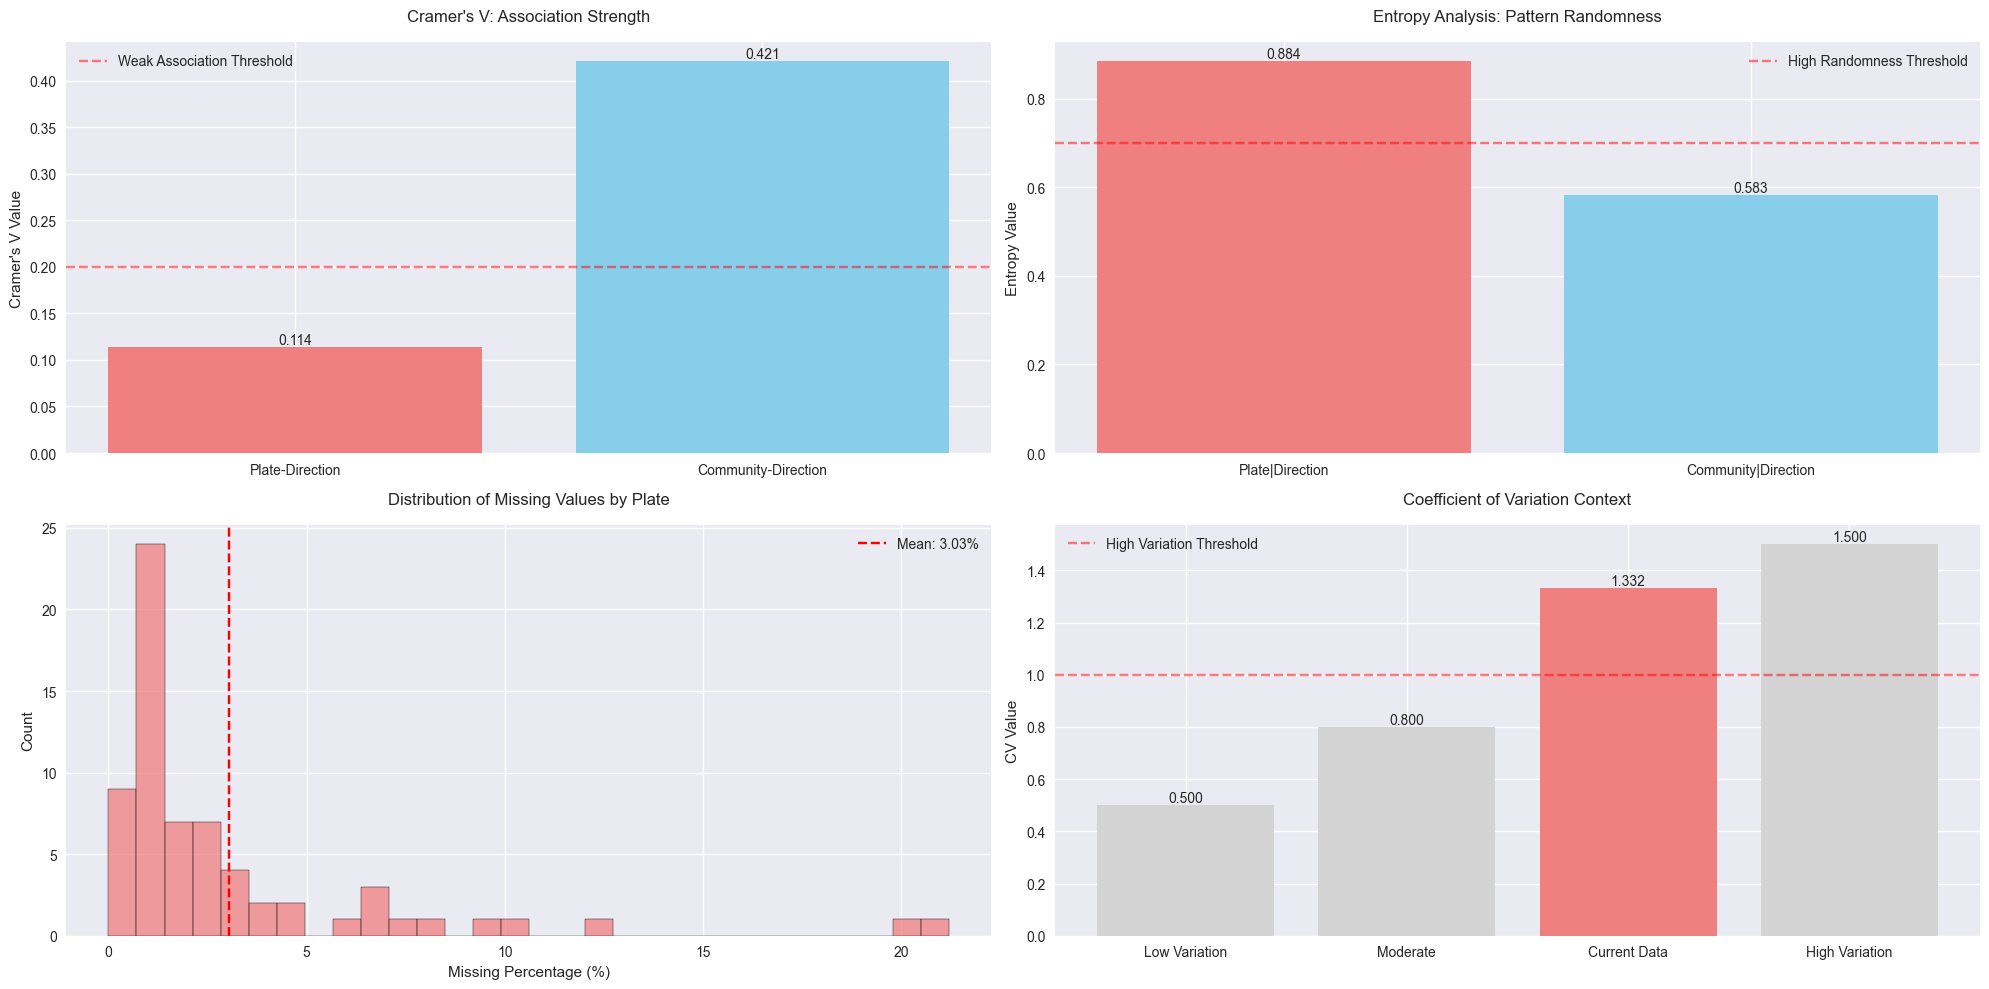

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_statistical_evidence(df):
    fig = plt.figure(figsize=(20, 10))
    
    # 1. Cramer's V Comparison
    plt.subplot(2, 2, 1)
    cramer_v_values = {
        'Plate-Direction': 0.1143,
        'Community-Direction': 0.4209
    }
    colors = ['lightcoral', 'skyblue']
    bars = plt.bar(cramer_v_values.keys(), cramer_v_values.values(), color=colors)
    plt.axhline(y=0.2, color='r', linestyle='--', alpha=0.5, label='Weak Association Threshold')
    plt.title("Cramer's V: Association Strength", fontsize=12, pad=15)
    plt.ylabel("Cramer's V Value")
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')
    plt.legend()

    # 2. Entropy Comparison
    plt.subplot(2, 2, 2)
    entropy_values = {
        'Plate|Direction': 0.8838,
        'Community|Direction': 0.5832
    }
    bars = plt.bar(entropy_values.keys(), entropy_values.values(), color=colors)
    plt.axhline(y=0.7, color='r', linestyle='--', alpha=0.5, label='High Randomness Threshold')
    plt.title('Entropy Analysis: Pattern Randomness', fontsize=12, pad=15)
    plt.ylabel('Entropy Value')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')
    plt.legend()

    # 3. Missing Value Distribution
    plt.subplot(2, 2, 3)
    missing_by_plate = df.groupby('plate')['houseToward'].apply(lambda x: x.isna().mean() * 100)
    sns.histplot(missing_by_plate, bins=30, color='lightcoral')
    plt.axvline(x=missing_by_plate.mean(), color='r', linestyle='--', 
                label=f'Mean: {missing_by_plate.mean():.2f}%')
    plt.title('Distribution of Missing Values by Plate', fontsize=12, pad=15)
    plt.xlabel('Missing Percentage (%)')
    plt.ylabel('Count')
    plt.legend()

    # 4. Coefficient of Variation Context
    plt.subplot(2, 2, 4)
    cv_value = 1.3322
    reference_cv = {
        'Low Variation': 0.5,
        'Moderate': 0.8,
        'Current Data': cv_value,
        'High Variation': 1.5
    }
    bars = plt.bar(reference_cv.keys(), reference_cv.values(), 
                  color=['lightgray', 'lightgray', 'lightcoral', 'lightgray'])
    plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.5, label='High Variation Threshold')
    plt.title('Coefficient of Variation Context', fontsize=12, pad=15)
    plt.ylabel('CV Value')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function
visualize_statistical_evidence(df)

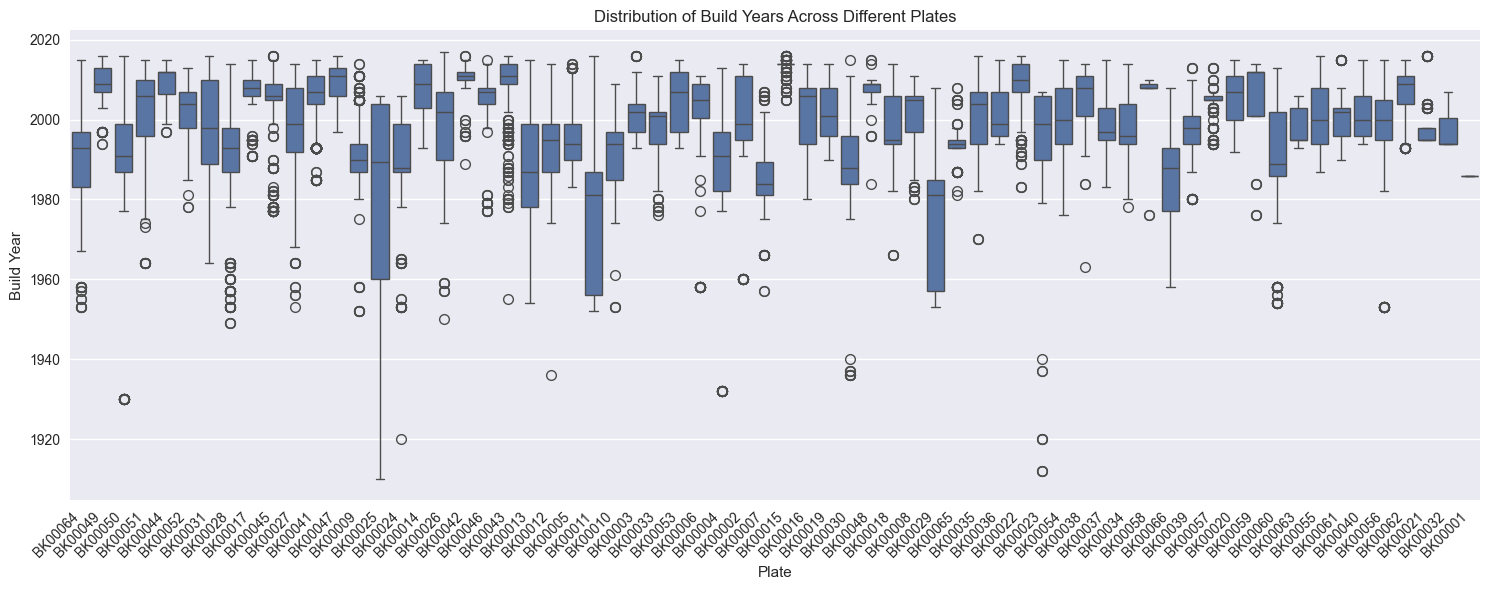


Statistical Analysis of Build Years by Plate:
--------------------------------------------
         Count     Mean    Std  Median    Mode
plate                                         
BK00001      1  1986.00    NaN  1986.0  1986.0
BK00002    352  1999.56  12.51  1999.0  1995.0
BK00003    523  2001.07   4.44  2002.0  2004.0
BK00004    174  1986.06  20.82  1991.0  1932.0
BK00005    547  1995.56   8.30  1994.0  1994.0
...        ...      ...    ...     ...     ...
BK00062    606  2006.28   5.78  2009.0  2009.0
BK00063    281  1998.85   4.42  1995.0  1995.0
BK00064    581  1990.90  10.41  1993.0  1993.0
BK00065    348  1994.05   3.19  1994.0  1993.0
BK00066    219  1988.01  10.26  1988.0  1977.0

[66 rows x 5 columns]


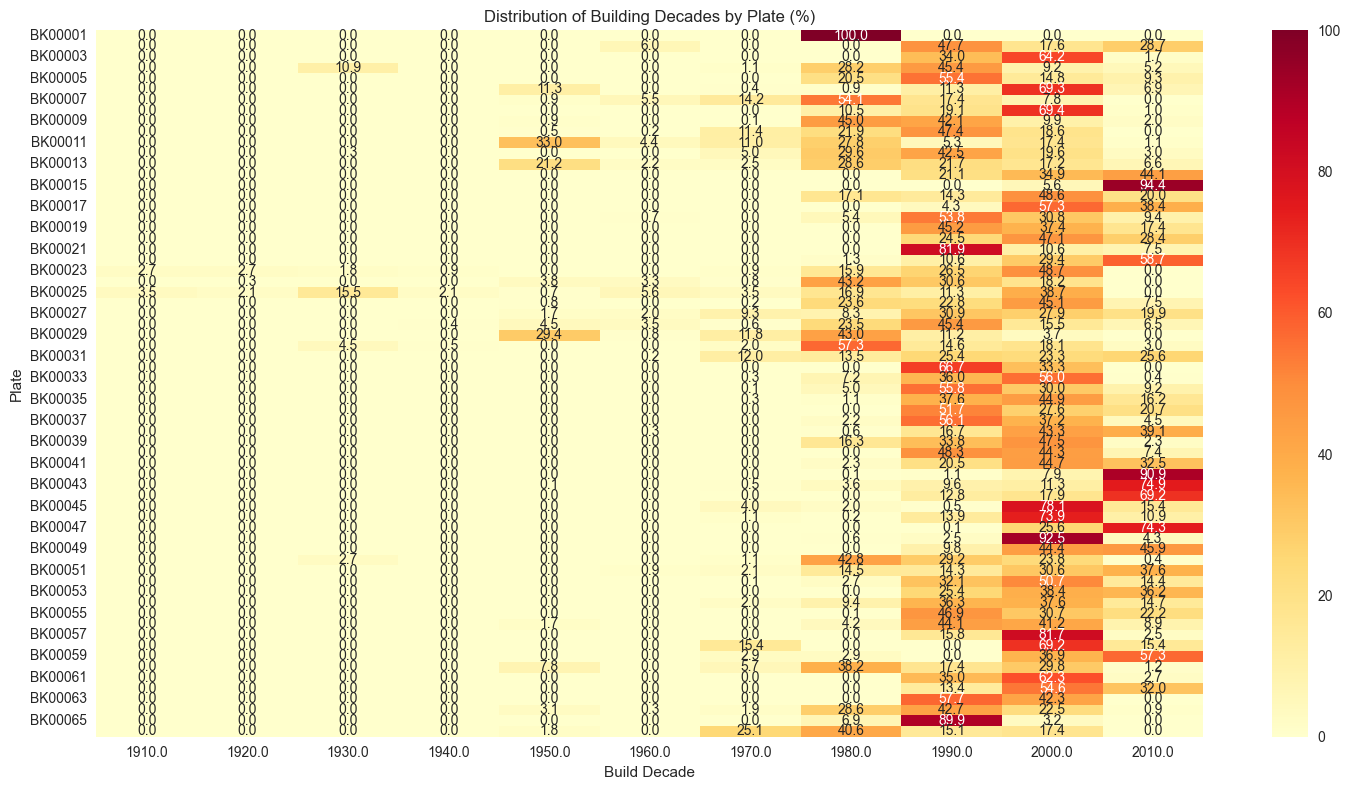

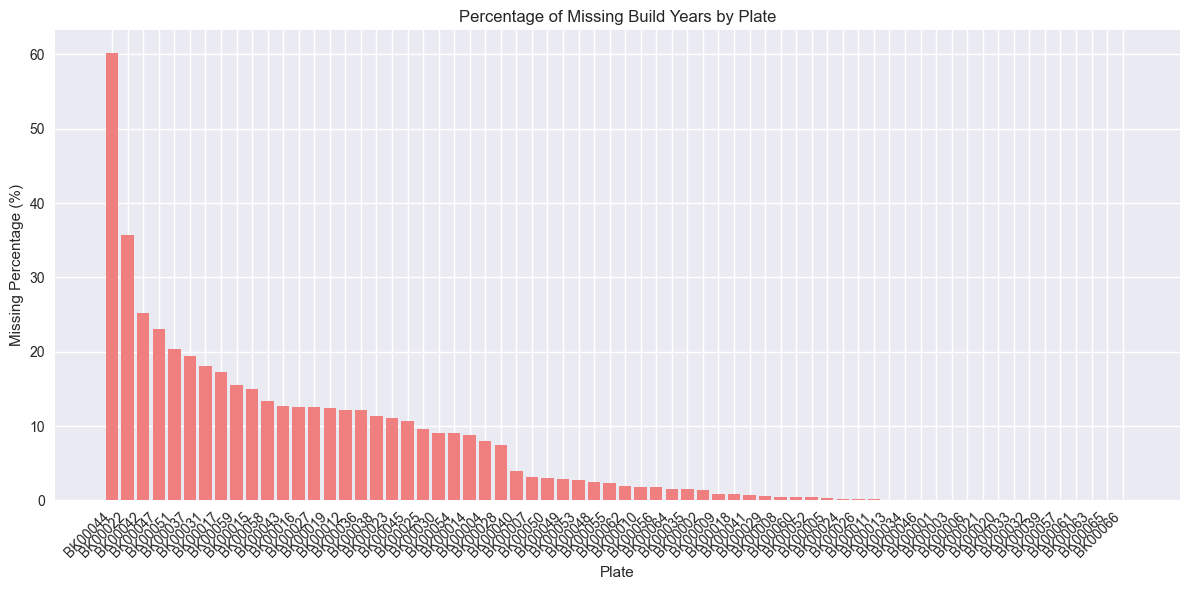


Mode Analysis for Build Years by Plate:
--------------------------------------
           mode  mode_frequency  total_count  mode_percentage
plate                                                        
BK00001  1986.0               1            1           100.00
BK00002  1995.0              74          352            21.02
BK00003  2004.0              97          523            18.55
BK00004  1932.0              19          174            10.92
BK00005  1994.0             130          547            23.77
...         ...             ...          ...              ...
BK00062  2009.0             155          606            25.58
BK00063  1995.0             146          281            51.96
BK00064  1993.0              98          581            16.87
BK00065  1993.0             126          348            36.21
BK00066  1977.0              55          219            25.11

[66 rows x 4 columns]


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def analyze_buildyear_distribution(df):
    # 1. Box Plot: Build Year Distribution by Plate
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='plate', y='buildYear', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Build Years Across Different Plates')
    plt.xlabel('Plate')
    plt.ylabel('Build Year')
    plt.tight_layout()
    plt.show()

    # 2. Statistical Summary
    print("\nStatistical Analysis of Build Years by Plate:")
    print("--------------------------------------------")
    stats_by_plate = df.groupby('plate')['buildYear'].agg(['count', 'mean', 'std', 'median', 
                                                          lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan])
    stats_by_plate.columns = ['Count', 'Mean', 'Std', 'Median', 'Mode']
    print(stats_by_plate.round(2))

    # 3. Heatmap of Build Year Decades by Plate
    plt.figure(figsize=(15, 8))
    
    # Create decade bins
    df['build_decade'] = (df['buildYear'] // 10) * 10
    decade_plate = pd.crosstab(df['plate'], df['build_decade'], normalize='index') * 100
    
    sns.heatmap(decade_plate, cmap='YlOrRd', annot=True, fmt='.1f')
    plt.title('Distribution of Building Decades by Plate (%)')
    plt.xlabel('Build Decade')
    plt.ylabel('Plate')
    plt.tight_layout()
    plt.show()

    # 4. Missing Value Analysis
    plt.figure(figsize=(12, 6))
    missing_by_plate = df.groupby('plate')['buildYear'].apply(lambda x: x.isna().mean() * 100).sort_values(ascending=False)
    
    plt.bar(range(len(missing_by_plate)), missing_by_plate, color='lightcoral')
    plt.xticks(range(len(missing_by_plate)), missing_by_plate.index, rotation=45, ha='right')
    plt.title('Percentage of Missing Build Years by Plate')
    plt.xlabel('Plate')
    plt.ylabel('Missing Percentage (%)')
    plt.tight_layout()
    plt.show()

    # 5. Mode Analysis
    print("\nMode Analysis for Build Years by Plate:")
    print("--------------------------------------")
    mode_analysis = df.groupby('plate')['buildYear'].agg([
        ('mode', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
        ('mode_frequency', lambda x: x.value_counts().iloc[0] if not x.empty else 0),
        ('total_count', 'count')
    ])
    mode_analysis['mode_percentage'] = (mode_analysis['mode_frequency'] / mode_analysis['total_count'] * 100)
    print(mode_analysis.round(2))

# Call the function
analyze_buildyear_distribution(df)

One-way ANOVA Results:
-----------------------
F-statistic: 374.7544
p-value: 0.0000000000

Effect Size (Eta-squared): 0.3871

Effect Size Interpretation:
- < 0.01: Very small effect
- 0.01-0.06: Small effect
- 0.06-0.14: Medium effect
- > 0.14: Large effect


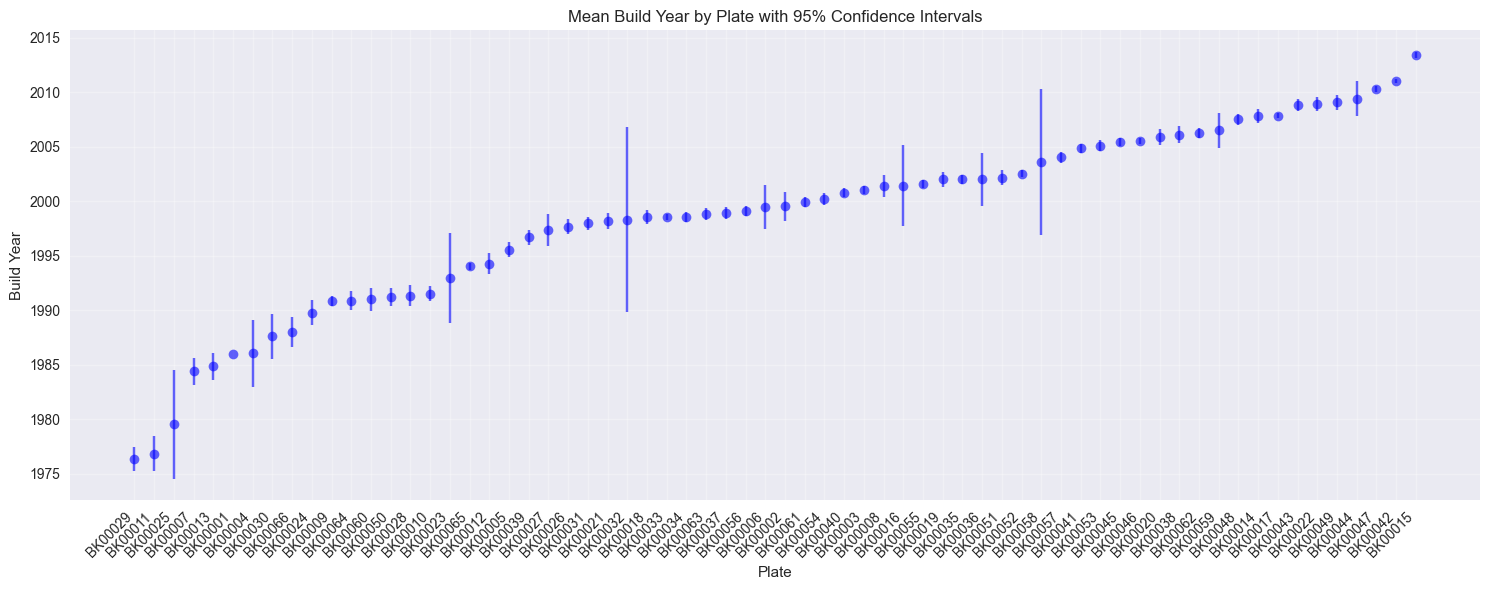

c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\integrate\_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,



Post-hoc Analysis (Tukey's HSD):
Number of significant differences: 1564 out of 2145 pairs
Percentage of significant differences: 72.91%

Levene's Test for Homogeneity of Variance:
Statistic: 132.3134
p-value: 0.0000000000


In [23]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def analyze_buildyear_anova(df):
    # Prepare data - remove rows with NaN in buildYear
    df_clean = df.dropna(subset=['buildYear'])
    
    # 1. One-way ANOVA
    plates = df_clean['plate'].unique()
    build_years_by_plate = [df_clean[df_clean['plate'] == plate]['buildYear'] for plate in plates]
    
    f_statistic, p_value = stats.f_oneway(*build_years_by_plate)
    
    print("One-way ANOVA Results:")
    print("-----------------------")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"p-value: {p_value:.10f}")
    
    # 2. Effect Size (Eta-squared)
    def calculate_eta_squared(df, feature, target):
        groups = df.groupby(feature)[target]
        grand_mean = df[target].mean()
        
        ss_between = sum(len(group) * ((mean - grand_mean) ** 2) 
                        for name, group in groups for mean in [group.mean()])
        ss_total = sum((x - grand_mean) ** 2 for x in df[target])
        
        return ss_between / ss_total
    
    eta_squared = calculate_eta_squared(df_clean, 'plate', 'buildYear')
    
    print(f"\nEffect Size (Eta-squared): {eta_squared:.4f}")
    print("\nEffect Size Interpretation:")
    print("- < 0.01: Very small effect")
    print("- 0.01-0.06: Small effect")
    print("- 0.06-0.14: Medium effect")
    print("- > 0.14: Large effect")
    
    # 3. Visualization of Means with Confidence Intervals
    plt.figure(figsize=(15, 6))
    
    # Calculate means and confidence intervals
    plate_stats = df_clean.groupby('plate')['buildYear'].agg(['mean', 'std', 'count']).reset_index()
    plate_stats['ci'] = 1.96 * plate_stats['std'] / np.sqrt(plate_stats['count'])
    
    # Sort by mean build year
    plate_stats = plate_stats.sort_values('mean')
    
    plt.errorbar(range(len(plate_stats)), 
                plate_stats['mean'], 
                yerr=plate_stats['ci'], 
                fmt='o', 
                capsize=5,
                color='blue',
                alpha=0.6)
    
    plt.xticks(range(len(plate_stats)), plate_stats['plate'], rotation=45, ha='right')
    plt.title('Mean Build Year by Plate with 95% Confidence Intervals')
    plt.xlabel('Plate')
    plt.ylabel('Build Year')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 4. Post-hoc Analysis (Tukey's HSD)
    tukey = pairwise_tukeyhsd(endog=df_clean['buildYear'],
                             groups=df_clean['plate'],
                             alpha=0.05)
    
    # Count significant differences
    significant_pairs = sum(1 for result in tukey.reject if result)
    total_pairs = len(tukey.reject)
    
    print(f"\nPost-hoc Analysis (Tukey's HSD):")
    print(f"Number of significant differences: {significant_pairs} out of {total_pairs} pairs")
    print(f"Percentage of significant differences: {(significant_pairs/total_pairs)*100:.2f}%")
    
    # 5. Homogeneity of Variance Test (Levene's test)
    levene_stat, levene_p = stats.levene(*build_years_by_plate)
    
    print("\nLevene's Test for Homogeneity of Variance:")
    print(f"Statistic: {levene_stat:.4f}")
    print(f"p-value: {levene_p:.10f}")

# Run the analysis
analyze_buildyear_anova(df)

The comprehensive ANOVA analysis provides strong statistical evidence supporting plate-based mode imputation for build years. The highly significant F-statistic (374.75, p < 0.0001) and large effect size (η² = 0.3871) indicate substantial differences in build years across plates. This is further reinforced by Tukey's HSD post-hoc analysis, which reveals that 72.91% of plate pairs (1,564 out of 2,145) show significant differences. While Levene's test (statistic = 132.31, p < 0.0001) indicates heterogeneous variances across plates, this actually strengthens the argument for plate-specific treatment. The clear temporal progression and distinct groupings visible in the confidence interval plot, combined with these statistical measures, provide robust justification for using plate-specific modes rather than global values for imputing missing build years.

In [25]:
import math
import re

#define how to get mode of values
def mode1(x):
    result = np.mean(pd.Series.mode(x))
    return result

#fill nan values in 'buildYear' according to mode of 'buildYear' group by 'plate'
def BuildYear_NAProcess(df):
    List_clean = list(df['buildYear'].map(lambda x: False if math.isnan(x) else True))
    df_clean = df.loc[List_clean]
    MeanYear_plate = df_clean.pivot_table(index='plate', values='buildYear', aggfunc=mode1).reset_index()
    MeanYear_plate['buildYear'] = MeanYear_plate['buildYear'].map(lambda x: math.ceil(x))
    List_na = df['buildYear'].map(lambda x: math.isnan(x))
    df_na = df.loc[List_na].drop(['buildYear'], axis=1)
    df_na = df_na.merge(MeanYear_plate, on='plate', how='left')
    df = pd.concat([df_clean, df_na], ignore_index=True)
    df['buildYear'] = df['buildYear'].map(lambda x: int(x))
    return df

#divide the 'houseType' into three attributes:'livingroom','bedroom','bathroom'
def process_houseType(df_process):
    list_bedroom = []
    list_livingroom = []
    list_bathroom = []
    list_ID = []
    for index, row in df_process.iterrows():
        Id_str = row['ID']
        list_ID.append(Id_str)
        house_str = row['houseType']
        list_num = re.findall('[0-9]+', house_str)
        list_bedroom.append(list_num[0])
        list_livingroom.append(list_num[1])
        list_bathroom.append(list_num[2])
    dict_room = {"ID": list_ID, "bedroom": list_bedroom, "livingroom": list_livingroom, "bathroom": list_bathroom}
    df_room = pd.DataFrame(dict_room)
    df_res = df_process.merge(df_room, on='ID', how='inner')
    df_res.drop(['houseType'], axis=1, inplace=True)
    return df_res

df = BuildYear_NAProcess(df)
df = process_houseType(df)

In [26]:
# look up which attribute has missing values 
df.isnull().sum().sort_values(ascending=False)

build_decade          2808
houseToward            962
pv                      18
uv                      18
rentType                 5
area                     0
houseDecoration          0
communityName            0
city                     0
region                   0
plate                    0
buildYear                0
saleSecHouseNum          0
subwayStationNum         0
busStationNum            0
interSchoolNum           0
schoolNum                0
privateSchoolNum         0
hospitalNum              0
ID                       0
houseFloor               0
totalFloor               0
bankNum                  0
gymNum                   0
drugStoreNum             0
shopNum                  0
totalTradeMoney          0
parkNum                  0
mallNum                  0
superMarketNum           0
totalNewTradeMoney       0
totalNewTradeArea        0
tradeNewMeanPrice        0
tradeNewNum              0
remainNewNum             0
totalTradeArea           0
tradeMeanPrice           0
t

We decide to fill the missing values in "pv" and "uv" simply by their mean values because the number of missing values is too few

In [27]:
# fill nan values in 'pv' and 'uv'
df['pv'].fillna(df['pv'].mean(),inplace=True)
df['uv'].fillna(df['uv'].mean(),inplace=True)
df['pv'] = df['pv'].astype('int')
df['uv'] = df['uv'].astype('int')
# drop 'city' because it has only one value
df.drop('city',axis=1,inplace=True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_45356\3501144422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pv'].fillna(df['pv'].mean(),inplace=True)
C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_45356\3501144422.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [28]:
# find the proportions of target value
num = len(df)
for i in range(1, 10):
    s = i*5000
    print('{:<6}: {:.5f}'.format(s, len(df[df['tradeMoney'] < s]) / num))

5000  : 0.68445
10000 : 0.93318
15000 : 0.97179
20000 : 0.98624
25000 : 0.99208
30000 : 0.99534
35000 : 0.99691
40000 : 0.99771
45000 : 0.99797


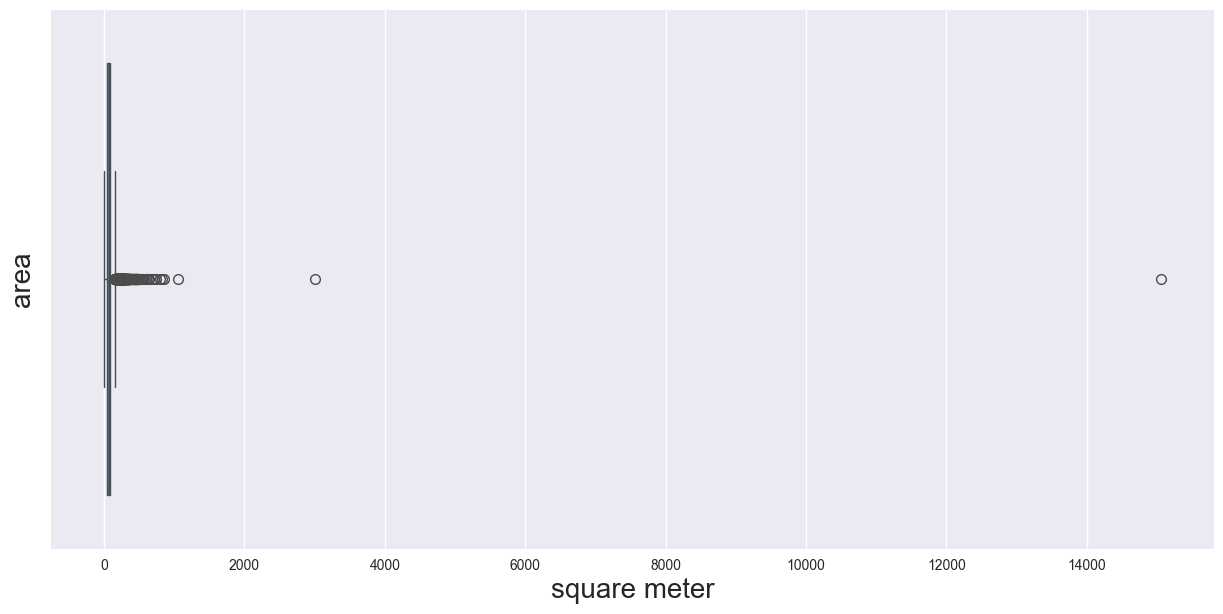

<Axes: xlabel='area', ylabel='Density'>

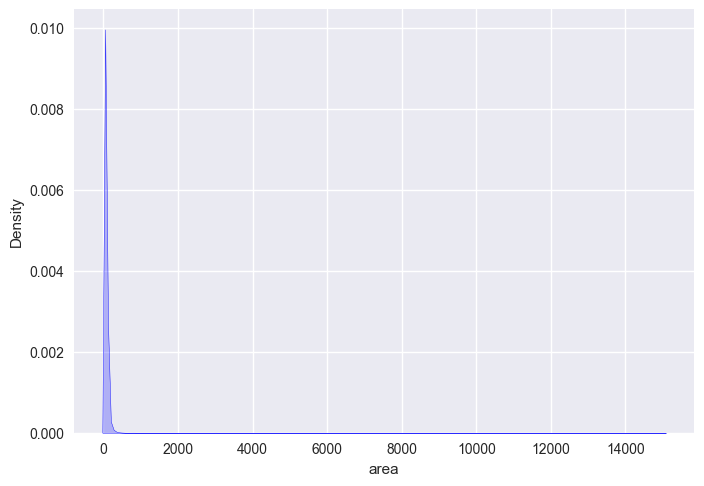

In [31]:
# look up the outlier of 'area'
plt.figure(figsize=(15,7))
sns.boxplot(x='area', data=df, orient='h')
plt.ylabel('area', fontsize=20.0)
plt.xlabel('square meter', fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['area'], color="Blue", fill=True)

> There are some extreme values,so we decided to use IQR rule to delete the outliers

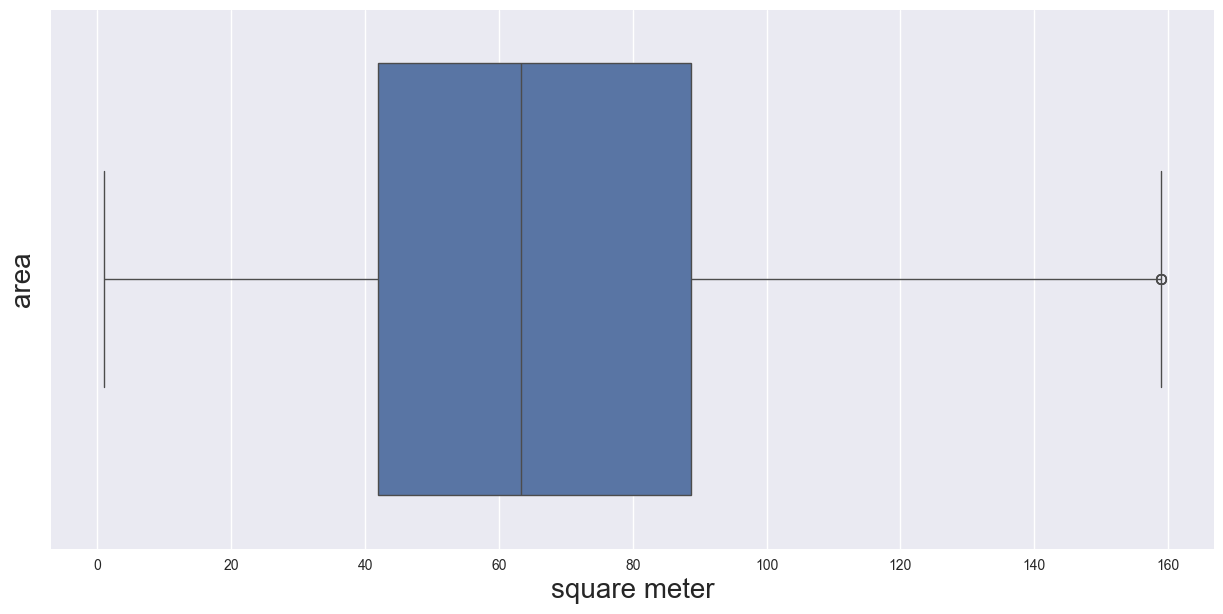

(40084, 53)

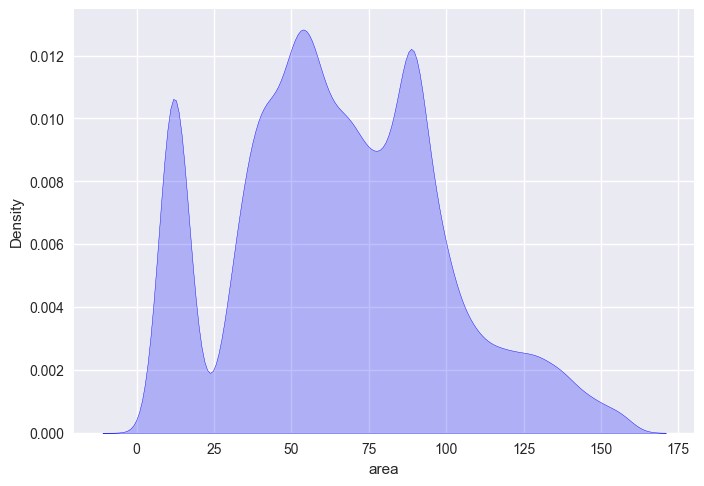

In [34]:
def IQRule(df_one):
    q1 = df_one.describe()["25%"]
    q3 = df_one.describe()["75%"]
    s = (q3-q1)*1.5
    LB = q1 - s
    UB = q3 + s
    return [LB, UB]

bound = IQRule(df['area'])

# Adjust the dataset to remove a part of outlier according to IQR rule
df = df[(df['area'] <= bound[1]) & (df['area'] > bound[0])]

# Look up the outlier of 'area'
plt.figure(figsize=(15, 7))
sns.boxplot(x='area', data=df, orient='h')
plt.ylabel('area', fontsize=20.0)
plt.xlabel('square meter', fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()

# Look up the distribution of 'area'
sns.kdeplot(df['area'], color="Blue", fill=True)
df.shape

> In real world ,there are no negative values in "area",so we need to adjust the "area" again

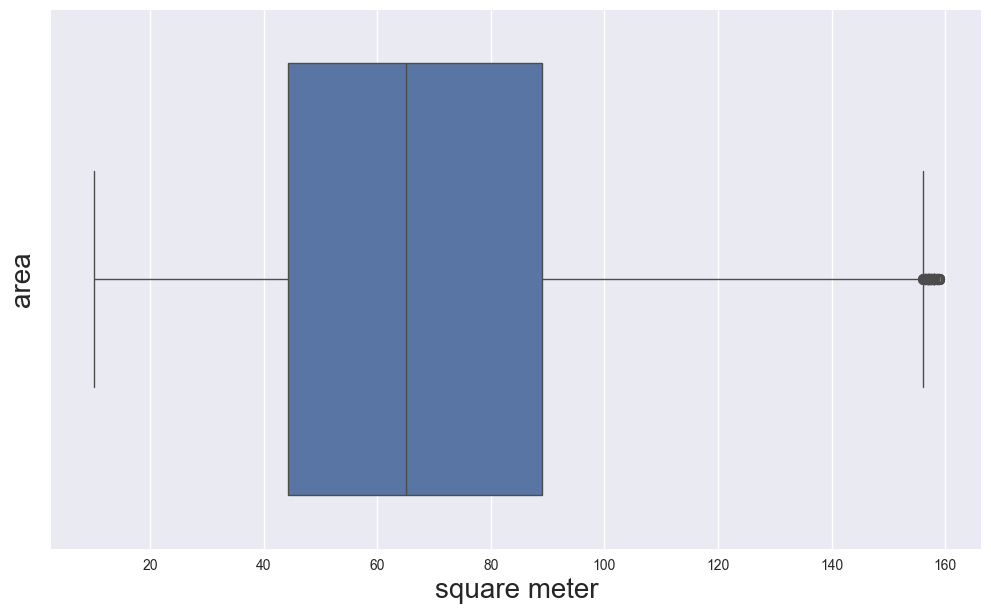

(38754, 53)

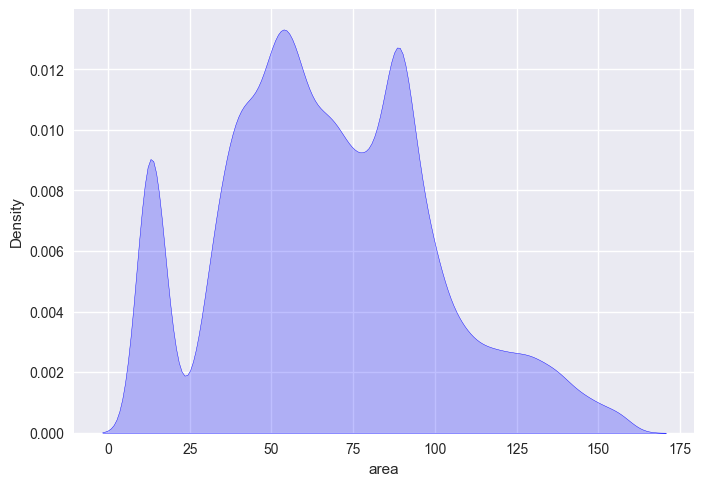

In [37]:
df = df[df['area']>10]
# look up the outlier of 'area'
plt.figure(figsize=(12,7))
sns.boxplot(x='area', data=df, orient='h')
plt.ylabel('area',fontsize=20.0)
plt.xlabel('square meter',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['area'], color="Blue", fill=True)
df.shape

In [38]:
df['plate'].nunique()

66

In [40]:
def analyze_area_by_plate(df):
    # Calculate comprehensive statistics by plate
    stats_by_plate = df.groupby('plate')['area'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('median', 'median'),
        ('std', 'std'),
        ('min', 'min'),
        ('max', 'max')
    ]).round(2)
    
    # Add coefficient of variation (CV)
    stats_by_plate['cv'] = (stats_by_plate['std'] / stats_by_plate['mean']).round(3)
    
    # Sort by mean area descending
    stats_by_plate = stats_by_plate.sort_values('mean', ascending=False)
    
    # Calculate quartiles for grouping
    mean_quartiles = stats_by_plate['mean'].quantile([0.25, 0.5, 0.75])
    
    # Create size categories
    def get_size_category(x):
        if x >= mean_quartiles[0.75]:
            return 'Large'
        elif x >= mean_quartiles[0.5]:
            return 'Medium-Large'
        elif x >= mean_quartiles[0.25]:
            return 'Medium-Small'
        else:
            return 'Small'
    
    stats_by_plate['size_category'] = stats_by_plate['mean'].apply(get_size_category)
    
    # Print summary tables
    print("Area Statistics by Plate (Top 10 by Mean Area)")
    print("---------------------------------------------")
    print(stats_by_plate.head(10))
    
    print("\nArea Statistics by Size Category")
    print("--------------------------------")
    category_summary = stats_by_plate.groupby('size_category').agg({
        'count': 'sum',
        'mean': 'mean',
        'median': 'mean',
        'cv': 'mean'
    }).round(2)
    print(category_summary)
    
    print("\nOverall Statistics")
    print("-----------------")
    overall_stats = pd.DataFrame({
        'Total Plates': len(stats_by_plate),
        'Total Properties': stats_by_plate['count'].sum(),
        'Overall Mean Area': df['area'].mean(),
        'Overall Median Area': df['area'].median(),
        'Overall CV': df['area'].std() / df['area'].mean()
    }, index=['Value']).round(2)
    print(overall_stats.T)

# Call the function
analyze_area_by_plate(df)

Area Statistics by Plate (Top 10 by Mean Area)
---------------------------------------------
         count   mean  median    std    min     max     cv size_category
plate                                                                   
BK00008    159  99.49  107.10  39.27  14.80  158.92  0.395         Large
BK00036     21  94.12   91.50  33.88  36.26  158.00  0.360         Large
BK00059    119  93.55   89.00  18.46  42.62  141.84  0.197         Large
BK00016     34  88.91   87.53  27.37  52.24  151.76  0.308         Large
BK00063    240  84.99   69.12  32.59  45.54  157.21  0.383         Large
BK00037    392  84.76   89.12  38.11  10.20  158.91  0.450         Large
BK00049    210  83.14   80.09  23.72  39.00  145.21  0.285         Large
BK00006    213  81.94   83.61  38.17  10.20  158.60  0.466         Large
BK00051   1229  81.62   81.31  24.71  18.00  158.90  0.303         Large
BK00031   1921  80.99   83.81  25.98  20.00  158.86  0.321         Large

Area Statistics by Size Catego

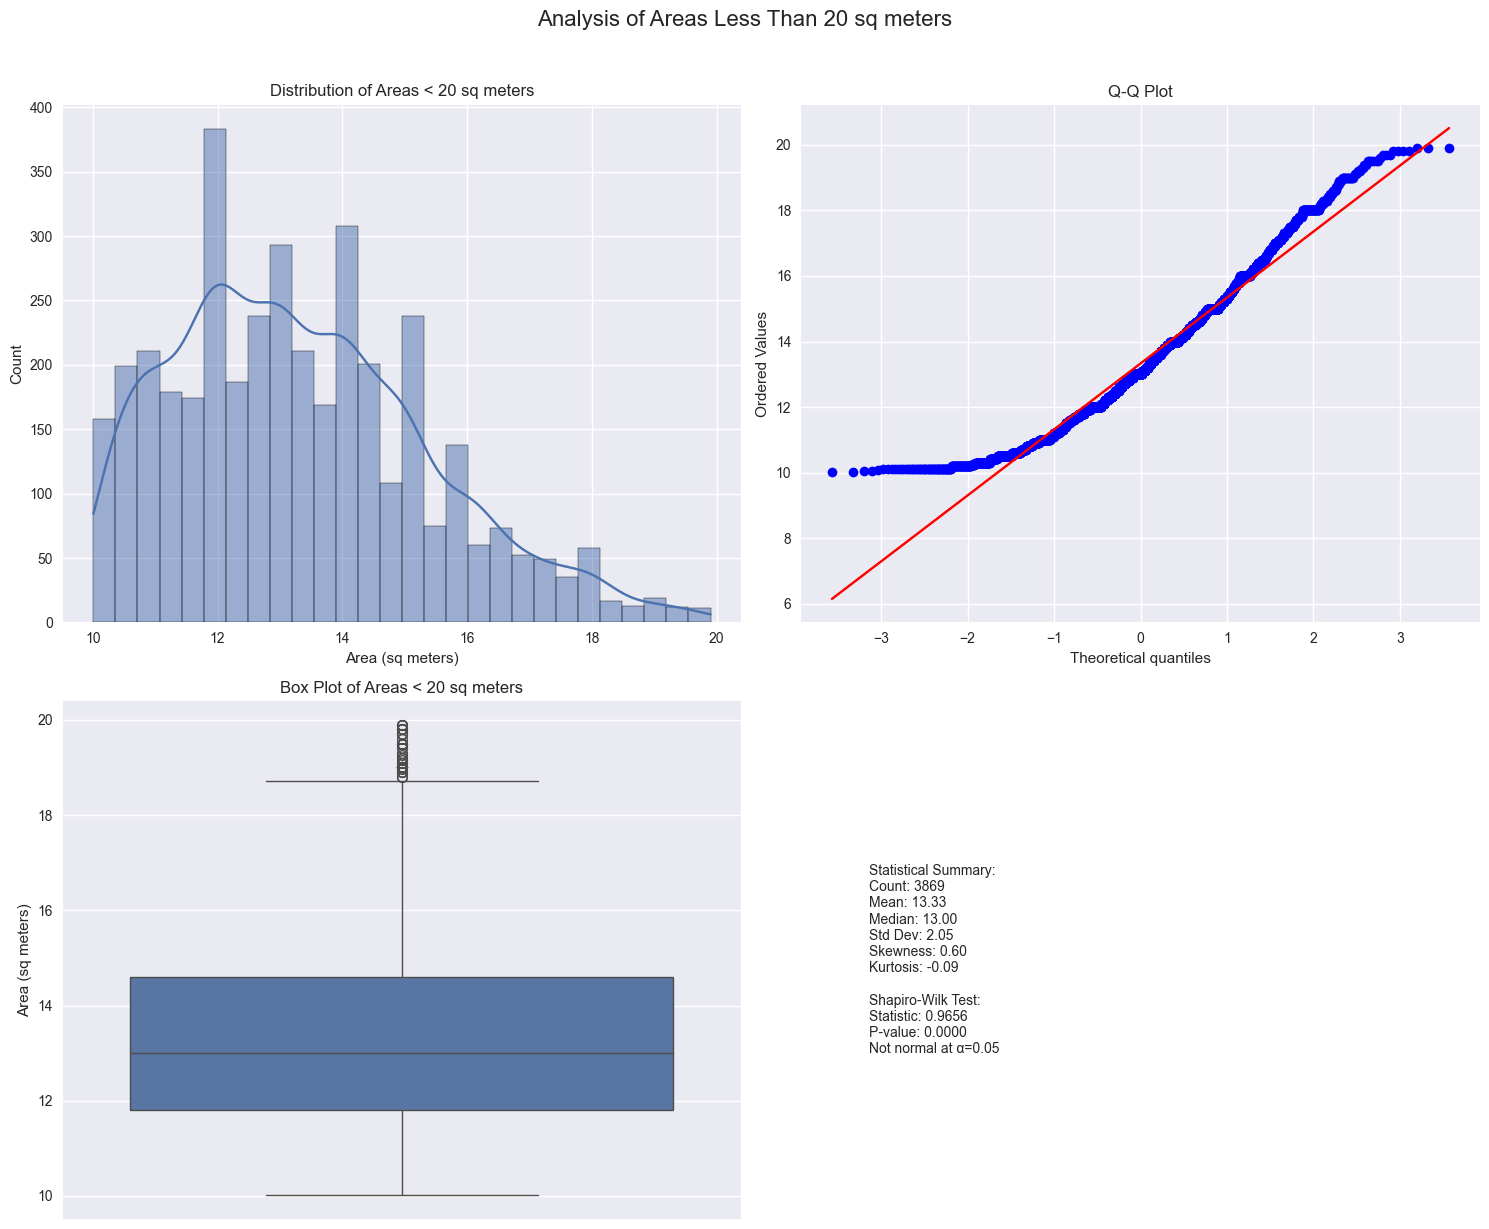


Properties with area < 20 sq meters: 3,869 (10.0% of total)


In [41]:
def analyze_small_area_distribution(df, threshold=20):
    # Create figure with 2x2 subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Analysis of Areas Less Than 20 sq meters', fontsize=16, y=1.02)
    
    # Get small area data
    small_areas = df[df['area'] < threshold]['area']
    
    # 1. Histogram with KDE
    sns.histplot(data=small_areas, kde=True, ax=ax1)
    ax1.set_title('Distribution of Areas < 20 sq meters')
    ax1.set_xlabel('Area (sq meters)')
    ax1.set_ylabel('Count')
    
    # 2. Q-Q Plot
    from scipy import stats
    stats.probplot(small_areas, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot')
    
    # 3. Box Plot
    sns.boxplot(y=small_areas, ax=ax3)
    ax3.set_title('Box Plot of Areas < 20 sq meters')
    ax3.set_ylabel('Area (sq meters)')
    
    # 4. Statistical Summary
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(small_areas)
    
    # Calculate basic statistics
    stats_text = (
        f"Statistical Summary:\n"
        f"Count: {len(small_areas)}\n"
        f"Mean: {small_areas.mean():.2f}\n"
        f"Median: {small_areas.median():.2f}\n"
        f"Std Dev: {small_areas.std():.2f}\n"
        f"Skewness: {small_areas.skew():.2f}\n"
        f"Kurtosis: {small_areas.kurtosis():.2f}\n\n"
        f"Shapiro-Wilk Test:\n"
        f"Statistic: {stat:.4f}\n"
        f"P-value: {p_value:.4f}\n"
        f"{'Normal at α=0.05' if p_value > 0.05 else 'Not normal at α=0.05'}"
    )
    
    ax4.text(0.1, 0.5, stats_text, fontsize=10, va='center')
    ax4.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print percentage of data below threshold
    total_count = len(df)
    small_count = len(small_areas)
    print(f"\nProperties with area < {threshold} sq meters: {small_count:,} "
          f"({(small_count/total_count)*100:.1f}% of total)")

# Call the function
analyze_small_area_distribution(df)

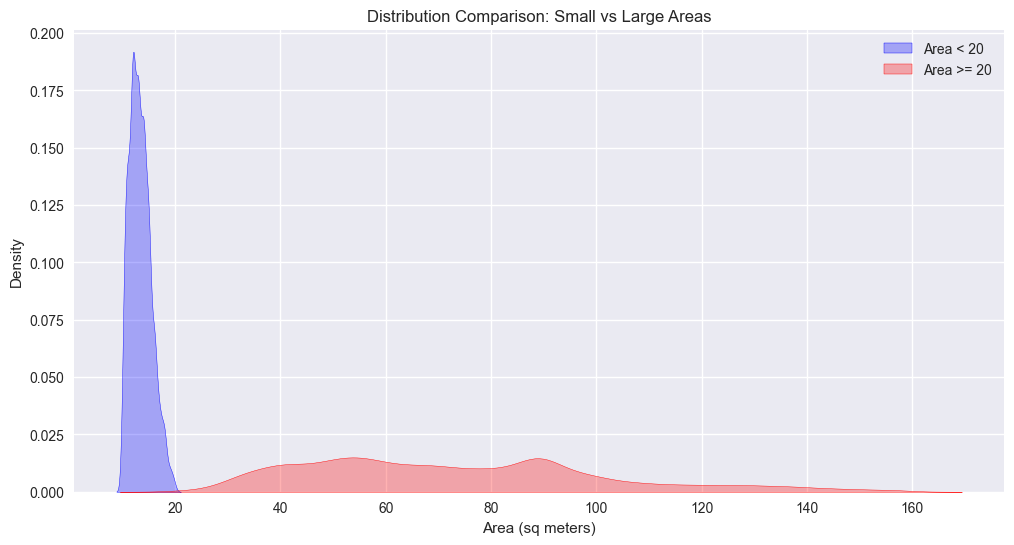

Number of properties < 20 sq m: 3,869
Number of properties >= 20 sq m: 34,885


In [43]:
# Compare distribution of areas < 20 vs > 20
df_small = df[df['area'] < 20]
df_large = df[df['area'] >= 20]

plt.figure(figsize=(12, 6))

# Plot KDE for both distributions
sns.kdeplot(data=df_small['area'], color="blue", label="Area < 20", fill=True, alpha=0.3)
sns.kdeplot(data=df_large['area'], color="red", label="Area >= 20", fill=True, alpha=0.3)

plt.title("Distribution Comparison: Small vs Large Areas")
plt.xlabel("Area (sq meters)")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f"Number of properties < 20 sq m: {len(df_small):,}")
print(f"Number of properties >= 20 sq m: {len(df_large):,}")


> from the distribution of area we can see the area less than 20 conform normal distribution ,so we look up their distribution to research why?

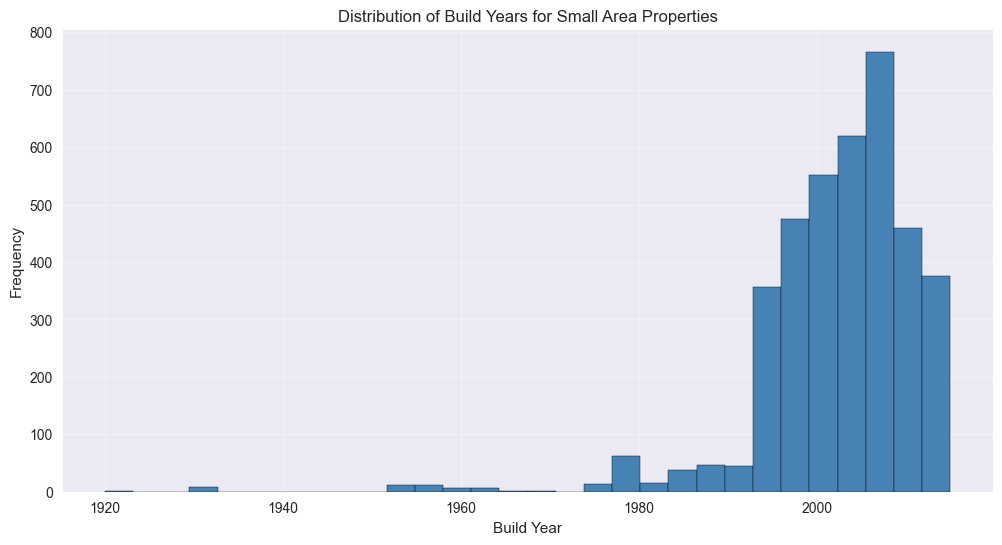


Top 10 Plates with Highest Percentage of Small Units:
         Total_Units  Small_Units  Percentage
plate                                        
BK00053          724        232.0       32.04
BK00022          476        142.0       29.83
BK00044           77         17.0       22.08
BK00021          211         45.0       21.33
BK00003          491        100.0       20.37
BK00019          472         96.0       20.34
BK00057          258         50.0       19.38
BK00002          342         66.0       19.30
BK00042         1010        189.0       18.71
BK00004          172         29.0       16.86

Property Type Distribution:
rentType
Shared     98.4
Unknown     1.3
Whole       0.3
Name: proportion, dtype: float64

Decoration Status:
houseDecoration
Fine      98.6
Other      1.3
Simple     0.2
Name: proportion, dtype: float64


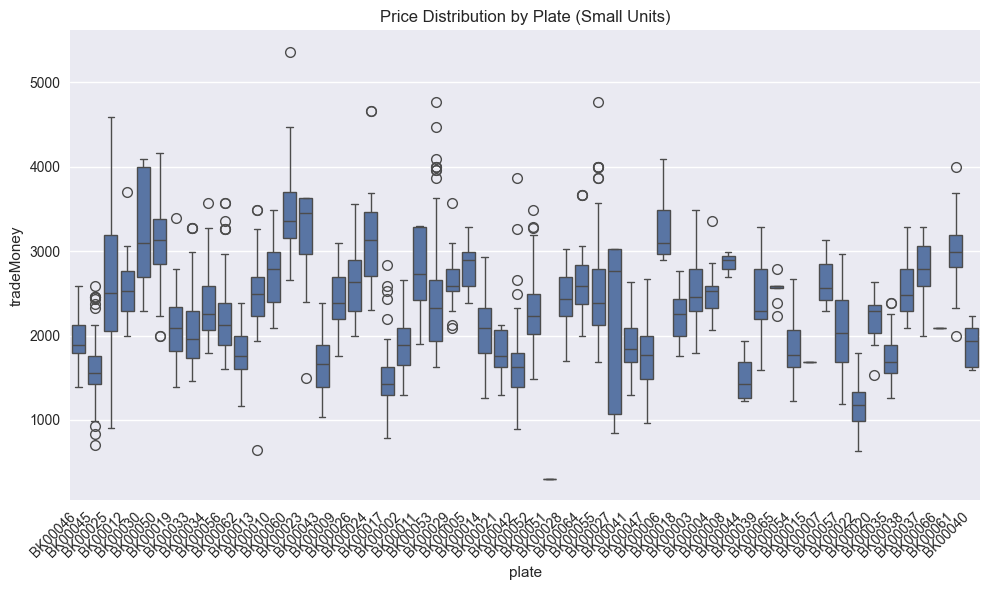


Floor Level Distribution:
houseFloor
High    36.1
Mid     32.6
Low     31.3
Name: proportion, dtype: float64

Average Total Floors by Plate:
plate
BK00030    22.250000
BK00042    21.010582
BK00024    17.529412
BK00044    16.000000
BK00050    15.983051
Name: totalFloor, dtype: float64


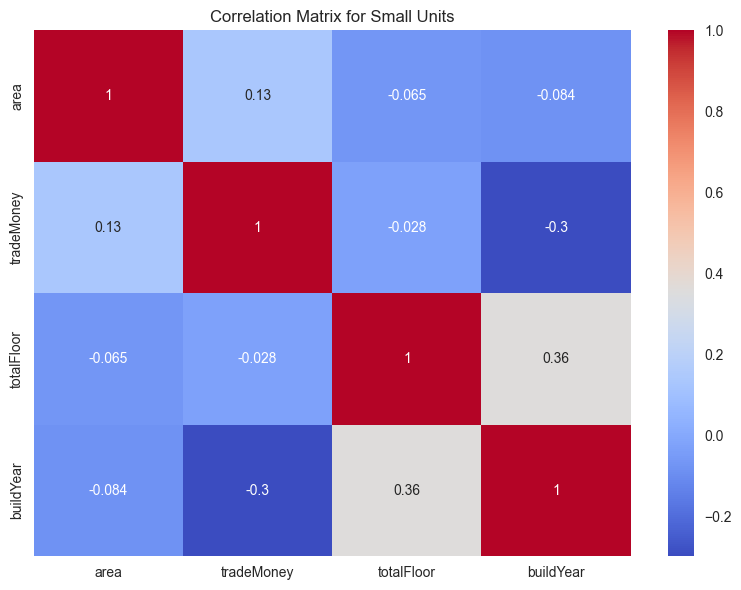

In [44]:
def analyze_small_area_patterns(df, threshold=20):
    # Create a subset of small area properties
    small_areas = df[df['area'] < threshold].copy()
    
    # 1. Temporal Analysis - Build Year Distribution
    plt.figure(figsize=(12, 6))
    plt.hist(small_areas['buildYear'], bins=30, color='steelblue', edgecolor='black')
    plt.title('Distribution of Build Years for Small Area Properties')
    plt.xlabel('Build Year')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

    # 2. Geographic Distribution
    plate_dist = pd.DataFrame({
        'Total_Units': df.groupby('plate').size(),
        'Small_Units': small_areas.groupby('plate').size()
    }).fillna(0)
    
    plate_dist['Percentage'] = (plate_dist['Small_Units'] / plate_dist['Total_Units'] * 100).round(2)
    plate_dist = plate_dist.sort_values('Percentage', ascending=False)
    
    print("\nTop 10 Plates with Highest Percentage of Small Units:")
    print(plate_dist.head(10))

    # 3. Property Characteristics
    print("\nProperty Type Distribution:")
    print(small_areas['rentType'].value_counts(normalize=True).round(3) * 100)
    
    print("\nDecoration Status:")
    print(small_areas['houseDecoration'].value_counts(normalize=True).round(3) * 100)
    
    # 4. Price Analysis
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='plate', y='tradeMoney', data=small_areas)
    plt.xticks(rotation=45, ha='right')
    plt.title('Price Distribution by Plate (Small Units)')
    plt.tight_layout()
    plt.show()

    # 5. Building Characteristics
    print("\nFloor Level Distribution:")
    print(small_areas['houseFloor'].value_counts(normalize=True).round(3) * 100)
    
    print("\nAverage Total Floors by Plate:")
    print(small_areas.groupby('plate')['totalFloor'].mean().sort_values(ascending=False).head())

    # 6. Correlation Analysis
    correlation_matrix = small_areas[['area', 'tradeMoney', 'totalFloor', 'buildYear']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix for Small Units')
    plt.tight_layout()
    plt.show()

# Call the function
analyze_small_area_patterns(df)

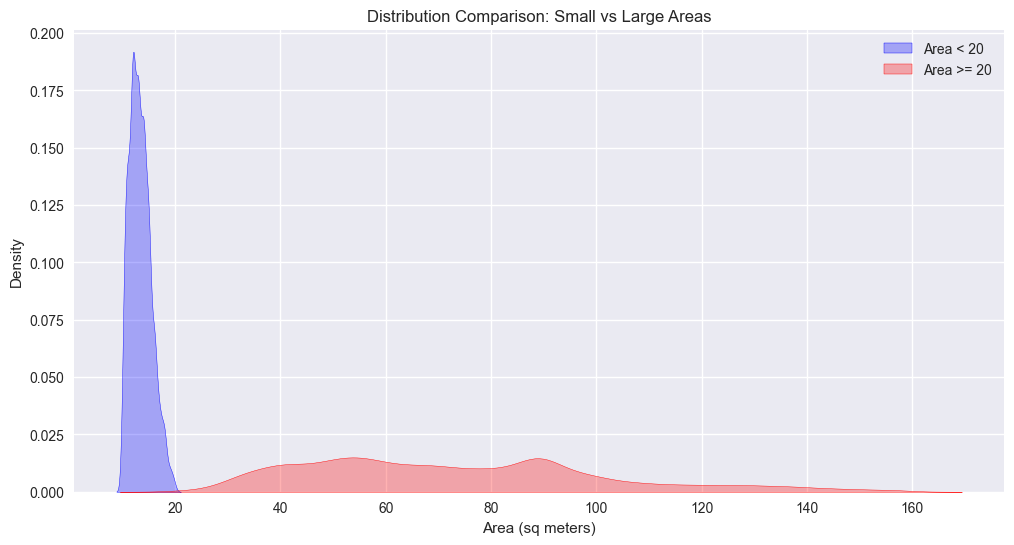

Statistical Comparison of Small vs Large Areas
--------------------------------------------------

Descriptive Statistics:
          Area < 20  Area >= 20
Count      3869.000   34885.000
Mean         13.330      73.172
Median       13.000      69.700
Std Dev       2.046      28.437
Skewness      0.600       0.620
Kurtosis     -0.086      -0.111

Normality Tests (Shapiro-Wilk):
------------------------------
Areas < 20:
Statistic: 0.9656
P-value: 0.0000
Normal distribution? No

Areas >= 20:
Statistic: 0.9628
P-value: 0.0000
Normal distribution? No

Key Characteristics Comparison:
------------------------------

Build Year Distribution:
           Area < 20  Area >= 20
buildYear                       
1993             NaN      1575.0
1994             NaN      2684.0
2004           235.0         NaN
2005           223.0         NaN
2006           259.0      1778.0
2007           307.0         NaN
2008             NaN      1842.0
2010           207.0      1915.0

Price Statistics:
        

c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 34885.
  res = hypotest_fun_out(*samples, **kwds)


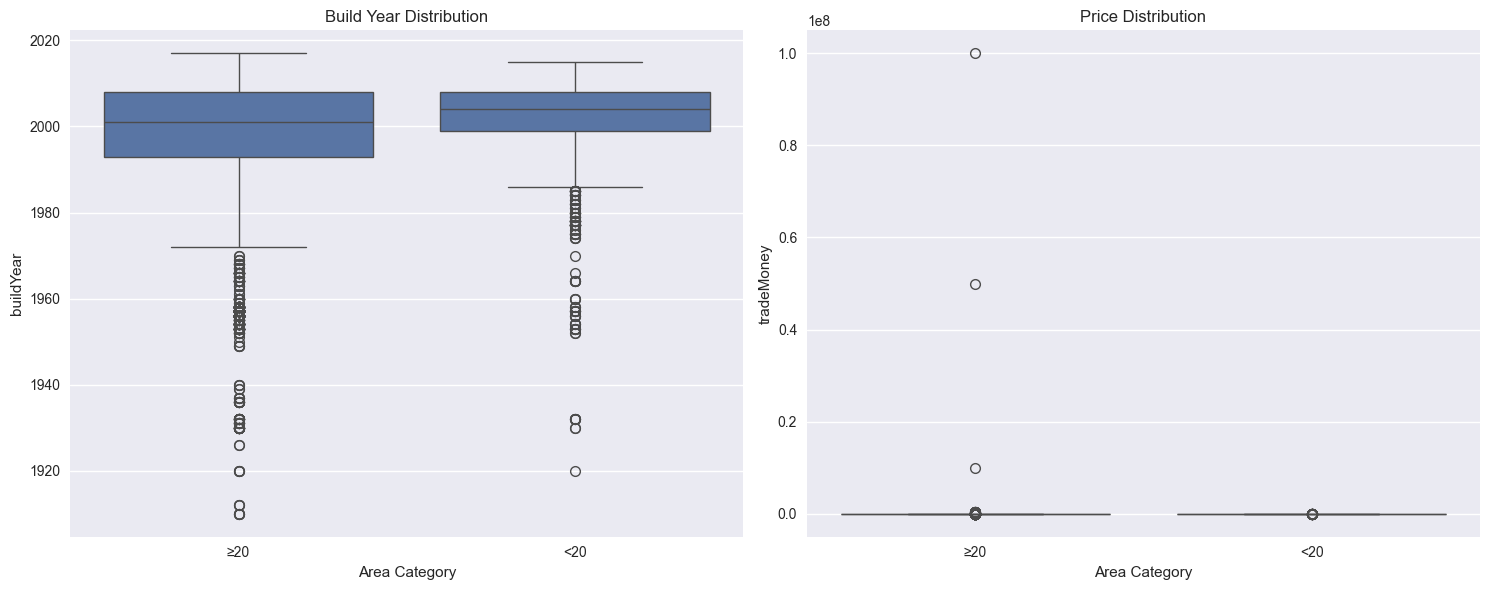

In [45]:
def compare_area_distributions(df, threshold=20):
    # Split data into two groups
    df_small = df[df['area'] < threshold]
    df_large = df[df['area'] >= threshold]
    
    plt.figure(figsize=(12, 6))

    # Plot KDE for both distributions
    sns.kdeplot(data=df_small['area'], color="blue", 
                label=f"Area < {threshold}", fill=True, alpha=0.3)
    sns.kdeplot(data=df_large['area'], color="red", 
                label=f"Area >= {threshold}", fill=True, alpha=0.3)

    plt.title("Distribution Comparison: Small vs Large Areas")
    plt.xlabel("Area (sq meters)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    # Statistical Comparison
    print("Statistical Comparison of Small vs Large Areas")
    print("-" * 50)
    
    # Basic Statistics
    stats_comparison = pd.DataFrame({
        f'Area < {threshold}': [
            len(df_small),
            df_small['area'].mean(),
            df_small['area'].median(),
            df_small['area'].std(),
            df_small['area'].skew(),
            df_small['area'].kurtosis()
        ],
        f'Area >= {threshold}': [
            len(df_large),
            df_large['area'].mean(),
            df_large['area'].median(),
            df_large['area'].std(),
            df_large['area'].skew(),
            df_large['area'].kurtosis()
        ]
    }, index=['Count', 'Mean', 'Median', 'Std Dev', 'Skewness', 'Kurtosis'])
    
    print("\nDescriptive Statistics:")
    print(stats_comparison.round(3))

    # Normality Tests
    from scipy import stats
    
    print("\nNormality Tests (Shapiro-Wilk):")
    print("-" * 30)
    
    # Test for small areas
    stat_small, p_small = stats.shapiro(df_small['area'])
    print(f"Areas < {threshold}:")
    print(f"Statistic: {stat_small:.4f}")
    print(f"P-value: {p_small:.4f}")
    print(f"Normal distribution? {'Yes' if p_small > 0.05 else 'No'}")
    
    # Test for large areas
    stat_large, p_large = stats.shapiro(df_large['area'])
    print(f"\nAreas >= {threshold}:")
    print(f"Statistic: {stat_large:.4f}")
    print(f"P-value: {p_large:.4f}")
    print(f"Normal distribution? {'Yes' if p_large > 0.05 else 'No'}")

    # Compare other key characteristics
    print("\nKey Characteristics Comparison:")
    print("-" * 30)
    
    # Build Year comparison
    print("\nBuild Year Distribution:")
    year_stats = pd.DataFrame({
        f'Area < {threshold}': df_small['buildYear'].value_counts().head(),
        f'Area >= {threshold}': df_large['buildYear'].value_counts().head()
    })
    print(year_stats)
    
    # Price comparison
    print("\nPrice Statistics:")
    price_stats = pd.DataFrame({
        f'Area < {threshold}': [
            df_small['tradeMoney'].mean(),
            df_small['tradeMoney'].median(),
            df_small['tradeMoney'].std()
        ],
        f'Area >= {threshold}': [
            df_large['tradeMoney'].mean(),
            df_large['tradeMoney'].median(),
            df_large['tradeMoney'].std()
        ]
    }, index=['Mean Price', 'Median Price', 'Std Dev Price'])
    print(price_stats.round(2))

    # Mann-Whitney U test for price differences
    stat, p_value = stats.mannwhitneyu(df_small['tradeMoney'], 
                                      df_large['tradeMoney'],
                                      alternative='two-sided')
    print("\nMann-Whitney U test for price differences:")
    print(f"Statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significant difference? {'Yes' if p_value < 0.05 else 'No'}")

    # Visualization of key differences
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Build Year comparison
    sns.boxplot(x='area_category', y='buildYear', 
                data=df.assign(area_category=df['area'].map(lambda x: f'<{threshold}' if x < threshold else f'≥{threshold}')),
                ax=ax1)
    ax1.set_title('Build Year Distribution')
    ax1.set_xlabel('Area Category')
    
    # Price comparison
    sns.boxplot(x='area_category', y='tradeMoney',
                data=df.assign(area_category=df['area'].map(lambda x: f'<{threshold}' if x < threshold else f'≥{threshold}')),
                ax=ax2)
    ax2.set_title('Price Distribution')
    ax2.set_xlabel('Area Category')
    
    plt.tight_layout()
    plt.show()

# Call the function
compare_area_distributions(df)



Key Market Segments and Business Implications

1. Market Overview
Our analysis of the Chinese residential property market reveals two distinct segments with different business opportunities:
- Economy Segment: Compact units under 20 sq m (10% market share)
- Standard Segment: Conventional units 20+ sq m (90% market share)

2. Economy Segment Insights
Investment Opportunity:
- Highly standardized product (13.33 sq m average)
- Consistent pricing (RMB 2,109 average)
- Low risk profile due to standardization
- Clear target market: students and young professionals
- Proven development timeline (peak demand 2004-2010)

3. Standard Segment Insights  
Market Diversity:
- Flexible unit sizes (73.17 sq m average)
- Premium pricing potential (RMB 9,491 average)
- Multiple price points possible
- Diverse customer base
- Sustained development cycles (1993-2010)

4. Investment Recommendations
Economy Segment:
- Focus on high-volume, standardized developments
- Target university/business districts
- Maintain strict size/cost controls

Standard Segment:
- Diversify unit offerings
- Implement tiered pricing strategies
- Customize amenities per location

5. Risk Considerations
Economy Segment:
- Limited price flexibility
- Dependent on specific demographics
- Concentrated market risks

Standard Segment:
- Higher price volatility
- Complex market dynamics
- Greater development costs

Note: Statistical analysis using Mann-Whitney U test confirms significant price differences between segments 
(test statistic: 134,827,905.5, p-value < 0.0001), validating the distinct nature of these market segments.

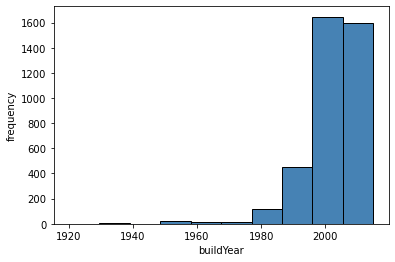

In [19]:
#look up the distribution of buildYear 
plt.hist(x = df_area20.buildYear,color = 'steelblue',edgecolor = 'black')
plt.xlabel('buildYear')
plt.ylabel('frequency')
plt.show()

In [20]:
'''we can see from the result the areas less than 20 conform norm distribution and most of houses whose area is less than 20 were built
 during 1995-2010'''

'we can see from the result the areas less than 20 conform norm distribution and most of houses whose area is less than 20 were built\n during 1995-2010'

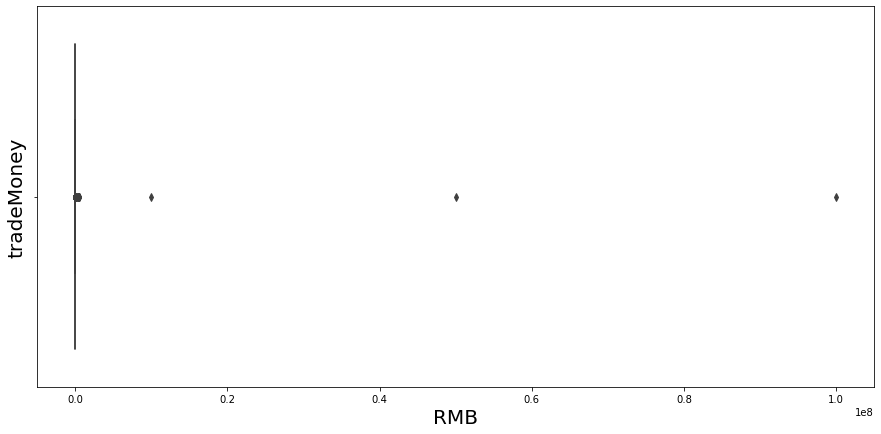

(38824, 52)

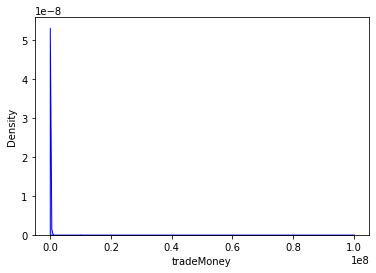

In [21]:
# look up the outlier of target attribute 'tradeMoney'
plt.figure(figsize=(15,7))
sns.boxplot('tradeMoney',data=df,orient='h')
plt.ylabel('tradeMoney',fontsize=20.0)
plt.xlabel('RMB',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['tradeMoney'], color="Blue", shade= True)
df.shape


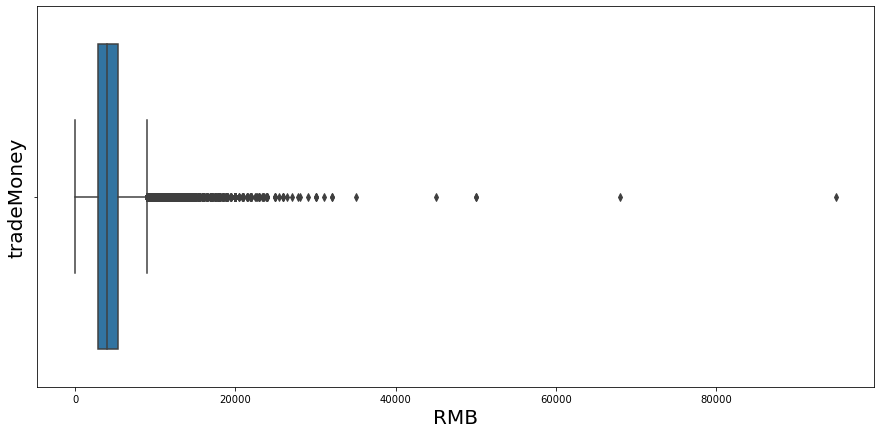

(38808, 52)

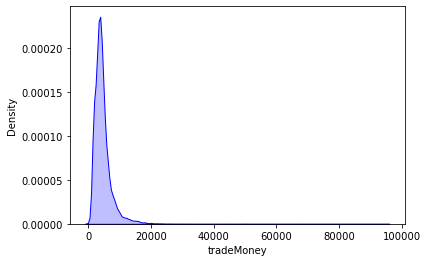

In [22]:
#we can see from the boxplot that there three very extreme values in trademoney ,
#so we need to adjust the dataset to remove this three values
df = df[df['tradeMoney']<=100000]
# look up the outlier of target attribute 'tradeMoney'
plt.figure(figsize=(15,7))
sns.boxplot('tradeMoney',data=df,orient='h')
plt.ylabel('tradeMoney',fontsize=20.0)
plt.xlabel('RMB',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['tradeMoney'], color="Blue", shade= True)
df.shape

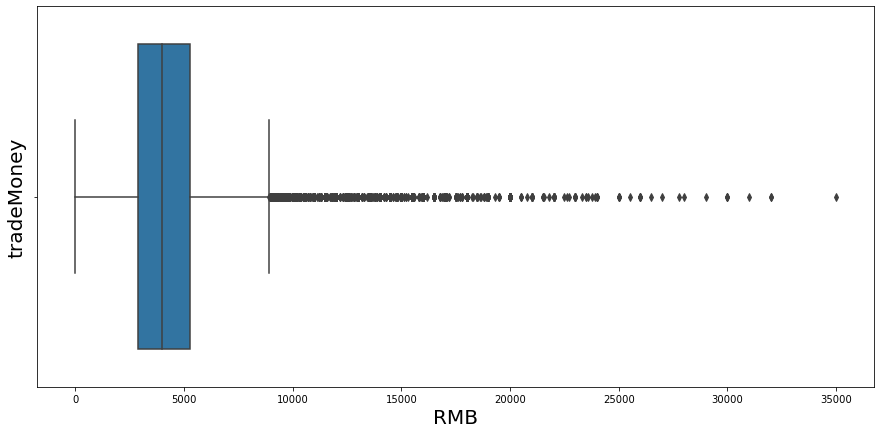

(38803, 52)

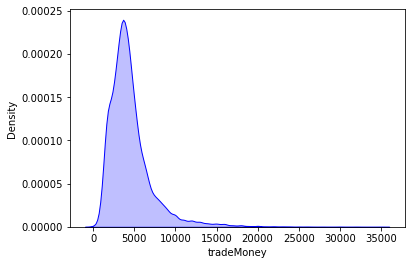

In [23]:
#we can see from the boxplot that there still a few very extreme values in trademoney ,
#so we need to adjust the dataset to remove these values
df = df[df['tradeMoney']<=35000]
# look up the outlier of target attribute 'tradeMoney'
plt.figure(figsize=(15,7))
sns.boxplot('tradeMoney',data=df,orient='h')
plt.ylabel('tradeMoney',fontsize=20.0)
plt.xlabel('RMB',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['tradeMoney'], color="Blue", shade= True)
df.shape

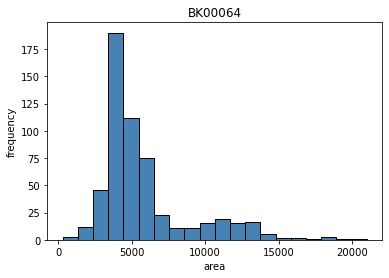

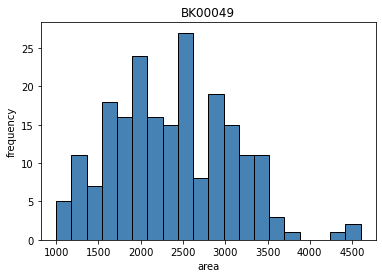

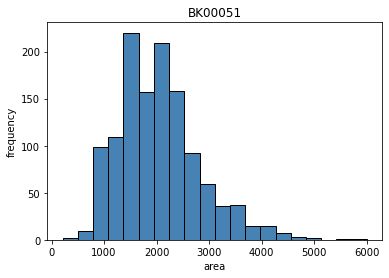

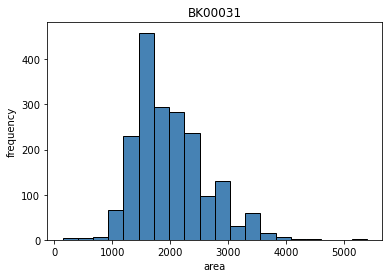

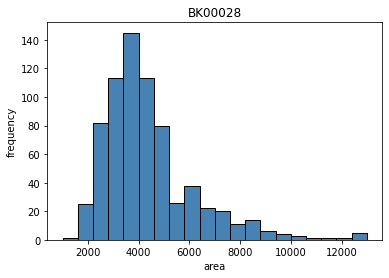

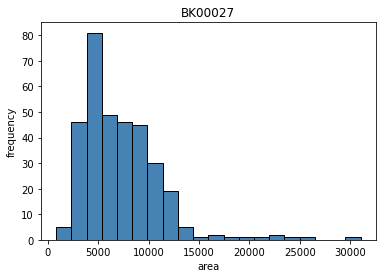

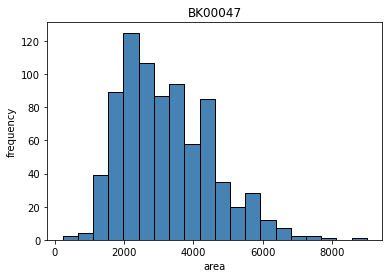

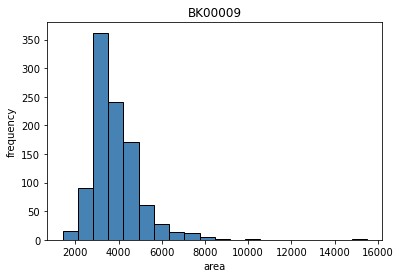

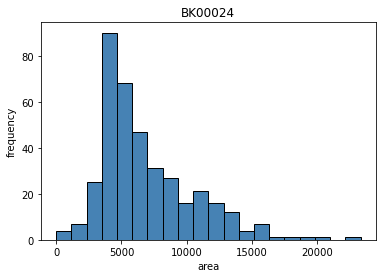

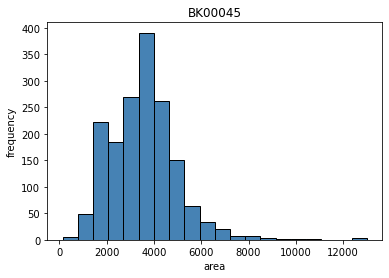

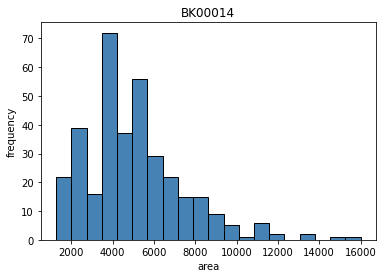

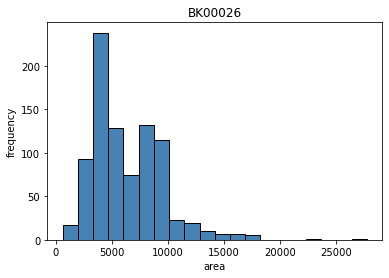

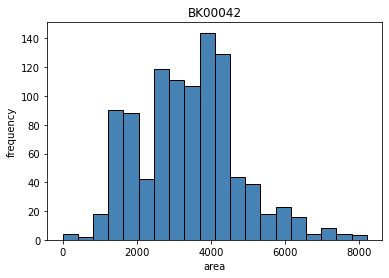

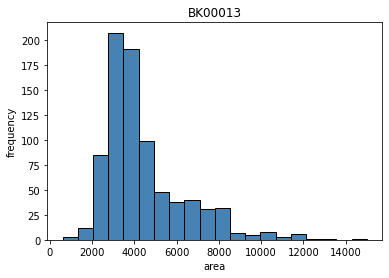

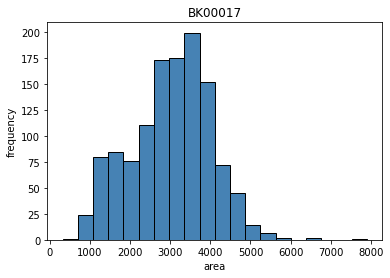

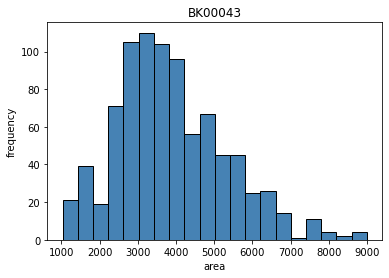

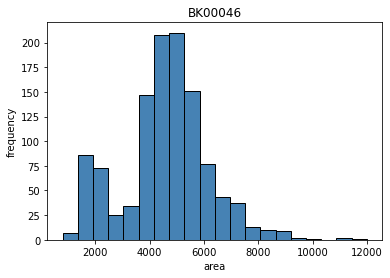

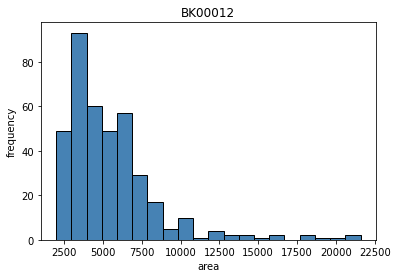

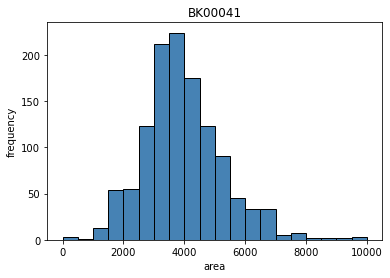

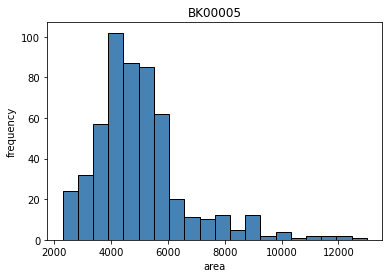

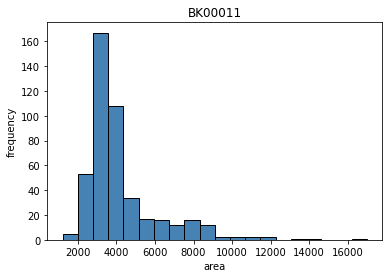

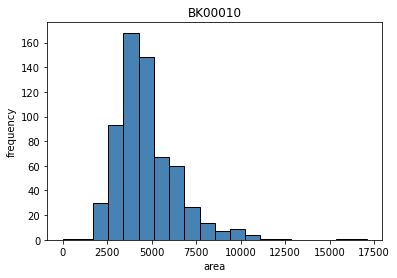

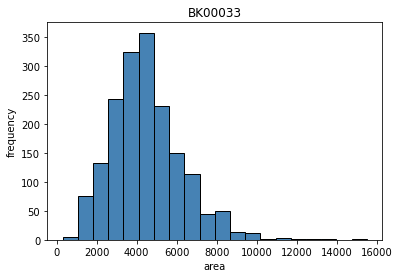

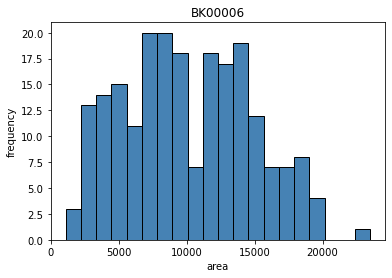

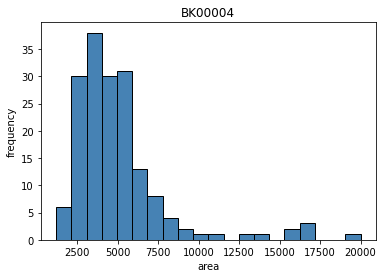

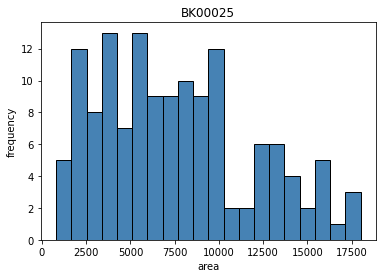

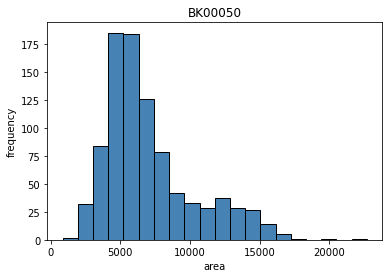

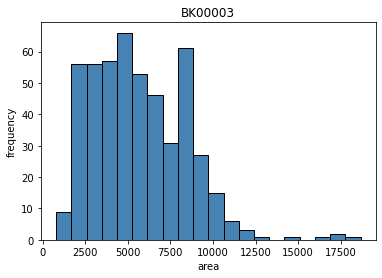

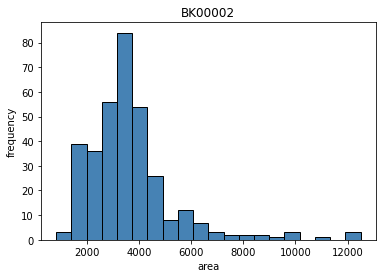

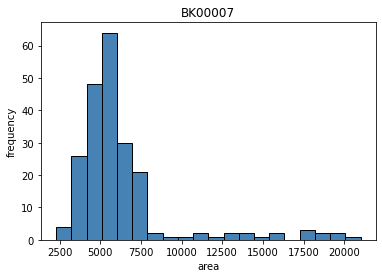

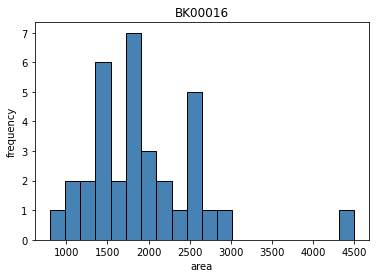

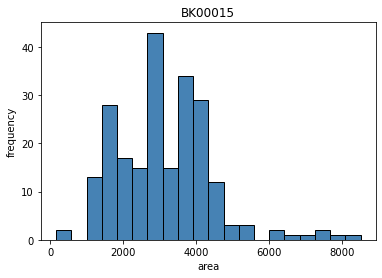

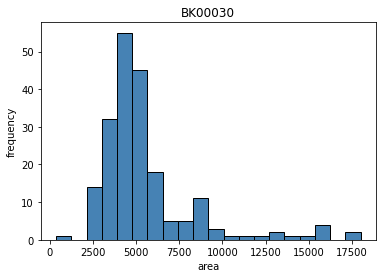

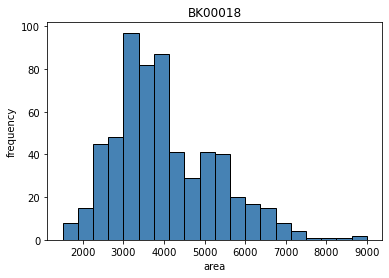

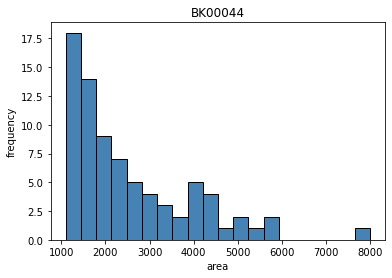

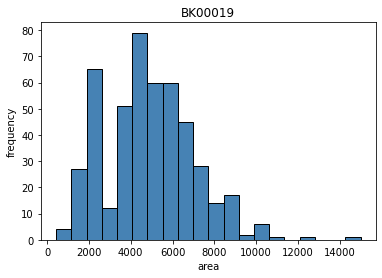

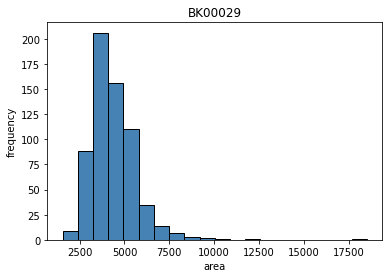

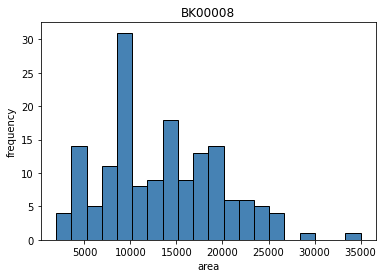

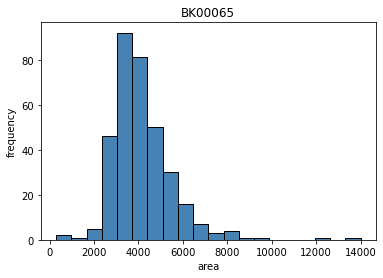

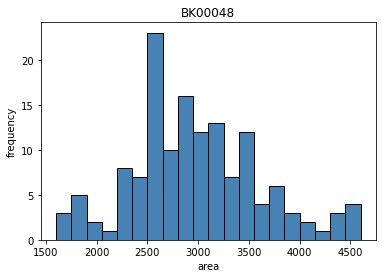

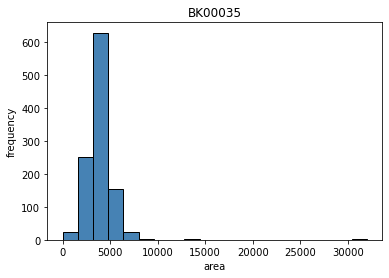

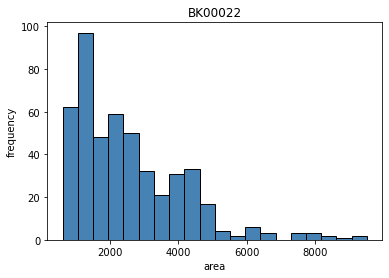

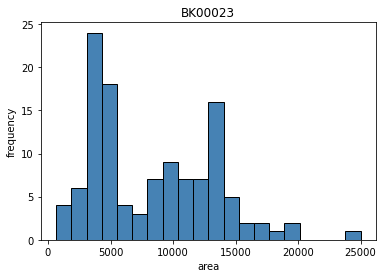

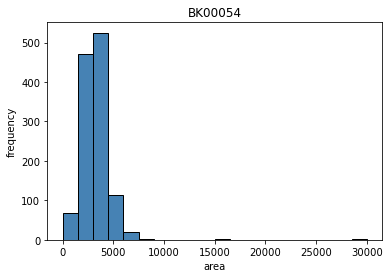

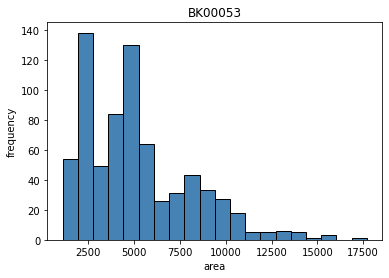

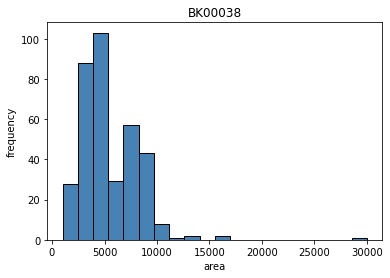

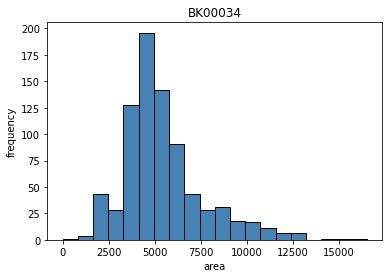

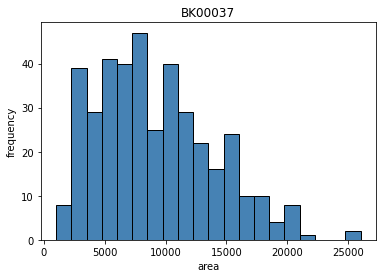

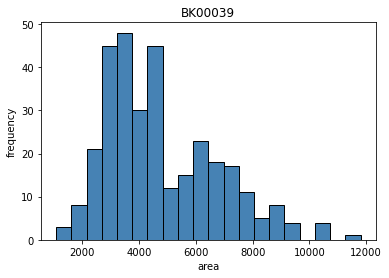

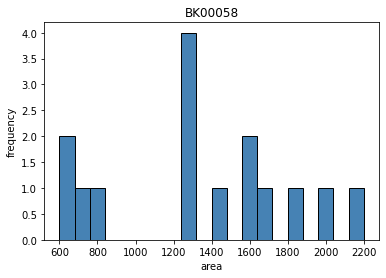

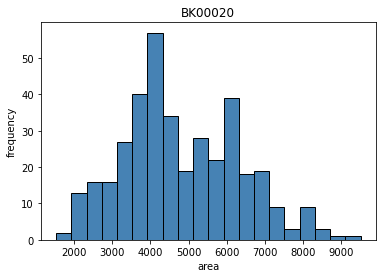

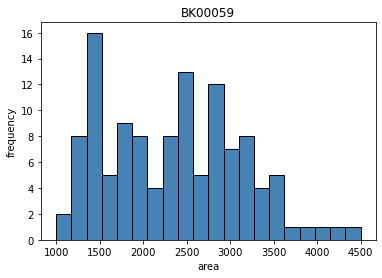

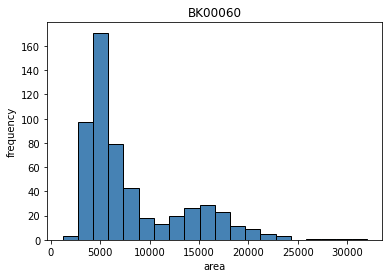

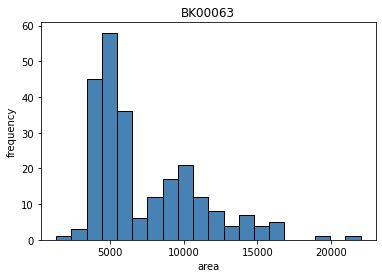

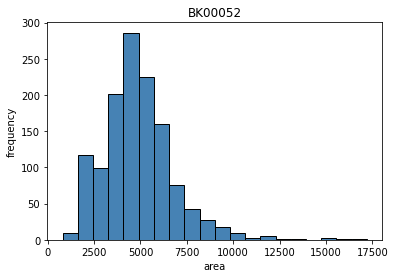

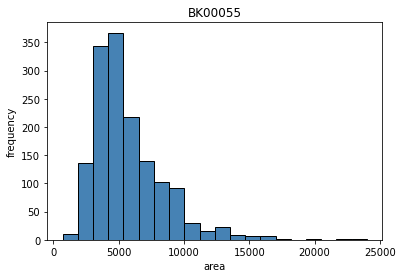

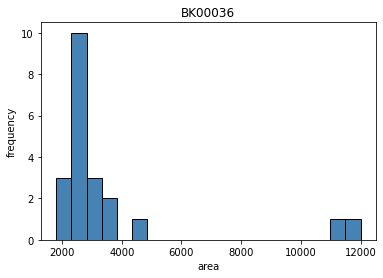

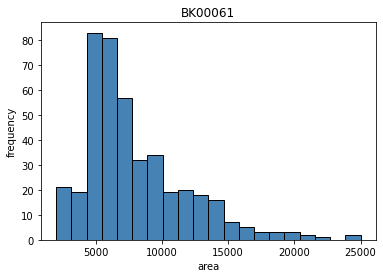

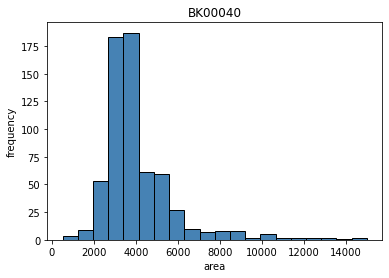

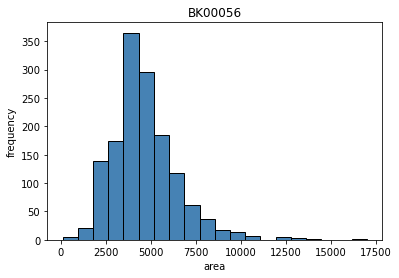

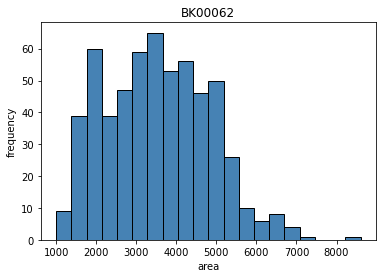

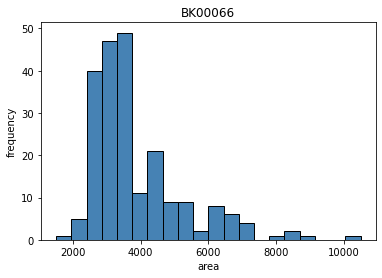

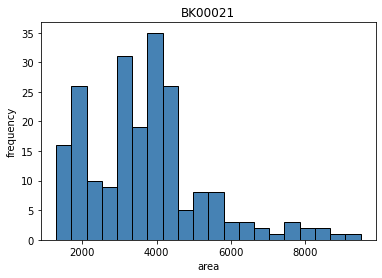

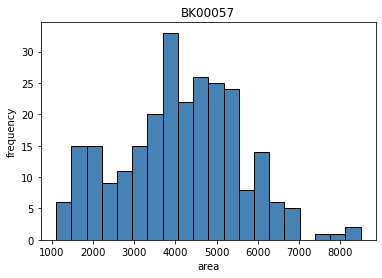

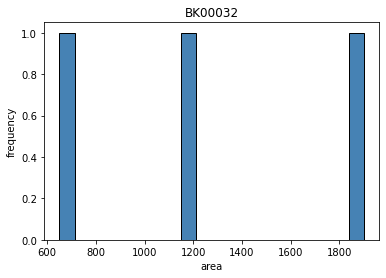

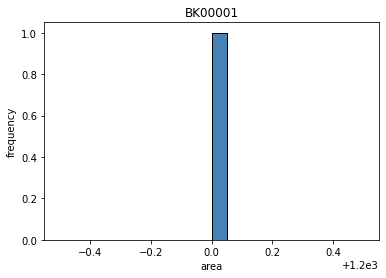

In [24]:
# look up the distribution of trade money in different plates.
for i in df['plate'].unique():
    temp_plate = df[df['plate']==i]
    plt.hist(x = temp_plate.tradeMoney,bins=20,color = 'steelblue',edgecolor = 'black')
    plt.xlabel('area')
    plt.ylabel('frequency')
    plt.title(i)
    plt.show()

In [25]:
# check whether each value of "communityName"  corresponds only one value of "plate"
df_check = df[['communityName','plate']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==len(list(df['communityName'].unique())):
    print('each value of "communityName"  corresponds only one value of "plate"')
else:
    print('each value of "communityName"  does not correspond only one value of "plate"')

each value of "communityName"  corresponds only one value of "plate"


In [26]:
# check whether each value of "plate"  corresponds only one value of "region"
df_check = df[['region','plate']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==len(list(df['plate'].unique())):
    print('each value of "plate"  corresponds only one value of "region"')
else:
    print('each value of "plate"  does not correspond only one value of "region"')

each value of "plate"  corresponds only one value of "region"


In [27]:
#check whether each value of "plate"  corresponds only one series of value in attributes which describe neighbor facilitiy number
df_check = df[['plate','subwayStationNum', 'busStationNum', 'interSchoolNum','schoolNum', 'privateSchoolNum',
               'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum','shopNum','parkNum', 'mallNum', 'superMarketNum']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==len(list(df['plate'].unique())):
    print('each value of "plate"  corresponds only one series of value describing neighbor facilitiy number')
else:
    print('each value of "plate"  does not correspond only one series of value describing neighbor facilitiy number')

each value of "plate"  corresponds only one series of value describing neighbor facilitiy number


In [28]:
#check whether each value of "plate"  corresponds only one series of value in attributes which describe house trade in plate

df_check = df[['plate', 'saleSecHouseNum','totalTradeMoney', 'totalTradeArea',
        'tradeMeanPrice','tradeSecNum', 'totalNewTradeMoney', 'totalNewTradeArea',
       'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum', 'supplyNewNum',
       'supplyLandNum', 'supplyLandArea', 'tradeLandNum', 'tradeLandArea',
       'landTotalPrice', 'landMeanPrice', 'totalWorkers', 'newWorkers',
       'residentPopulation', 'pv', 'uv', 'lookNum']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==len(list(df['plate'].unique())):
    print('each value of "plate"  corresponds only one series of value describing house trade')
else:
    print('each value of "plate"  does not correspond only one series of value describing house trade')


each value of "plate"  does not correspond only one series of value describing house trade


In [29]:
#according to the official attribute description ,we decide to add a column "tradeMonth" to the dataset which extracted the month from "tradeTime"
df['tradeMonth'] = df['tradeTime'].map(lambda x: str(x).split('/')[1])
##check whether each value of "plate" and "tradeMonth" corresponds only one series of value in attributes which describe house trade in plate per month
df_check = df[['plate','tradeMonth','saleSecHouseNum','totalTradeMoney', 'totalTradeArea',
        'tradeMeanPrice','tradeSecNum', 'totalNewTradeMoney', 'totalNewTradeArea',
       'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum', 'supplyNewNum',
       'supplyLandNum', 'supplyLandArea', 'tradeLandNum', 'tradeLandArea',
       'landTotalPrice', 'landMeanPrice', 'totalWorkers', 'newWorkers',
       'residentPopulation', 'pv', 'uv', 'lookNum']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==df_check[['tradeMonth','plate']].drop_duplicates().shape[0]:
    print('each value of "plate" and "tradeMonth" corresponds only one series of value describing house trade')
else:
    print('each value of "plate" and "tradeMonth" does not correspond only one series of value describing house trade')


each value of "plate" and "tradeMonth" does not correspond only one series of value describing house trade


In [30]:
#the output said each value of "plate"  does not correspond only one series of value describing house trade in plate,
#so we decided to look up the relationoship between these attributes.
#randomly choose one plate "BK00046" to look up 
temp_plate_check = df_check[df_check['plate']=='BK00046']
for i in temp_plate_check['tradeMonth'].unique():
    temp_month = temp_plate_check[temp_plate_check['tradeMonth']==i]
    print(temp_month)

         plate tradeMonth  saleSecHouseNum  totalTradeMoney  totalTradeArea  \
110    BK00046          5              0.0      534550000.0        16977.76   
1695   BK00046          5              0.0      534550000.0        16977.76   
1708   BK00046          5              0.0      534550000.0        16977.76   
1742   BK00046          5              0.0      534550000.0        16977.76   
1807   BK00046          5              0.0      534550000.0        16977.76   
1822   BK00046          5              0.0      534550000.0        16977.76   
7550   BK00046          5              0.0      534550000.0        16977.76   
35876  BK00046          5              0.0      534550000.0        16977.76   

       tradeMeanPrice  tradeSecNum  totalNewTradeMoney  totalNewTradeArea  \
110       31485.30784        198.0        1.209480e+09            28215.0   
1695      31485.30784        198.0        1.209480e+09            28215.0   
1708      31485.30784        198.0        1.209480e+09   

         plate tradeMonth  saleSecHouseNum  totalTradeMoney  totalTradeArea  \
124    BK00046          2              0.0      259850000.0         7762.97   
151    BK00046          2              0.0      259850000.0         7762.97   
198    BK00046          2              0.0      259850000.0         7762.97   
7010   BK00046          2              0.0      259850000.0         7762.97   
7335   BK00046          2              0.0      259850000.0         7762.97   
7336   BK00046          2              0.0      259850000.0         7762.97   
7486   BK00046          2              0.0      259850000.0         7762.97   
7707   BK00046          2              0.0      259850000.0         7762.97   
9724   BK00046          2              0.0      259850000.0         7762.97   
10228  BK00046          2              0.0      259850000.0         7762.97   
11267  BK00046          2              0.0      259850000.0         7762.97   
36454  BK00046          2              0.0      2598

         plate tradeMonth  saleSecHouseNum  totalTradeMoney  totalTradeArea  \
1182   BK00046          9             10.0      560700000.0        16001.07   
1200   BK00046          9             14.0      560700000.0        16001.07   
1731   BK00046          9              6.0      560700000.0        16001.07   
1825   BK00046          9             26.0      560700000.0        16001.07   
1870   BK00046          9             12.0      560700000.0        16001.07   
1983   BK00046          9              6.0      560700000.0        16001.07   
2040   BK00046          9             10.0      560700000.0        16001.07   
2126   BK00046          9              7.0      560700000.0        16001.07   
2145   BK00046          9             26.0      560700000.0        16001.07   
2216   BK00046          9              5.0      560700000.0        16001.07   
2254   BK00046          9              6.0      560700000.0        16001.07   
6941   BK00046          9             10.0      5607

        plate tradeMonth  saleSecHouseNum  totalTradeMoney  totalTradeArea  \
7320  BK00046          1              0.0      450850000.0        14289.65   
7325  BK00046          1              0.0      450850000.0        14289.65   
7329  BK00046          1              0.0      450850000.0        14289.65   
7330  BK00046          1              0.0      450850000.0        14289.65   
7475  BK00046          1              0.0      450850000.0        14289.65   
8838  BK00046          1              0.0      450850000.0        14289.65   

      tradeMeanPrice  tradeSecNum  totalNewTradeMoney  totalNewTradeArea  \
7320     31550.80775        153.0          39141949.0              698.0   
7325     31550.80775        153.0          39141949.0              698.0   
7329     31550.80775        153.0          39141949.0              698.0   
7330     31550.80775        153.0          39141949.0              698.0   
7475     31550.80775        153.0          39141949.0              698.0 

In [31]:
#according to the outputs we delete the ['saleSecHouseNum''uv','pv','lookNum'] to continue checking the responding relation
df_check = df[['plate','tradeMonth','totalTradeMoney', 'totalTradeArea',
        'tradeMeanPrice','tradeSecNum', 'totalNewTradeMoney', 'totalNewTradeArea',
       'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum', 'supplyNewNum',
       'supplyLandNum', 'supplyLandArea', 'tradeLandNum', 'tradeLandArea',
       'landTotalPrice', 'landMeanPrice', 'totalWorkers', 'newWorkers',
       'residentPopulation']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==df_check[['tradeMonth','plate']].drop_duplicates().shape[0]:
    print('each value of "plate" and "tradeMonth" corresponds only one series of value describing house trade')
else:
    print('each value of "plate" and "tradeMonth" does not correspond only one series of value describing house trade')


each value of "plate" and "tradeMonth" does not correspond only one series of value describing house trade


In [32]:
#according to the output we can see only 6 examples are different in same plate and month which can be ignored in more than 40000 examples
print(df_check.shape[0],df_check[['tradeMonth','plate']].drop_duplicates().shape[0])

762 756


In [33]:
#'pv' 'uv' 'lookNum' has a seriously different from attribute description ,so we decided to delete them.
df.drop(['pv','uv','lookNum'],axis=1,inplace=True)

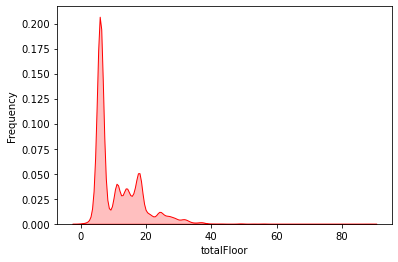

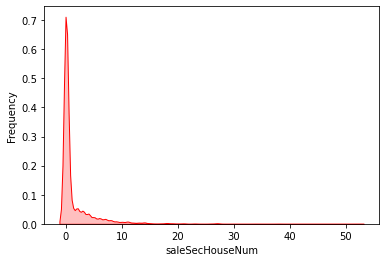

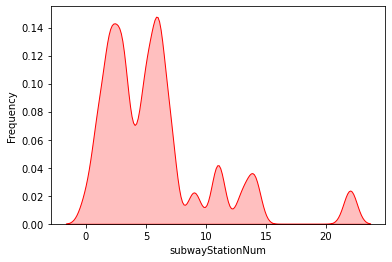

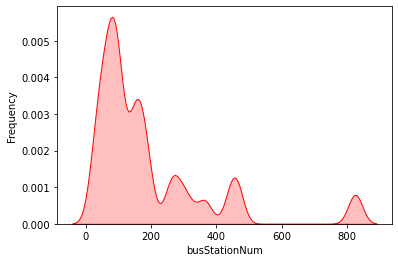

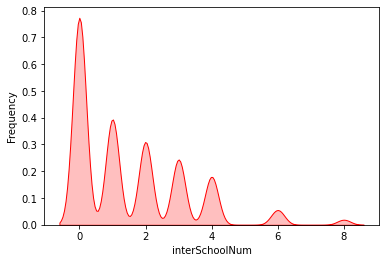

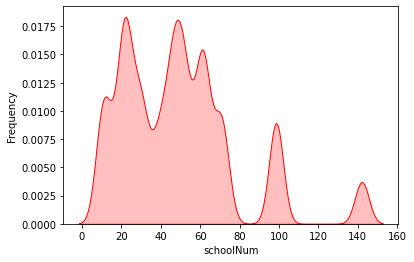

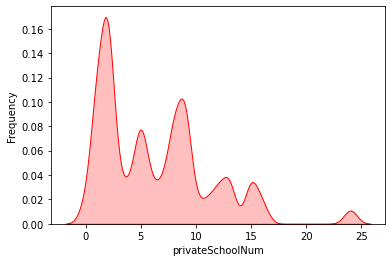

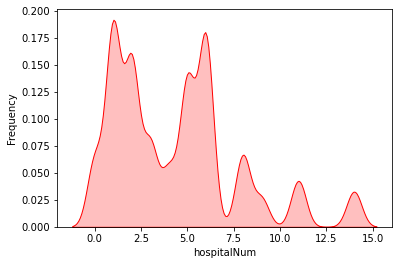

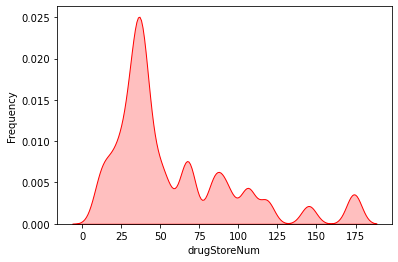

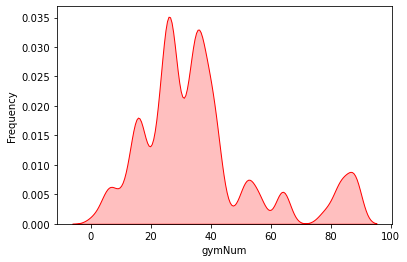

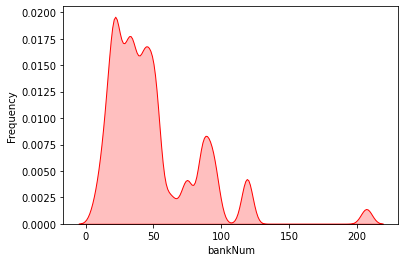

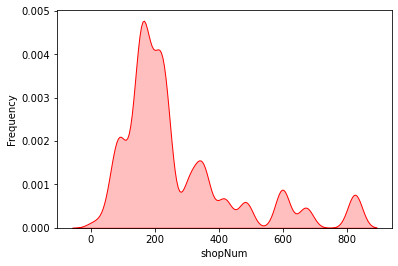

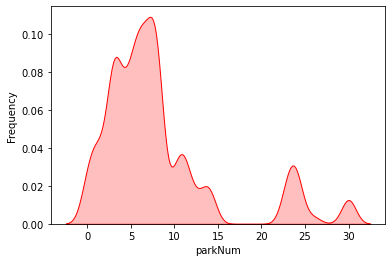

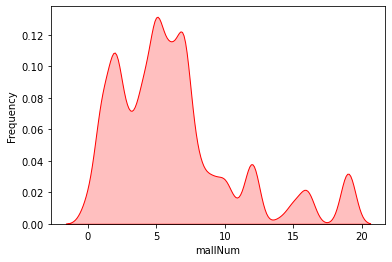

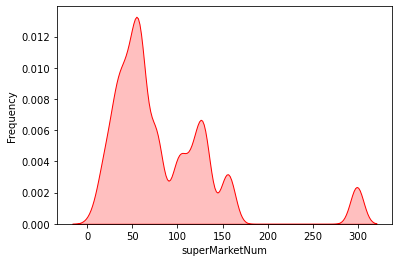

In [34]:
# those columns with Continuous values 
columns = ['area','totalFloor', 'saleSecHouseNum', 'subwayStationNum', 'busStationNum', 'interSchoolNum',
           'schoolNum', 'privateSchoolNum', 'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum', 'shopNum','parkNum',
           'mallNum', 'superMarketNum','lookNum']
# look up the distribution of Continuous variable 
features = [i for i in columns if i not in ['area','tradeMoney', 'lookNum']]
for column in features:
    g = sns.kdeplot(df[column], color="Red", shade = True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    plt.show()

In [35]:
#according to the distributon ,clean the outliers as below:
df = df[(df['tradeMoney']<=35000)&(df['tradeMoney']>500)]
df = df[df['totalFloor']<=40]

In [36]:
'''Some of the columns contain String values which might not be compatible to certain machine 
learning algorithms that will be implemented in the subsequent sections. 
Therefore, we need to transform the data into labels encoded by numeric values (i.e., 0, 1, 2, ...).'''

# the type of 'houseDecoration' is orderial, so replaced the values with (0,1,2,3)
def process_houseDecoration_nodiv(df_process):
    for index, row in df_process.iterrows():
        decoration_str = row['houseDecoration']
        if decoration_str == 'Fine':
            decoration_num = 3
        elif decoration_str == 'Simple':
            decoration_num = 2
        elif decoration_str == 'Undecorated':
            decoration_num = 1
        else:
            decoration_num = 0
        df_process.loc[index, 'houseDecoration'] = decoration_num
    return df_process

# the type of 'houseFloor' is orderial, so replaced the values with (1,2,3)
def houseFloor2number(df_process):
    for index, row in df_process.iterrows():
        houseFloor_str = row['houseFloor']
        if houseFloor_str == 'Low':
            houseFloor_num = 1
        elif houseFloor_str == 'Mid':
            houseFloor_num = 2
        else:
            houseFloor_num = 3
        df_process.loc[index, 'houseFloor'] = houseFloor_num
    return df_process

df = process_houseDecoration_nodiv(df)
df = houseFloor2number(df)
            

In [37]:
#for those attributes describing the plate condition such as subwayStationNum', 'busStationNum, we will use pca to reduce the dimension.
df = df.reset_index()
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
# combine subwayStationNum', 'busStationNum as traffic
cols = ['subwayStationNum', 'busStationNum']
traffic = pca.fit_transform(df[cols])
t_pd = pd.DataFrame(data=traffic, columns=['traffic'])
df = pd.concat([df,t_pd],axis=1)
# combine 'interSchoolNum','schoolNum', 'privateSchoolNum' as education
cols = ['interSchoolNum','schoolNum', 'privateSchoolNum' ]
traffic = pca.fit_transform(df[cols])
t_pd = pd.DataFrame(data=traffic, columns=['education'])
df = pd.concat([df,t_pd],axis=1)
# combine  'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum','shopNum','parkNum', 'mallNum', 'superMarketNum'as daily life
cols = [ 'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum','shopNum','parkNum', 'mallNum', 'superMarketNum' ]
traffic = pca.fit_transform(df[cols])
t_pd = pd.DataFrame(data=traffic, columns=['daily_life'])
df = pd.concat([df,t_pd],axis=1)
# drop these attributes and  other catagorical attribute which has too much dimensions.
df.drop(['plate','subwayStationNum', 'busStationNum', 'interSchoolNum','schoolNum', 'privateSchoolNum',
        'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum','shopNum','parkNum', 'mallNum', 'superMarketNum',
         'communityName','index','ID'],axis=1,inplace=True)

# drop some original features because some features can represent them ,for example ,tradeMeanPrice can represent both totalTradeMoney, totalTradeArea
df.drop(['totalTradeMoney', 'totalTradeArea', 'totalNewTradeMoney', 'totalNewTradeArea'],axis=1,inplace=True)

In [38]:
df.head()

area rentType houseFloor  totalFloor houseToward houseDecoration  \
0   68.06  Unknown          1        16.0          SW               0   
1  125.55  Unknown          2        14.0          SW               2   
2   78.94  Unknown          2        18.0          SW               0   
3   76.00  Unknown          2         5.0          SW               0   
4  120.55  Unknown          2         6.0          SW               0   

    region  buildYear  saleSecHouseNum  tradeMeanPrice  ...  \
0  RG00001       1953              0.0     47974.22551  ...   
1  RG00002       2007              0.0     40706.66775  ...   
2  RG00002       2014              6.0     20106.77761  ...   
3  RG00006       1997              0.0     22759.44425  ...   
4  RG00006       2007              0.0     22759.44425  ...   

   residentPopulation   tradeTime  tradeMoney  bedroom  livingroom  bathroom  \
0            111546.0  2018/11/28      2000.0        2           1         1   
1            157552.0  2018/12/16      2000.0        3           2         2   
2            253337.0  2018/11/18      1000.0        2           2         1   
3            371900.0   2018/3/24      1800.0        2           1         1   
4            371900.0   2018/3/19      1450.0        3           2         1   

   tradeMonth     traffic  education  daily_life  
0          11 -151.372723 -20.912302 -213.330569  
1          12   -3.407969 -22.981462 -122.097436  
2          11  176.594739  11.012939   97.763036  
3           3  273.612039  22.297058  327.232237  
4           3  273.612039  22.297058  327.232237  

[5 rows x 33 columns]

In [39]:
df.info

<bound method DataFrame.info of          area rentType houseFloor  totalFloor houseToward houseDecoration  \
0       68.06  Unknown          1        16.0          SW               0   
1      125.55  Unknown          2        14.0          SW               2   
2       78.94  Unknown          2        18.0          SW               0   
3       76.00  Unknown          2         5.0          SW               0   
4      120.55  Unknown          2         6.0          SW               0   
...       ...      ...        ...         ...         ...             ...   
38702   13.00    Whole          1         3.0           N               3   
38703   11.30   Shared          2        18.0           N               3   
38704   40.00  Unknown          1         6.0           N               0   
38705   51.97    Whole          2        16.0           N               3   
38706   13.50  Unknown          1         2.0           N               0   

        region  buildYear  saleSecHouseNum 

In [40]:
#feature reduction
# renttype and house toward are extremely unbalanced so we just drop these two attributes
# df.drop(['rentType','houseToward'],axis=1,inplace=True)
#Feature Importance for numeric value
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df[['area', 'houseFloor', 'totalFloor', 'houseDecoration', 'buildYear', 'saleSecHouseNum',
       'tradeMeanPrice', 'tradeSecNum', 'tradeNewMeanPrice',
       'tradeNewNum', 'remainNewNum', 'supplyNewNum', 'supplyLandNum',
       'supplyLandArea', 'tradeLandNum', 'tradeLandArea', 'landTotalPrice',
       'landMeanPrice', 'totalWorkers', 'newWorkers', 'residentPopulation',
       'bedroom', 'livingroom', 'bathroom']]#independent columns

X_col = X.columns
y = df[ 'tradeMoney']    #target column i.e price range

# before R test we need to normamlize these attributes.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_col)

#use chi-squared (chi²) statistical test find the most important feature.
bestfeatures = SelectKBest(score_func=chi2, k=24)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(24,'Score').sort_values(ascending=False,by='Score'))


                 Specs         Score
3      houseDecoration  12578.932805
0                 area   2584.219367
21             bedroom   2086.138566
12       supplyLandNum    910.152807
18        totalWorkers    881.409999
2           totalFloor    693.237098
19          newWorkers    590.025135
13      supplyLandArea    532.808373
22          livingroom    513.625611
11        supplyNewNum    491.065066
9          tradeNewNum    471.891151
14        tradeLandNum    470.979205
16      landTotalPrice    466.940171
15       tradeLandArea    404.544629
8    tradeNewMeanPrice    392.694721
20  residentPopulation    385.254777
6       tradeMeanPrice    382.582858
10        remainNewNum    369.981941
17       landMeanPrice    332.699862
1           houseFloor    262.038893
7          tradeSecNum    213.630984
5      saleSecHouseNum    204.631342
23            bathroom    163.733075
4            buildYear     46.212741


In [41]:
#As the socre of each numerical attribute we delete last ten attributes
df.drop(['buildYear','bathroom','saleSecHouseNum','tradeSecNum','houseFloor','landMeanPrice','remainNewNum',
         'tradeMeanPrice','residentPopulation','tradeNewMeanPrice'],axis=1,inplace=True)

In [42]:
df.shape

(38707, 23)

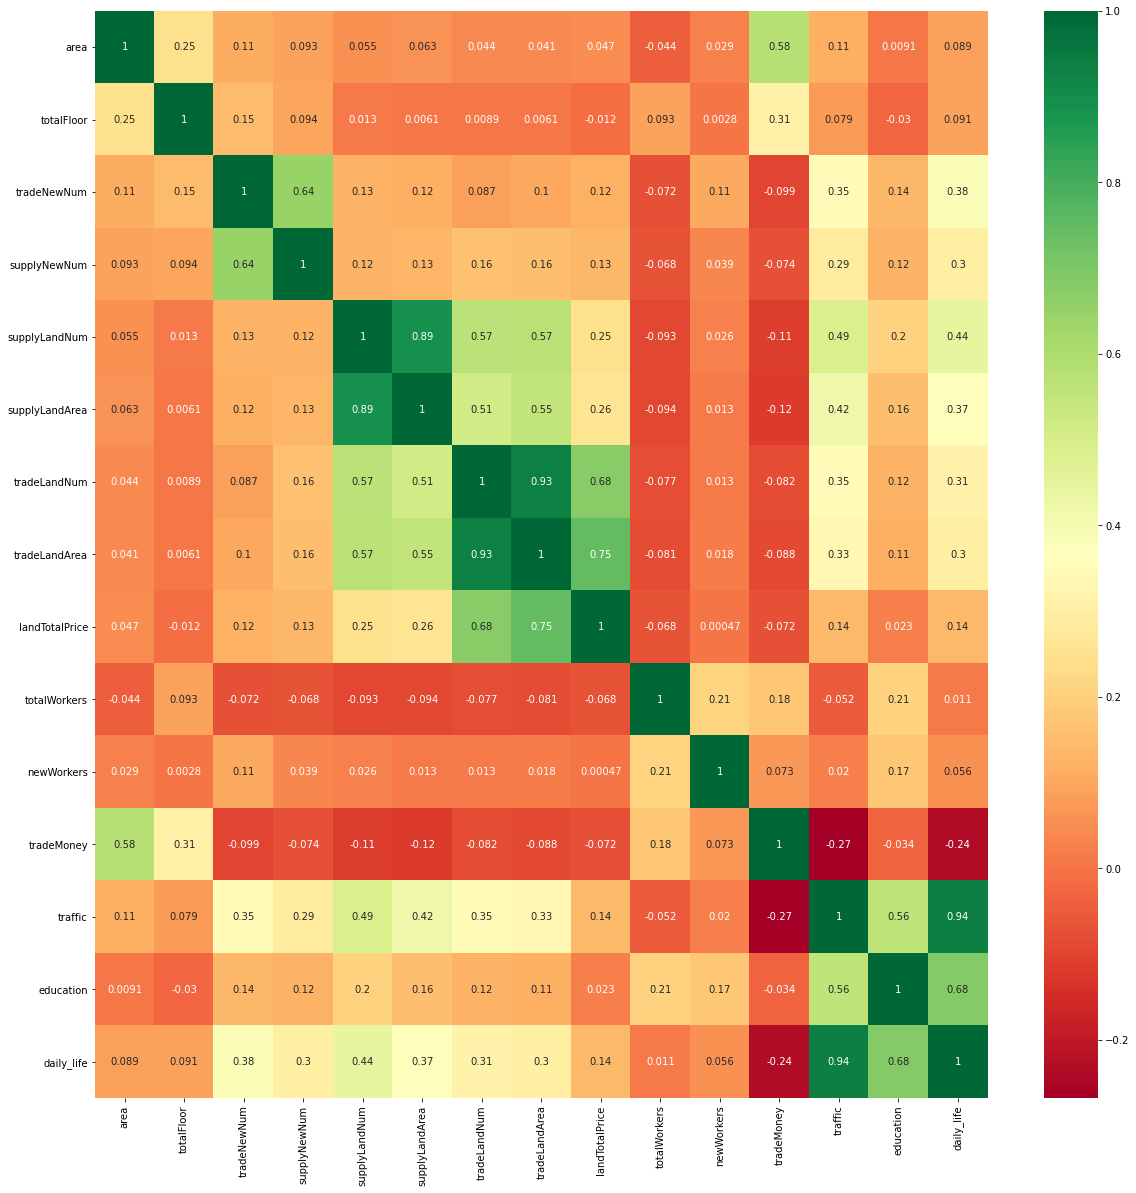

In [43]:
#Correlation Matrix with Heatmap
 #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [44]:
#delete some features get high correlation with the features which got higher score in R suqare test.
df.drop(['supplyLandArea','tradeLandArea'],axis=1,inplace=True)

# because daily life and traffic has a strong relationship, so use pca to combine them as convenience
cols = ['daily_life', 'traffic']
traffic = pca.fit_transform(df[cols])
t_pd = pd.DataFrame(data=traffic, columns=['convenience'])
df = pd.concat([df,t_pd],axis=1)
df.drop(['daily_life', 'traffic'],axis=1,inplace=True)

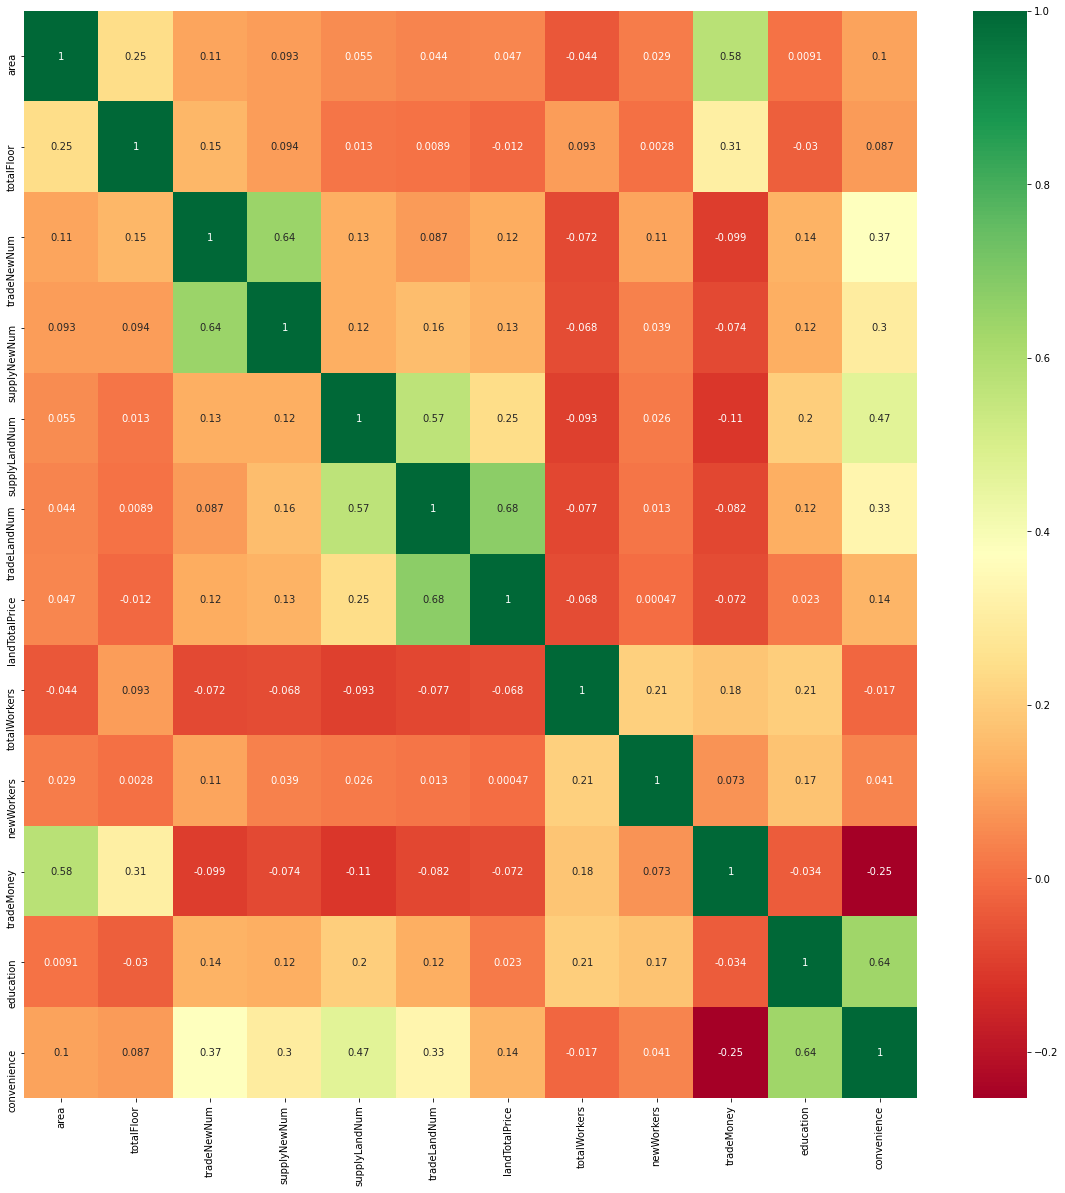

In [46]:
#Correlation Matrix with Heatmap
 #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [45]:
df.shape

(38707, 20)

## Data Modelling

In [219]:
#custom function for modelling and plotting
def Predictive_Model(estimator):
    estimator.fit(X_train, y_train)
    prediction = estimator.predict(X_test)
    print('R_squared:', metrics.r2_score(y_test, prediction))
    print('Square Root of MSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    plt.figure(figsize=(10,5))
    sns.distplot(y_test, hist=True, kde=False)
    sns.distplot(prediction, hist=True, kde=False)
    plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
    plt.title(str(estimator))
    plt.xlim(0,)


#### Linear Regression (OLS)

In [47]:
#training model - linear regression
from sklearn.model_selection import train_test_split
X = df[['area', 'rentType', 'totalFloor', 'houseToward', 'houseDecoration',
       'region', 'tradeNewNum', 'supplyNewNum', 'supplyLandNum',
       'tradeLandNum', 'landTotalPrice', 'totalWorkers', 'newWorkers',
       'bedroom', 'livingroom', 'education',
       'convenience']]
y = df[ 'tradeMoney']
#transform the categorical variable into Dummy Variables
for i in ['rentType', 'region','houseToward']:
    X_dum=pd.get_dummies(X[i],prefix=i)
    X.drop(i,axis=1,inplace=True)
    X = pd.concat([X,X_dum],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.linear_model import LinearRegression
reg_ls = LinearRegression()
reg_ls.fit(X_train, y_train)
print('R-squared:', reg_ls.score(X_train, y_train))
print('Estimated intercept coefficients: ', reg_ls.intercept_)
print('Number of coefficients: ', len(reg_ls.coef_))
print('Coefficients: ', reg_ls.coef_)


R-squared: 0.6013606469014849
Estimated intercept coefficients:  9.926894654683565
Number of coefficients:  41
Coefficients:  [ 4.86964159e+01  6.35060771e+01  1.10626392e+02  3.86514107e-01
 -6.66181306e-02  1.39778340e+02  8.30328005e+01 -4.59587213e-08
  2.73755068e-03  2.42612802e-03  1.02955878e+01  2.80790276e+02
  1.08865886e+01 -3.09232724e+00  7.44700256e+01 -6.39026122e+01
 -1.05674135e+01  6.08569239e+02 -1.23998000e+02 -3.57351322e+02
 -1.08839450e+03 -9.81260160e+01 -2.10216306e+03  3.60516863e+02
  1.05201121e+03  1.59887099e+03 -8.49673618e+02 -1.11705059e+03
  3.85829461e+02  2.48482335e+03  2.08178943e+02 -9.62042946e+02
  6.40752707e+01  1.72265950e+02  1.02268288e+02 -2.24912242e+01
 -3.46386052e+01  1.24549877e+02 -7.37166295e+01 -1.84765448e+02
 -1.47547478e+02]


In [48]:
#get coefficients of each feature
pd.DataFrame(np.array((X_train.columns, reg_ls.coef_)).T,columns=['features', 'estimatedCoefficients'])


features estimatedCoefficients
0               area               48.6964
1         totalFloor               63.5061
2    houseDecoration               110.626
3        tradeNewNum              0.386514
4       supplyNewNum            -0.0666181
5      supplyLandNum               139.778
6       tradeLandNum               83.0328
7     landTotalPrice          -4.59587e-08
8       totalWorkers            0.00273755
9         newWorkers            0.00242613
10           bedroom               10.2956
11        livingroom                280.79
12         education               10.8866
13       convenience              -3.09233
14   rentType_Shared                 74.47
15  rentType_Unknown              -63.9026
16    rentType_Whole              -10.5674
17    region_RG00001               608.569
18    region_RG00002              -123.998
19    region_RG00003              -357.351
20    region_RG00004              -1088.39
21    region_RG00005               -98.126
22    region_RG00006              -2102.16
23    region_RG00007               360.517
24    region_RG00008               1052.01
25    region_RG00009               1598.87
26    region_RG00010              -849.674
27    region_RG00011              -1117.05
28    region_RG00012               385.829
29    region_RG00013               2484.82
30    region_RG00014               208.179
31    region_RG00015              -962.043
32     houseToward_E               64.0753
33    houseToward_EW               172.266
34     houseToward_N               102.268
35    houseToward_NW              -22.4912
36     houseToward_S              -34.6386
37    houseToward_SE                124.55
38    houseToward_SN              -73.7166
39    houseToward_SW              -184.765
40     houseToward_W              -147.547

R_squared: 0.6111783533170183
Square Root of MSE: 1692.5913940088903


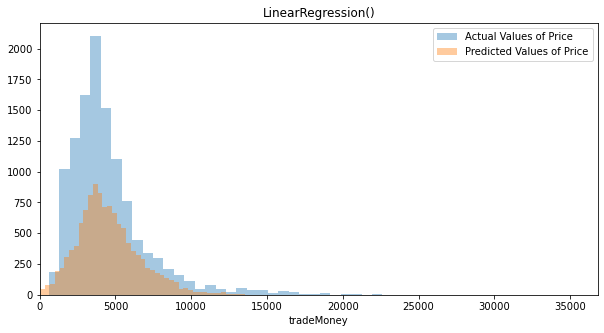

In [221]:
reg_ls = LinearRegression()
Predictive_Model(reg_ls)

In [49]:
# Collect the coefficients
df_ols_coef = pd.DataFrame(reg_ls.coef_, index=X_train.columns, columns=['Coefficients'])
df_ols_coef['Coef_abs'] = df_ols_coef.Coefficients.abs()

mean_absolute_error: 1131.5905687620993
mean_squared_error: 2864865.6270729587
r2_score 0.6111783533170183


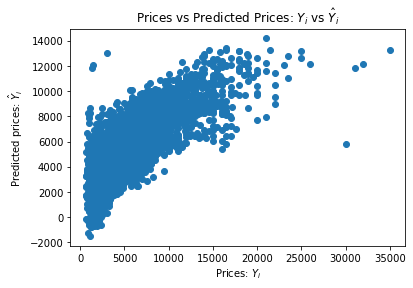

In [50]:
#get a pretty good R-square value , so we next use test data get error.
y_pred_ls = reg_ls.predict(X_test)
# plot prediction and actual data
plt.scatter(y_test, y_pred_ls)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred_ls))
print('mean_squared_error:',mean_squared_error(y_test, y_pred_ls))
print('r2_score',r2_score(y_test, y_pred_ls))

#### Ridge Regression

In [51]:
# Ridge 5-fold Cross-Validation
from sklearn.linear_model import  Ridge, Lasso, RidgeCV, LassoCV
ridge_mod = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
ridge_mod.fit(X_train, y_train)

print('Best Ridge alpha:', ridge_mod.alpha_)
print('Training score:', ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))



Best Ridge alpha: 2.782559402207126
Training score: 0.601356376439159
Test Score: 0.6111725951438762


In [215]:
# Ridge 10-fold Cross-Validation
from sklearn.linear_model import  Ridge, Lasso, RidgeCV, LassoCV
ridge_mod = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=10)
ridge_mod.fit(X_train, y_train)

print('Best Ridge alpha:', ridge_mod.alpha_)
print('Training score:', ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))



Best Ridge alpha: 2.782559402207126
Training score: 0.601356376439159
Test Score: 0.6111725951438762


> Both 5-fold and 10-fold Cross-Validation returned equal best alpha for Ridge Regression

In [61]:
# Collect the coefficients
df_ridge_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_ridge_coef['Coef_abs'] = df_ridge_coef.Coefficients.abs()
# Confirmed similar to the above Ridge CV scores
from sklearn.model_selection import KFold, cross_val_score
ridge_mod = Ridge(alpha=21.54)

scores = cross_val_score(ridge_mod, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(X_train, y_train)
print("Training Score:", ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Cross-validated training scores: [0.58166034 0.60886901 0.60240884 0.5992041  0.6081915 ]
Mean cross-validated training score: 0.600066759696477
Training Score: 0.6012791689108425
Test Score: 0.6110942062532209


In [212]:
# Collect the coefficients
df_ridge_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_ridge_coef['Coef_abs'] = df_ridge_coef.Coefficients.abs()
# Confirmed similar to the above Ridge CV scores
from sklearn.model_selection import KFold, cross_val_score
ridge_mod = Ridge(alpha=21.54)

scores = cross_val_score(ridge_mod, X_train, y_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(X_train, y_train)
print("Training Score:", ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Cross-validated training scores: [0.565 0.598 0.608 0.61  0.591 0.614 0.578 0.619 0.605 0.612]
Mean cross-validated training score: 0.6000204649684873
Training Score: 0.6012791689108419
Test Score: 0.6110942062532203


#### Ridge Regression using best alpha estimated by cross-validation

In [52]:
# Collect the coefficients
df_ridge_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_ridge_coef['Coef_abs'] = df_ridge_coef.Coefficients.abs()
# Confirmed similar to the above Ridge CV scores
from sklearn.model_selection import KFold, cross_val_score
ridge_mod = Ridge(alpha= ridge_mod.alpha_)

scores = cross_val_score(ridge_mod, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(X_train, y_train)
print("Training Score:", ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Cross-validated training scores: [0.58170407 0.60900534 0.6024937  0.59929097 0.60805283]
Mean cross-validated training score: 0.6001093835429251
Training Score: 0.601356376439159
Test Score: 0.6111725951438762


> There's a slight improvement, but not signifficant

In [74]:
from sklearn import metrics, linear_model
ridge_predictions = ridge_mod.predict(X_test)
ridge_predictions = ridge_mod.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, ridge_predictions))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test, ridge_predictions))

Mean Squared Error: 2864908.0537033956
Root Mean Squared Error: 1692.6039270022375
mean_absolute_error: 1131.4888701679872


Text(0.5, 1.0, 'Prices vs Predicted Prices (Ridge Regession): $Y_i$ vs $\\hat{Y}_i$')

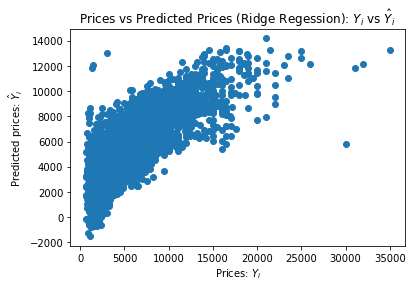

In [75]:
# plot prediction and actual data
plt.scatter(y_test, ridge_predictions)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices (Ridge Regession): $Y_i$ vs $\hat{Y}_i$')

R_squared: 0.6111725951438762
Square Root of MSE: 1692.6039270022375


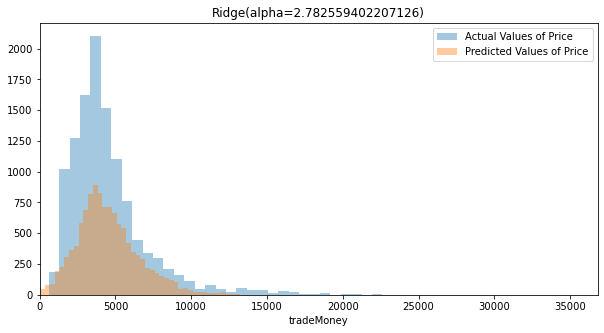

In [222]:
rr = Ridge(alpha=2.782559402207126)
Predictive_Model(rr)

R_squared: 0.6111725941167225
Square Root of MSE: 1692.6039292378878


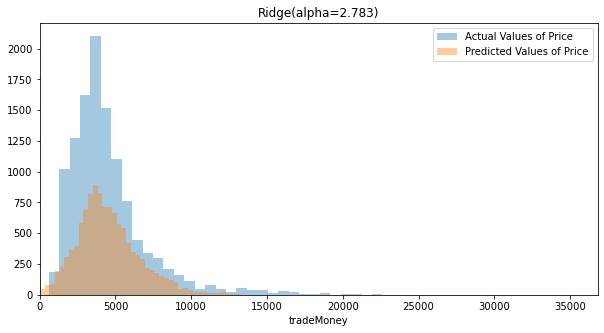

In [225]:
rr = Ridge(alpha=2.783)
Predictive_Model(rr)

#### Lasso Regression

In [76]:
# Lasso 5-fold Cross-Validation
lasso_mod = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
lasso_mod.fit(X_train, y_train)

print('Best Lasso alpha:', lasso_mod.alpha_)
print('Training score:', lasso_mod.score(X_train, y_train))
print("Test Score:", lasso_mod.score(X_test, y_test))

Best Lasso alpha: 0.3593813663804626
Training score: 0.6013323205826391
Test Score: 0.6111082174537825


In [216]:
# Lasso 10-fold Cross-Validation
lasso_mod = LassoCV(alphas=np.logspace(-4, 4, 10), cv=10)
lasso_mod.fit(X_train, y_train)

print('Best Lasso alpha:', lasso_mod.alpha_)
print('Training score:', lasso_mod.score(X_train, y_train))
print("Test Score:", lasso_mod.score(X_test, y_test))

Best Lasso alpha: 0.3593813663804626
Training score: 0.6013323205826391
Test Score: 0.6111082174537825


> Both 5-fold and 10-fold Cross Validation returned the same best alpha for Lasso Regression, which is 0.3593813663804626

In [77]:
lasso_predictions = lasso_mod.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, lasso_predictions))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test, lasso_predictions))

Mean Squared Error: 2865382.393116011
Root Mean Squared Error: 1692.744042410432
mean_absolute_error: 1131.216751947928


Text(0.5, 1.0, 'Prices vs Predicted Prices (Ridge Regession): $Y_i$ vs $\\hat{Y}_i$')

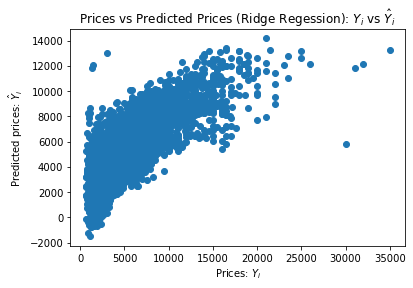

In [211]:
# plot prediction and actual data
plt.scatter(y_test, lasso_predictions)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices (Ridge Regession): $Y_i$ vs $\hat{Y}_i$')

R_squared: 0.6111082174537825
Square Root of MSE: 1692.744042410432


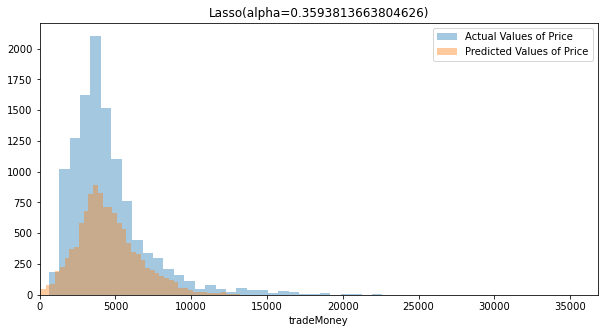

In [223]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3593813663804626)
Predictive_Model(lasso)

R_squared: 0.6111082487608078
Square Root of MSE: 1692.7439742747913


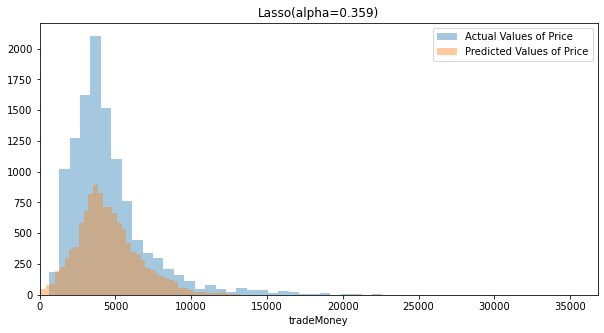

In [224]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.359)
Predictive_Model(lasso)

#### comparing coefficients predicted by Linear, Ridge, and Lasso Regression

In [78]:
# Collect the coefficients
df_lasso_coef = pd.DataFrame(lasso_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_lasso_coef['Coef_abs'] = df_lasso_coef.Coefficients.abs()

In [79]:
#Comparing the coefficients from the three regression models
coef_0609 = pd.concat([df_ols_coef['Coefficients'], df_ridge_coef['Coefficients'], df_lasso_coef['Coefficients']])
coef_0609 = pd.DataFrame(coef_0609)
coef_0609.reset_index(level=0, inplace=True)
coef_0609.columns = ['variable', 'coefficient']

In [82]:
coef_0609.loc[0:40, "model"] = "regls"
coef_0609.loc[41:81, "model"] = "ridge"
coef_0609.loc[82:122, "model"] = "lasso"

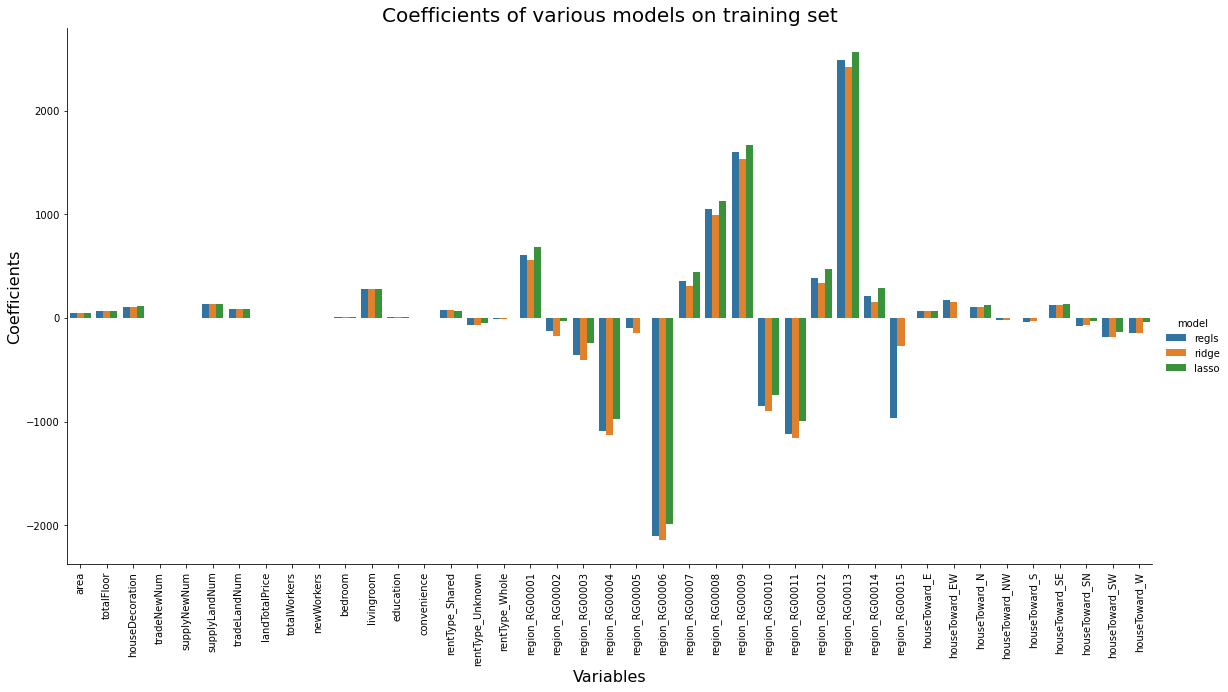

In [81]:
w = sns.catplot(x='variable', y='coefficient', hue='model', data=coef_0609, kind='bar', height=8, aspect=2)
# set rotation
w.set_xticklabels(rotation=90)

plt.title('Coefficients of various models on training set', fontsize=20)
plt.xlabel("Variables", size=16)
plt.ylabel("Coefficients", size=16)
plt.show()

#### KNN Regression

In [121]:
#model K Neighbors regression
from sklearn.neighbors import KNeighborsRegressor
k = 5
knr = KNeighborsRegressor(k)
knr.fit(X_train, y_train)
knr_predictions = knr.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knr_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, knr_predictions))**0.5)
print('R-Squared:', (metrics.r2_score(y_test, knr_predictions))**0.5)

Mean Squared Error: 1548715.5133350557
Root Mean Squared Error: 1244.4739906221646
R-Squared: 0.8887109789256291


The optimal number of neighbors is 6
The minimal RMSE is 1242.55


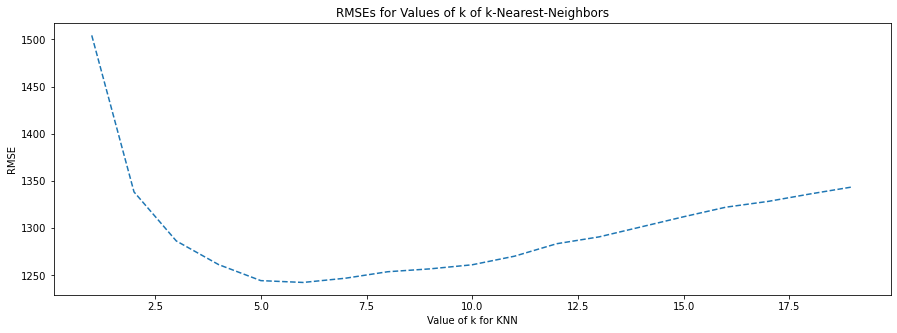

In [84]:
#use k = 5 the model perform better than regressiono model , now we will find a best K.
lrange=list(range(1,20))
RMSEs=[]
for i in lrange:
    k = i 
    knr = KNeighborsRegressor(k)
    knr.fit(X_train, y_train)
    knr_predictions = knr.predict(X_test)
    RMSE = (metrics.mean_squared_error(y_test, knr_predictions))**0.5
    RMSEs.append(RMSE)

optimal_k = lrange[RMSEs.index(min(RMSEs))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The minimal RMSE is %.2f" % min(RMSEs))
plt.figure(2,figsize=(15,5))
 
# plot the results
plt.plot(lrange, RMSEs,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('RMSE')
plt.title('RMSEs for Values of k of k-Nearest-Neighbors')
plt.show()

In [91]:
#using GridSearch to get best k for comparison
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knr = neighbors.KNeighborsRegressor()

model = GridSearchCV(knr, params, cv=5)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 5}

**using k=6**

In [171]:
#model K Neighbors regression using default distance metric (Euclidean)
from sklearn.neighbors import KNeighborsRegressor
k = 6
knr = KNeighborsRegressor(k)
knr.fit(X_train, y_train)
knr_predictions = knr.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knr_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, knr_predictions))**0.5)
print('R-Squared:', (metrics.r2_score(y_test, knr_predictions))**0.5)

Mean Squared Error: 1543926.4769463341
Root Mean Squared Error: 1242.5483801230173
R-Squared: 0.8890765858827689


In [177]:
#model K Neighbors regression using Manhattan distance
from sklearn.neighbors import KNeighborsRegressor
k = 6
knr = KNeighborsRegressor(k, p=1, metric='minkowski')
knr.fit(X_train, y_train)
knr_predictions = knr.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knr_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, knr_predictions))**0.5)
print('R-Squared:', (metrics.r2_score(y_test, knr_predictions))**0.5)

Mean Squared Error: 1525895.3948281137
Root Mean Squared Error: 1235.271385092407
R-Squared: 0.8904517769902296


R_squared: 0.7929043671450576
Square Root of MSE: 1235.271385092407


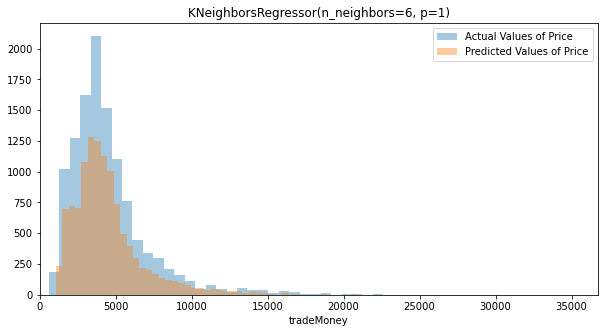

In [226]:
#using Manhattan distance and k=6
knn = KNeighborsRegressor(n_neighbors=6, p=1, metric='minkowski')
Predictive_Model(knn)

R_squared: 0.7904571755649605
Square Root of MSE: 1242.5483801230173


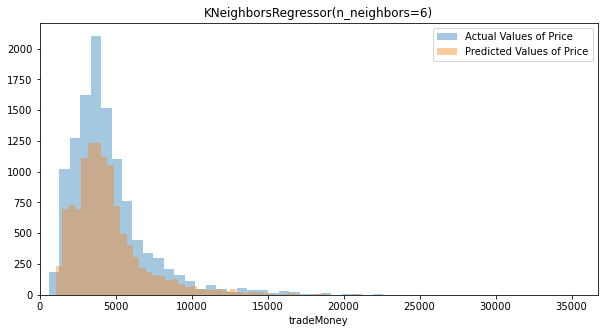

In [227]:
#using Euclidean distance and k=6
knn = KNeighborsRegressor(n_neighbors=6, p=2, metric='minkowski')
Predictive_Model(knn)

**Using k=5**

R_squared: 0.792635546597705
Square Root of MSE: 1236.072847285202


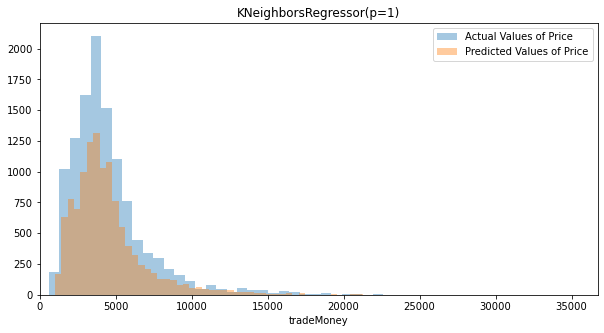

In [228]:
#using Manhattan distance and k=5
knn = KNeighborsRegressor(n_neighbors=5, p=1, metric='minkowski')
Predictive_Model(knn)

In [229]:
#Create a model using Euclidean distance
knr = KNeighborsRegressor(n_neighbors = 5, p = 2, metric='minkowski')

#Train the model
knr.fit(X_train, y_train)
#Let's predict the classes for test data
pred_test = knr.predict(X_test)
print(knr.score(X_test, y_test))

0.7898072040629499


### Decision Tree Regression 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

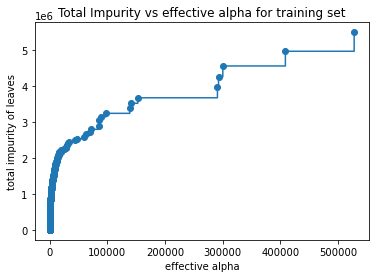

In [126]:
# model decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [135]:
dtm = DecisionTreeRegressor(max_depth=8,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train, y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.5490143694794825
R-Squared on test dataset=0.5454422251711478


In [144]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


#use RandomizedSearch for Hyperparameter tuning
rand_cv_dtm = RandomizedSearchCV(dtm, param_grid, cv=5)

rand_cv_dtm.fit(X_train, y_train)
print("R-Squared::{}".format(rand_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(rand_cv_dtm.best_params_))

R-Squared::0.6967376735508082
Best Hyperparameters::
{'min_samples_split': 40, 'min_samples_leaf': 100, 'max_leaf_nodes': 100, 'max_depth': 8, 'criterion': 'mse'}


##### comparison of distributions using different max_depth

R_squared: 0.7747587668490757
Square Root of MSE: 1288.2520995981065


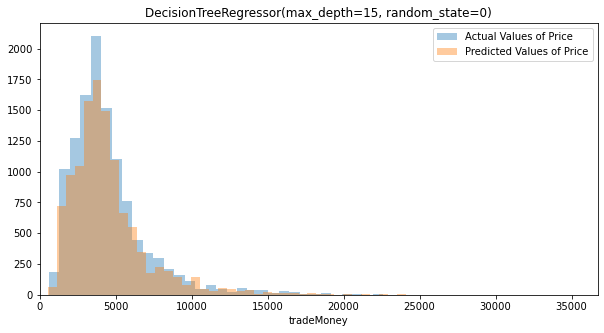

In [230]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, random_state=0)
Predictive_Model(dt)

R_squared: 0.781252254213576
Square Root of MSE: 1269.5467671741899


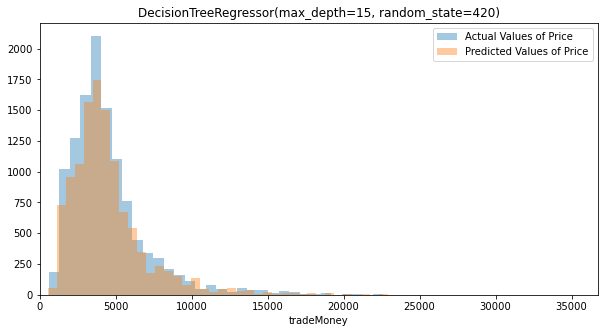

In [231]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, random_state=420)
Predictive_Model(dt)

R_squared: 0.7574013708923202
Square Root of MSE: 1336.9682133904269


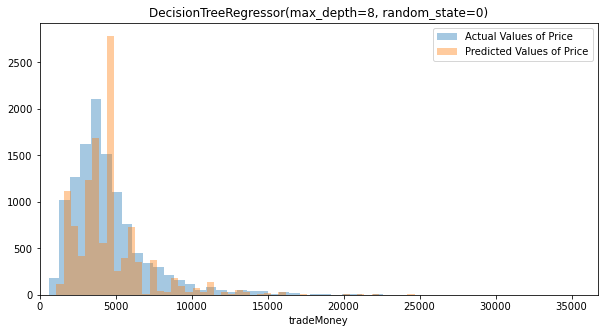

In [232]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8, random_state=0)
Predictive_Model(dt)

R_squared: 0.7575104232635452
Square Root of MSE: 1336.667684193267


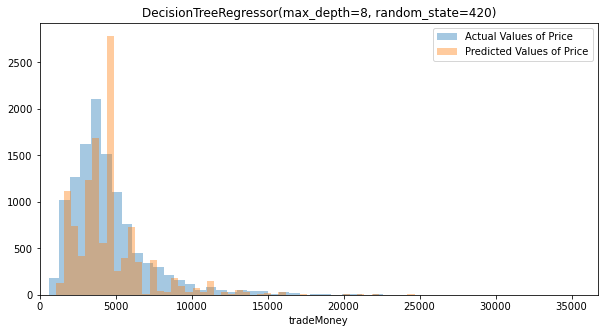

In [233]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8, random_state=420)
Predictive_Model(dt)

R_squared: 0.7353998185286408
Square Root of MSE: 1396.2782712567493


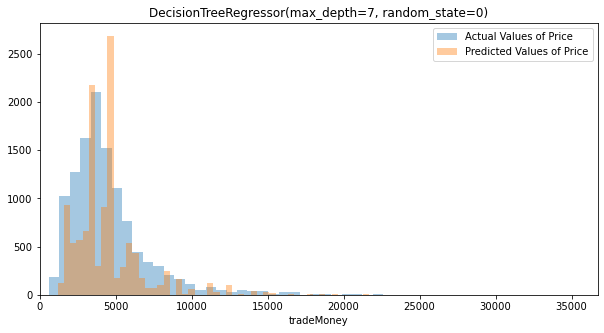

In [234]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=7, random_state=0)
Predictive_Model(dt)

> In the decision tree model, the max depth is one of the factors to prevent the over-fitting issue of the model. As the depth of the tree is greater, the tree has more branches and becomes bigger. As the tree has more branches, the prediction for the training set can be more accurate. However, there is a bigger variance in predicting the testing set. Therefore, setting the max depth optimally is important in order to avoid the over-fitting issue. In the example above, max depth is set to 15. The R² of this model is 0.774, and the RMSE is 1288.252.

### Summarizing model performance after parameter tuning using cross validation

In [204]:
from sklearn.model_selection import cross_validate

lr_scores = cross_validate(LinearRegression(), X_train, y_train, cv=10, scoring='r2')
rr_scores = cross_validate(Ridge(alpha=2.782559402207126), X_train, y_train, cv=10, scoring='r2')
ls_scores = cross_validate(Lasso(alpha=0.3593813663804626), X_train, y_train, cv=10, scoring='r2')
knn_scores = cross_validate(KNeighborsRegressor(n_neighbors=6), X_train, y_train, cv=10, scoring='r2')
dt_scores = cross_validate(DecisionTreeRegressor(max_depth=8, random_state=0), X_train, y_train, cv=10, scoring='r2')

lr_test_score = lr_scores.get('test_score')
rr_test_score = rr_scores.get('test_score')
ls_test_score = ls_scores.get('test_score')
knn_test_score = knn_scores.get('test_score')
dt_test_score = dt_scores.get('test_score')

box= pd.DataFrame({'Linear Regression':lr_test_score, 'Ridge Regression':rr_test_score, 'Lasso Regression':ls_test_score, 'K-Nearest Neighbors':knn_test_score, 'Decision Tree':dt_test_score})
box.index = box.index + 1
box.loc['Mean'] = box.mean()
box

Linear Regression  Ridge Regression  Lasso Regression  \
1              0.565245          0.565290          0.565509   
2              0.598518          0.598507          0.598523   
3              0.607731          0.607774          0.607713   
4              0.609926          0.609882          0.609765   
5              0.591969          0.591881          0.591686   
6              0.613282          0.613393          0.613624   
7              0.577756          0.577782          0.577875   
8              0.619153          0.619146          0.619214   
9              0.605282          0.605297          0.605358   
10             0.611375          0.611453          0.611729   
Mean           0.600024          0.600040          0.600100   

      K-Nearest Neighbors  Decision Tree  
1                0.744362       0.709408  
2                0.792564       0.740380  
3                0.781320       0.736023  
4                0.799765       0.734158  
5                0.729976       0.730206  
6                0.796835       0.729872  
7                0.787889       0.727247  
8                0.789736       0.743526  
9                0.786489       0.748623  
10               0.764147       0.722655  
Mean             0.777308       0.732210

Text(0.5, 0, 'K-th Fold')

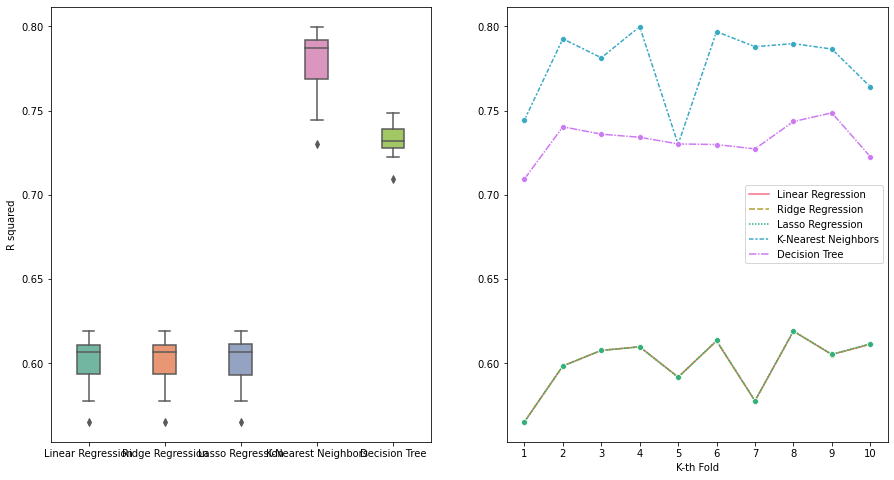

In [209]:
f,ax=plt.subplots(1,2, figsize=(15,8))
sns.boxplot(data=box.drop(box.tail(1).index), width=0.3, palette="Set2", ax=ax[0])
ax[0].set_ylabel('R squared')
sns.lineplot(data=box.drop(box.tail(1).index), palette="husl", ax=ax[1],  marker='o')
ax[1].set_xticks(np.arange(1,11,1))
ax[1].set_xlabel('K-th Fold')

#### using max_depth=15 and random_state=420 for decision tree

In [235]:
from sklearn.model_selection import cross_validate

lr_scores = cross_validate(LinearRegression(), X_train, y_train, cv=10, scoring='r2')
rr_scores = cross_validate(Ridge(alpha=2.782559402207126), X_train, y_train, cv=10, scoring='r2')
ls_scores = cross_validate(Lasso(alpha=0.3593813663804626), X_train, y_train, cv=10, scoring='r2')
knn_scores = cross_validate(KNeighborsRegressor(n_neighbors=6), X_train, y_train, cv=10, scoring='r2')
dt_scores = cross_validate(DecisionTreeRegressor(max_depth=15, random_state=420), X_train, y_train, cv=10, scoring='r2')

lr_test_score = lr_scores.get('test_score')
rr_test_score = rr_scores.get('test_score')
ls_test_score = ls_scores.get('test_score')
knn_test_score = knn_scores.get('test_score')
dt_test_score = dt_scores.get('test_score')

box= pd.DataFrame({'Linear Regression':lr_test_score, 'Ridge Regression':rr_test_score, 'Lasso Regression':ls_test_score, 'K-Nearest Neighbors':knn_test_score, 'Decision Tree':dt_test_score})
box.index = box.index + 1
box.loc['Mean'] = box.mean()
box

Linear Regression  Ridge Regression  Lasso Regression  \
1              0.565245          0.565290          0.565509   
2              0.598518          0.598507          0.598523   
3              0.607731          0.607774          0.607713   
4              0.609926          0.609882          0.609765   
5              0.591969          0.591881          0.591686   
6              0.613282          0.613393          0.613624   
7              0.577756          0.577782          0.577875   
8              0.619153          0.619146          0.619214   
9              0.605282          0.605297          0.605358   
10             0.611375          0.611453          0.611729   
Mean           0.600024          0.600040          0.600100   

      K-Nearest Neighbors  Decision Tree  
1                0.744362       0.757113  
2                0.792564       0.776568  
3                0.781320       0.715953  
4                0.799765       0.745240  
5                0.729976       0.760115  
6                0.796835       0.766572  
7                0.787889       0.728825  
8                0.789736       0.751306  
9                0.786489       0.730540  
10               0.764147       0.705654  
Mean             0.777308       0.743789

In [250]:
box.to_csv('best model performance.csv')

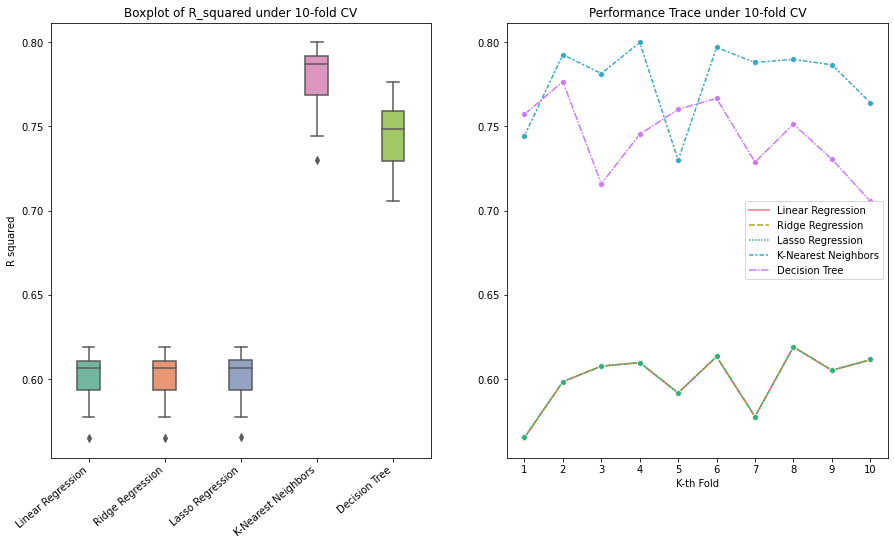

In [249]:
f,ax=plt.subplots(1,2, figsize=(15,8))
sns.boxplot(data=box.drop(box.tail(1).index), width=0.3, palette="Set2", ax=ax[0])
ax[0].set_ylabel('R squared')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].title.set_text('Boxplot of R_squared under 10-fold CV')
sns.lineplot(data=box.drop(box.tail(1).index), palette="husl", ax=ax[1],  marker='o')
ax[1].set_xticks(np.arange(1,11,1))
ax[1].set_xlabel('K-th Fold')
ax[1].title.set_text('Performance Trace under 10-fold CV')